# Model from Holly 1989

Diffusion of calcsium and chimical interactions in a separed space of 3 part, RC,SR, myofibrialar space.

We start with th myofbrilar space, and in the first time doesn't  care of the interaction with the membrane proteins.


$$
\frac{ \partial [Ca]}{\partial t}= K_{Toff}[TCa]-K_{Ton}[Ca][T]+K_{Poff}[PCa]-K_{Pon}[Ca][P]+ D(\bigtriangledown ^{2}Ca) 
$$
We have to creat a matrice for each species Ca,T,TCA,P,PCA
With the discretisation we have:
$$
\frac {[Ca]_{i,j}^{l+1} - [Ca]_{i,j}^{l}}{\delta t}= K_{Toff}[TCa]_{i,j}^{l}-K_{Ton}[Ca]_{i,j}^{l}[TCa]_{i,j}^{l}+K_{Poff}[PCa]_{i,j}^{l}-K_{Pon}[Ca]_{i,j}^{l}[PCa]_{i,j}^{l}+ D(\frac {([Ca]_{i-1,j}^{l}-2[Ca]_{i,j}^{l}+[Ca]_{i+1,j}^{l})}{(\delta x)^{2}}+ \frac {([Ca]_{i,j-1}^{l}-2[Ca]_{i,j}^{l}+[Ca]_{i,j+1}^{l})}{(\delta y)^{2}}) \\
\
L_{T}=140 \mu mol l^{-1}=[T]+[TCa] => start [T]=[TCa]=70\\
L_{P}=940 \mu mol l^{-1}=[P]+[PCa] => start [P]=[PCa]= 470 \
$$

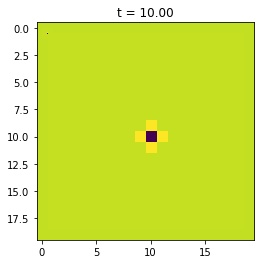

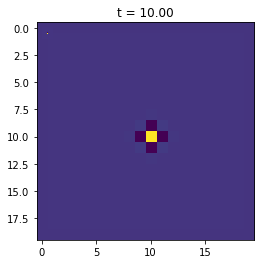

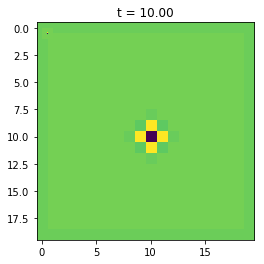

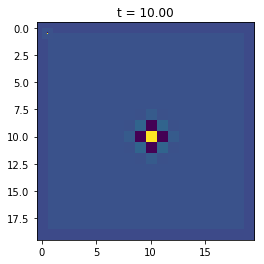

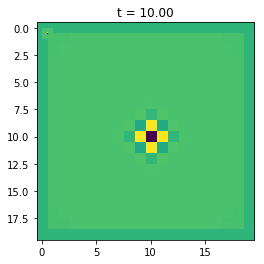

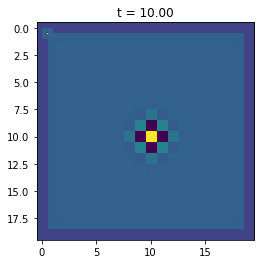

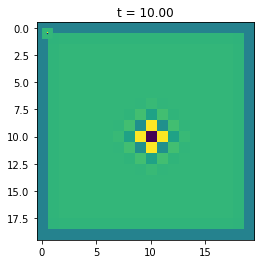

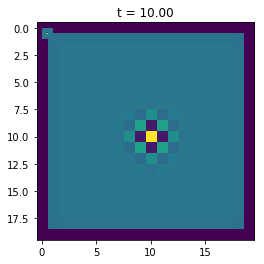

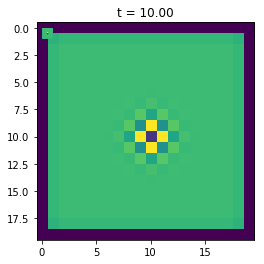

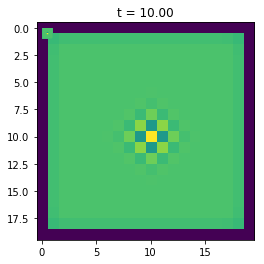

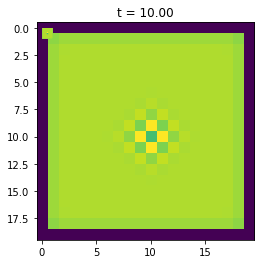

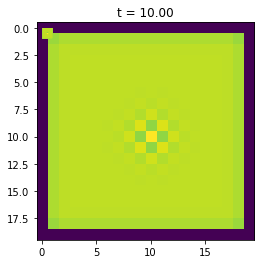

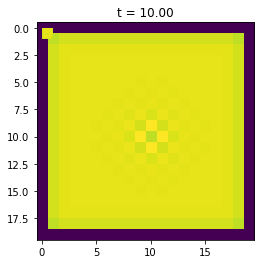

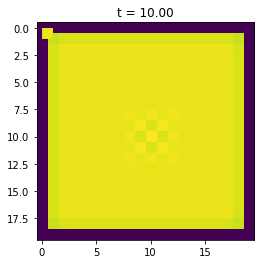

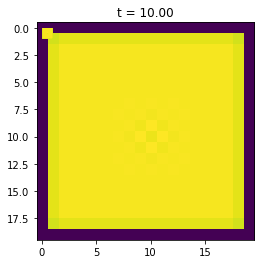

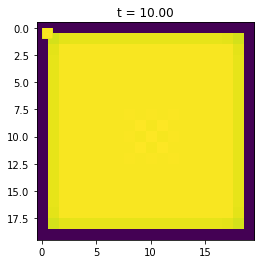

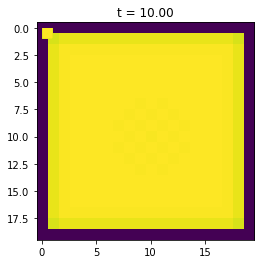

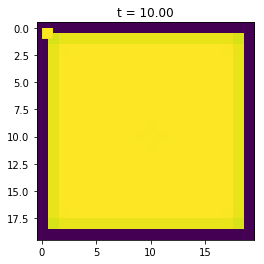

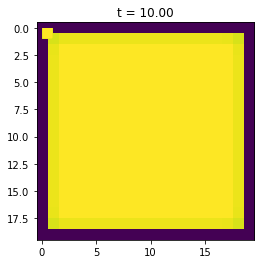

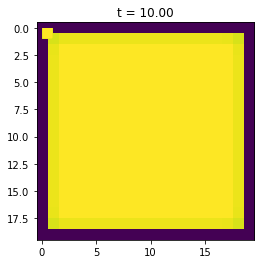

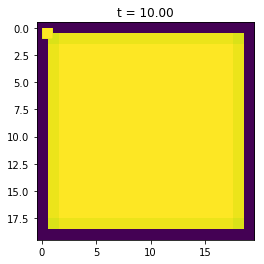

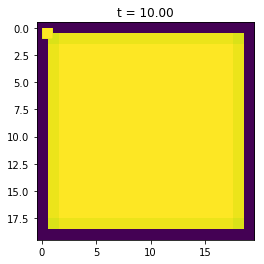

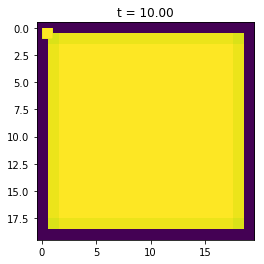

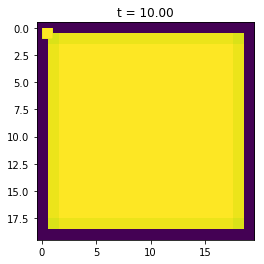

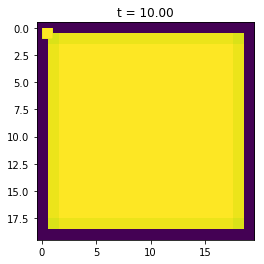

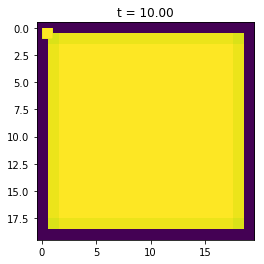

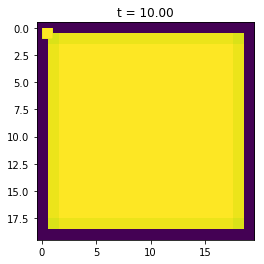

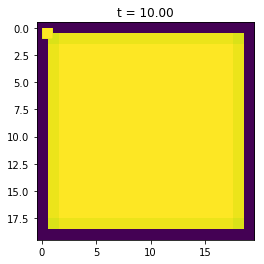

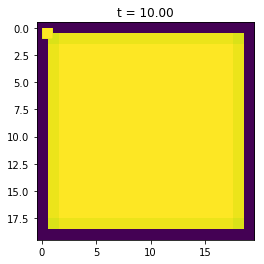

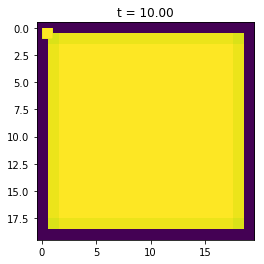

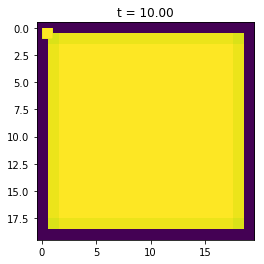

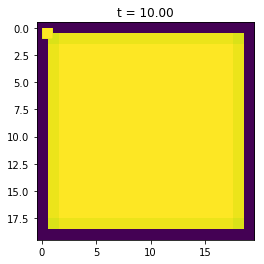

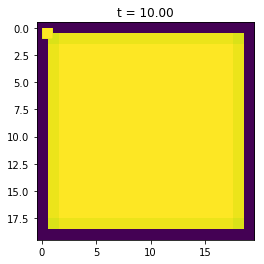

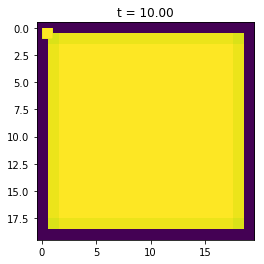

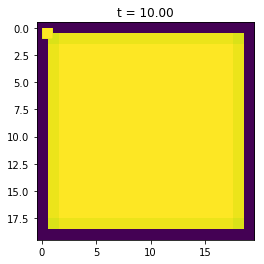

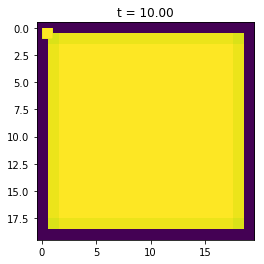

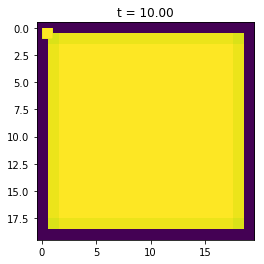

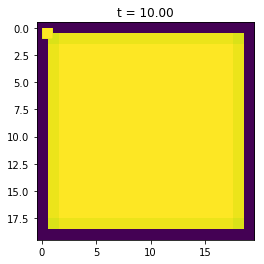

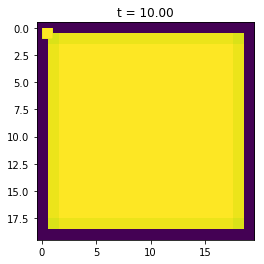

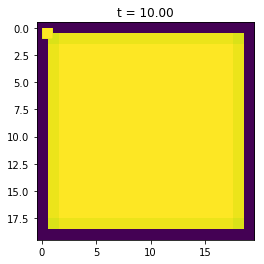

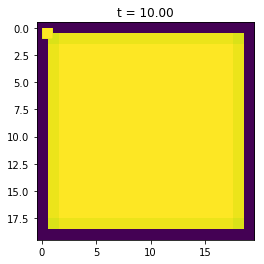

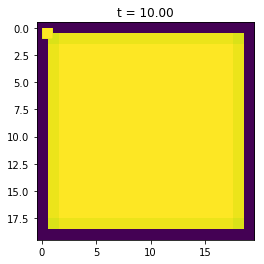

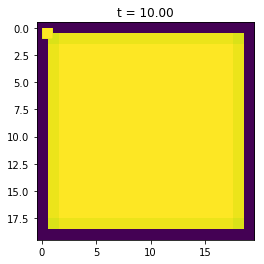

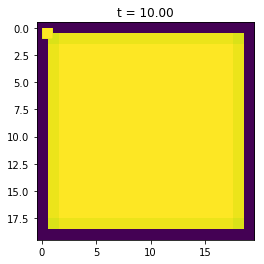

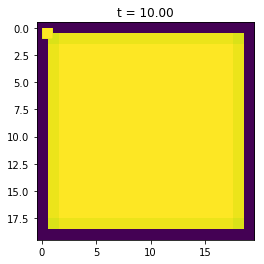

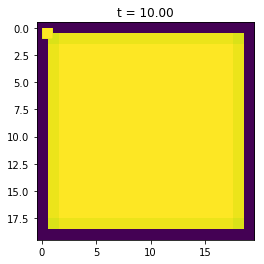

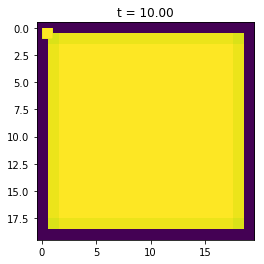

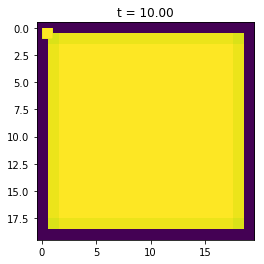

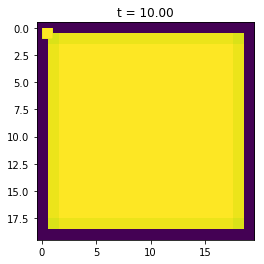

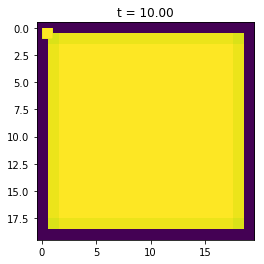

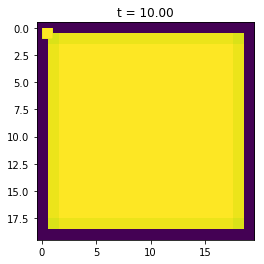

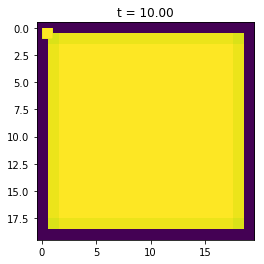

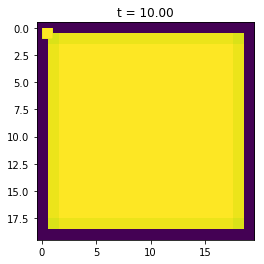

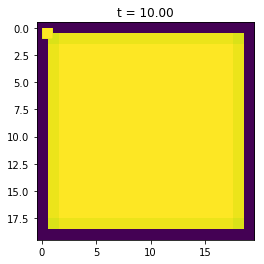

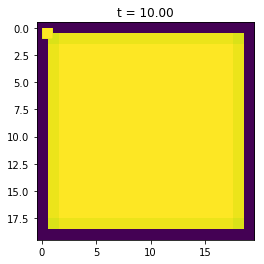

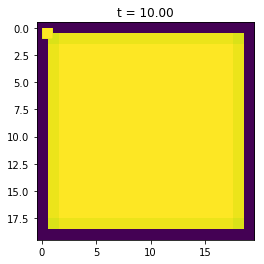

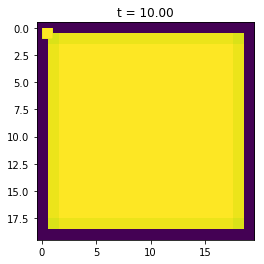

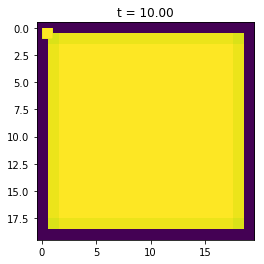

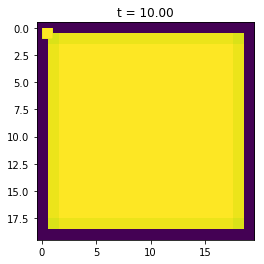

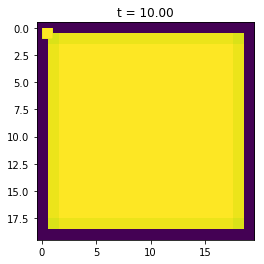

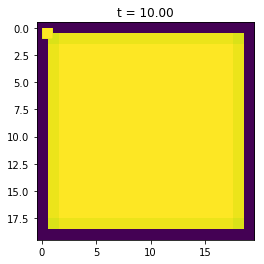

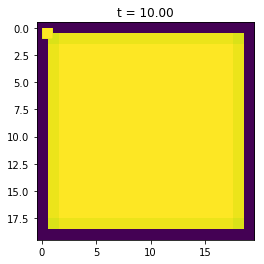

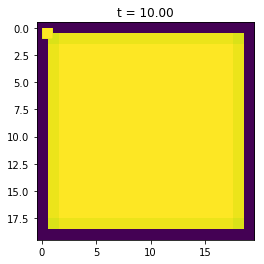

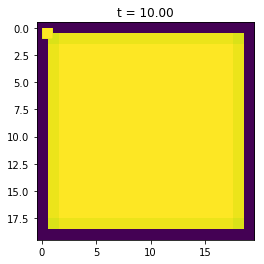

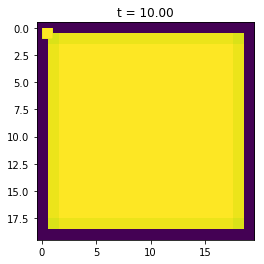

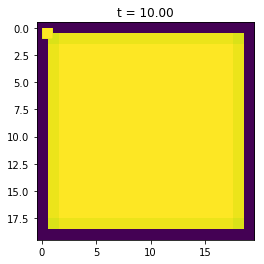

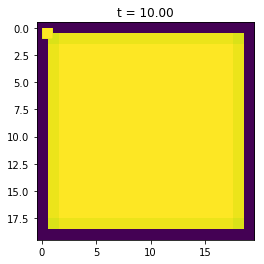

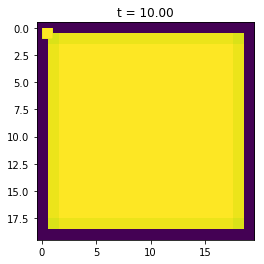

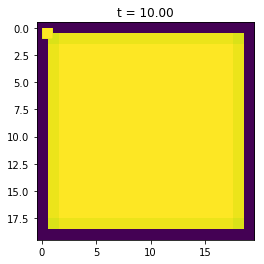

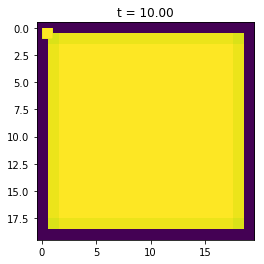

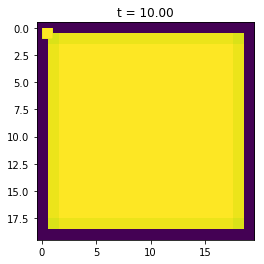

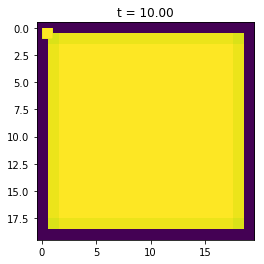

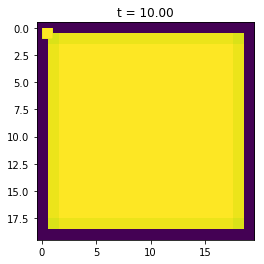

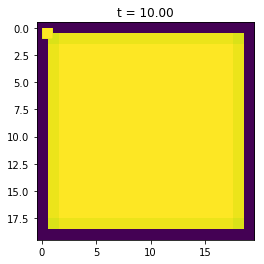

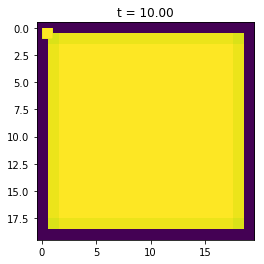

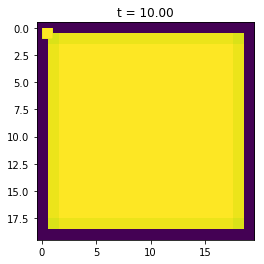

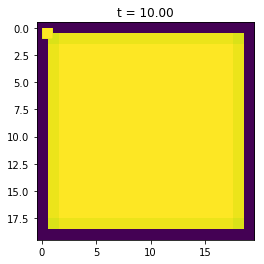

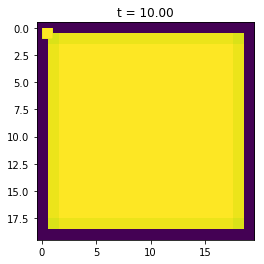

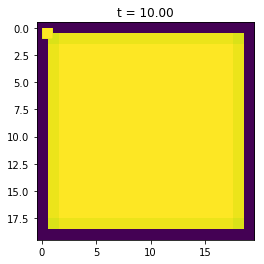

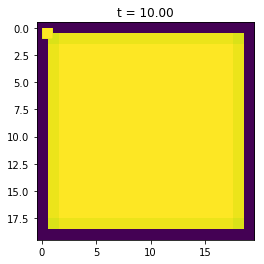

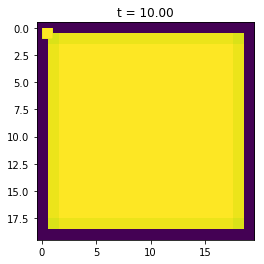

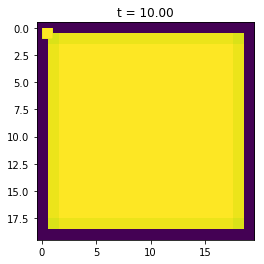

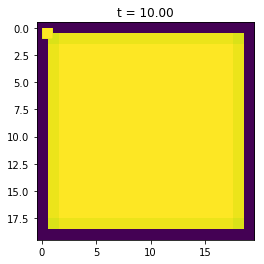

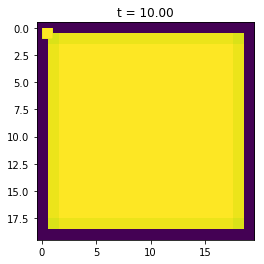

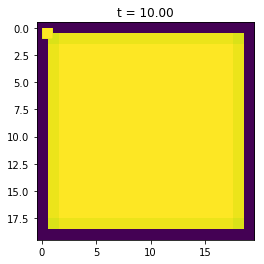

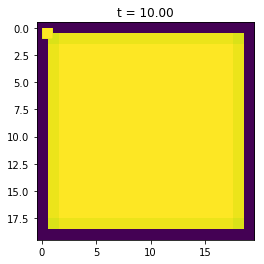

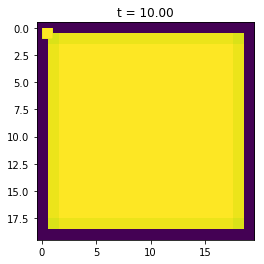

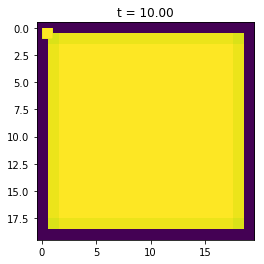

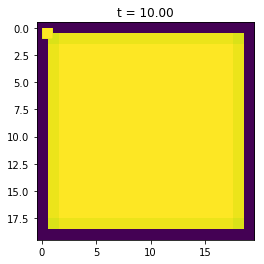

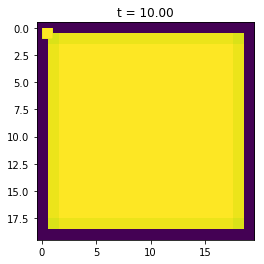

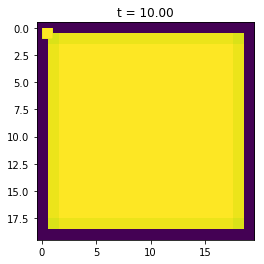

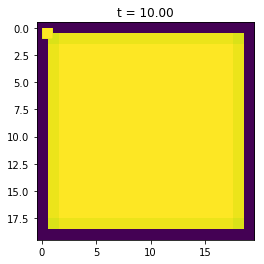

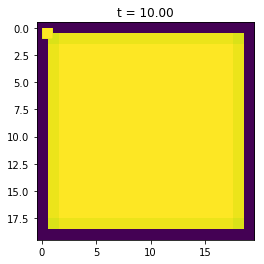

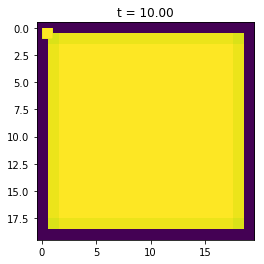

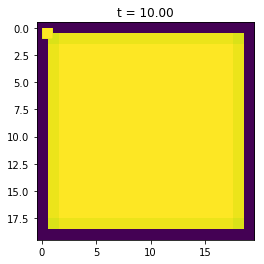

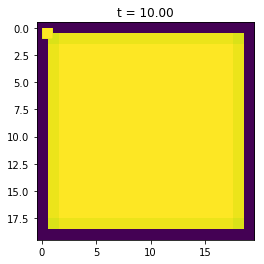

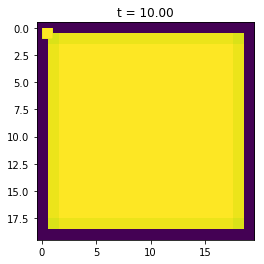

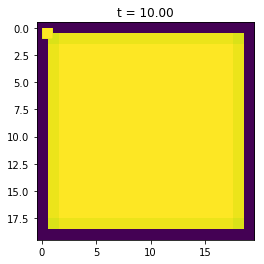

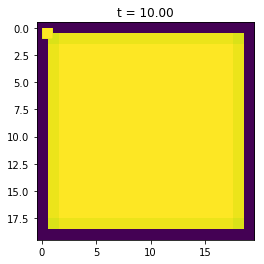

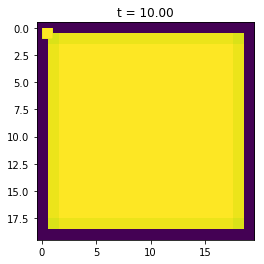

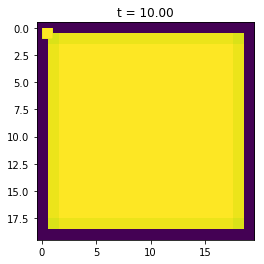

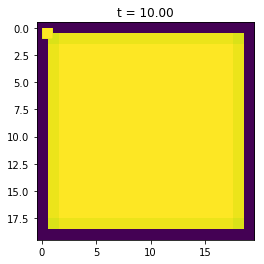

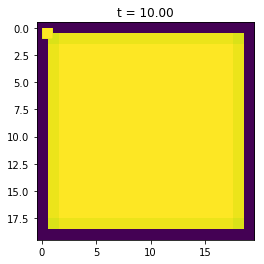

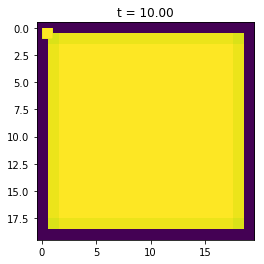

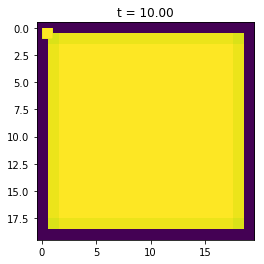

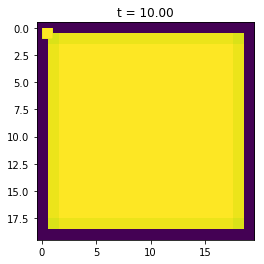

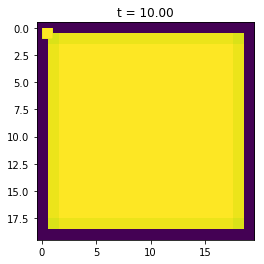

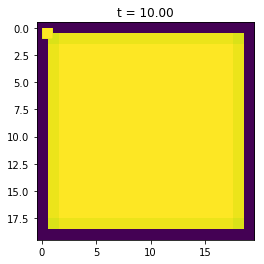

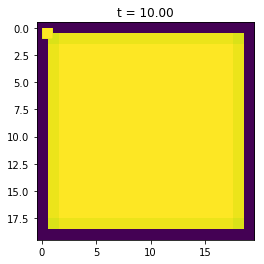

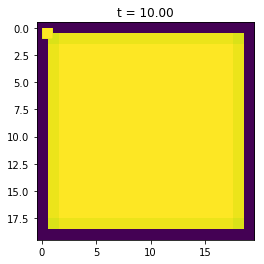

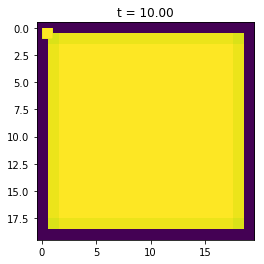

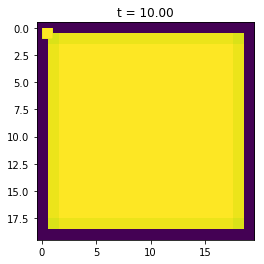

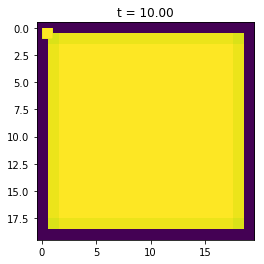

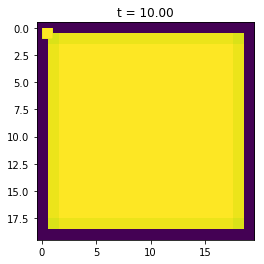

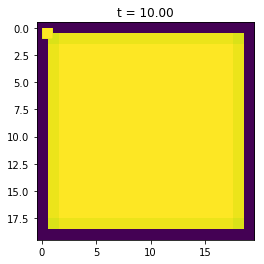

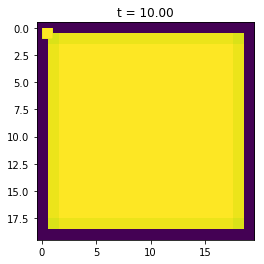

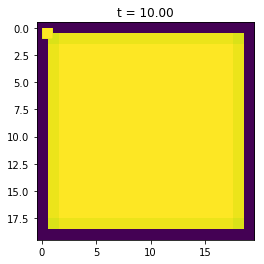

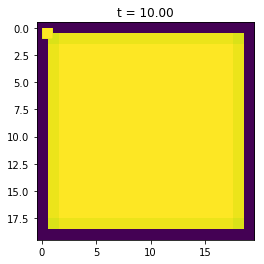

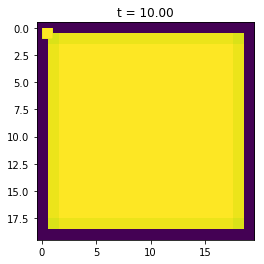

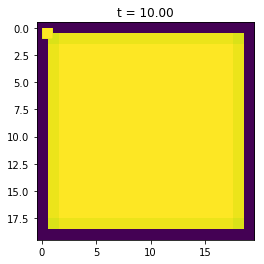

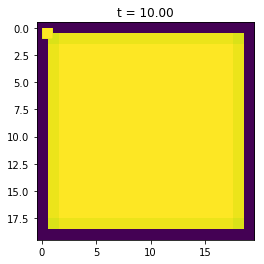

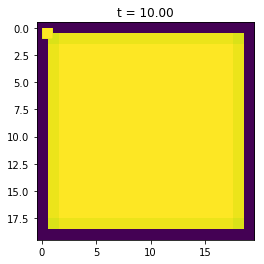

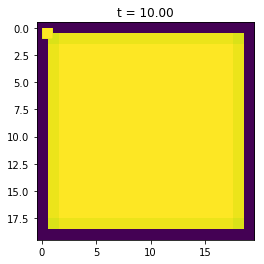

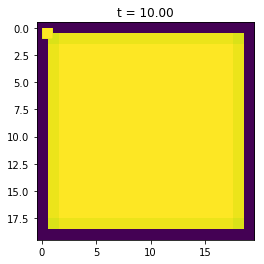

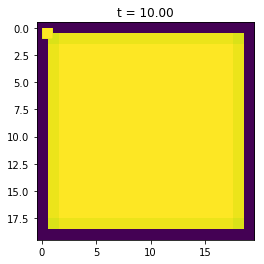

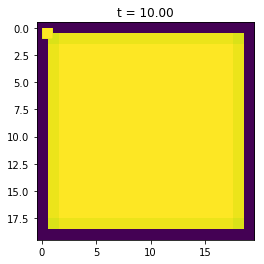

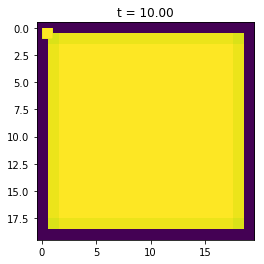

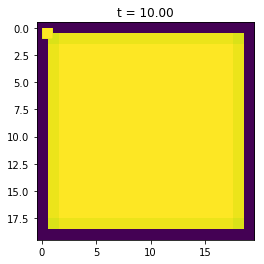

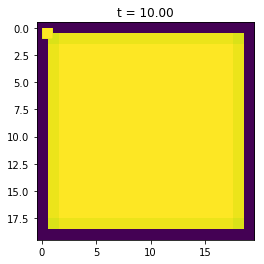

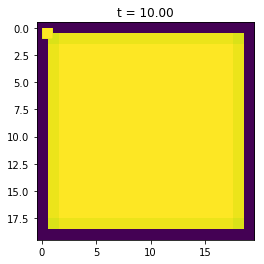

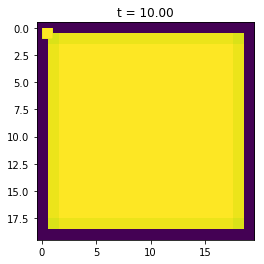

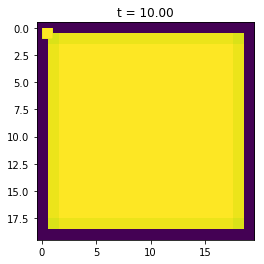

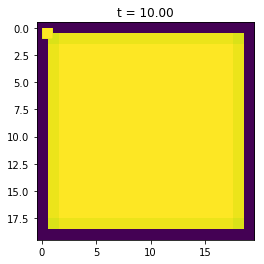

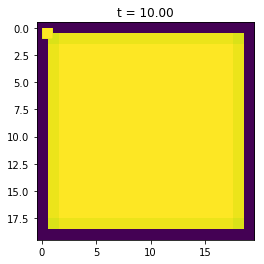

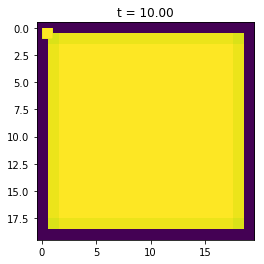

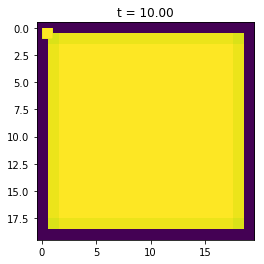

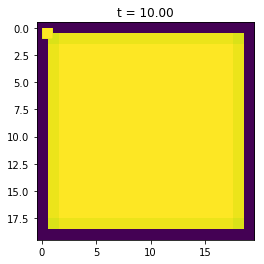

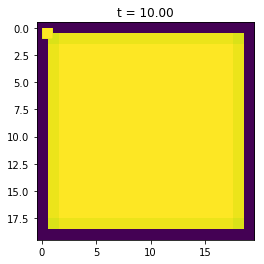

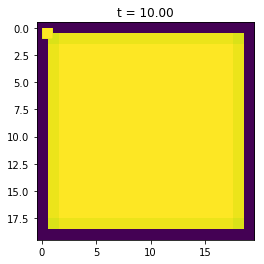

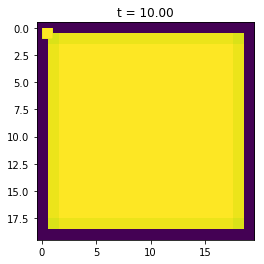

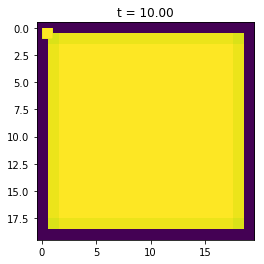

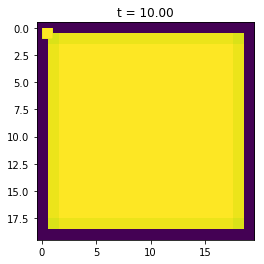

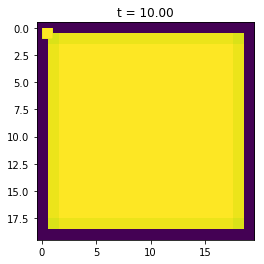

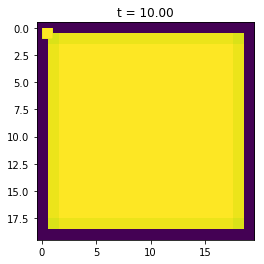

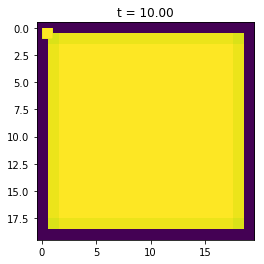

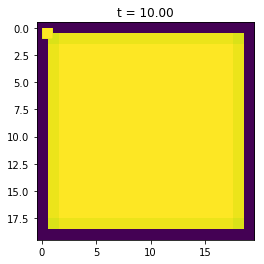

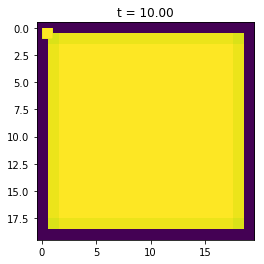

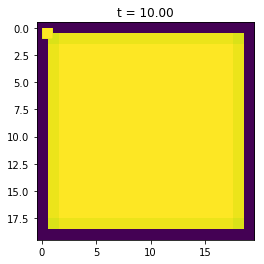

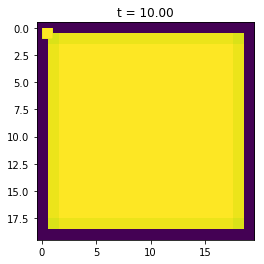

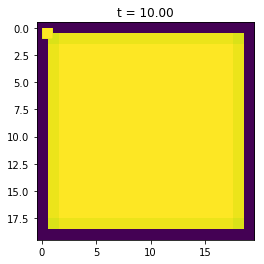

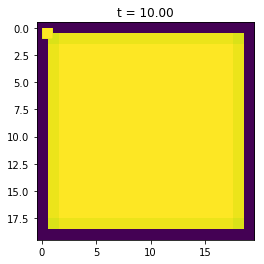

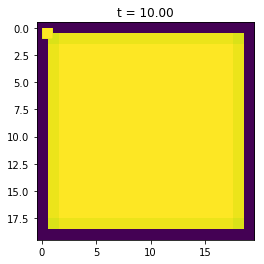

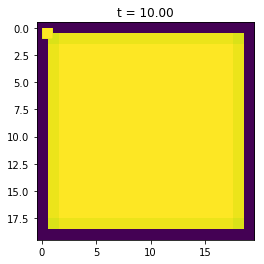

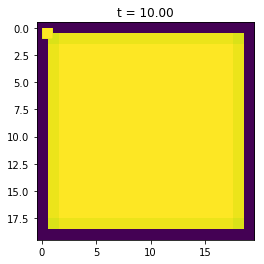

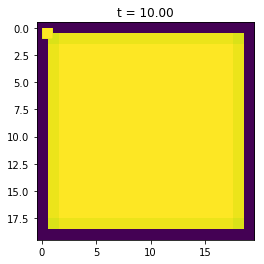

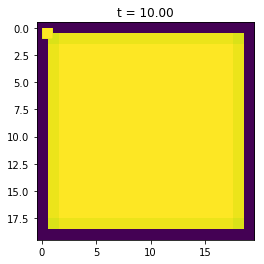

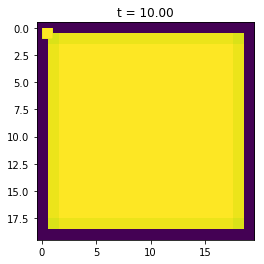

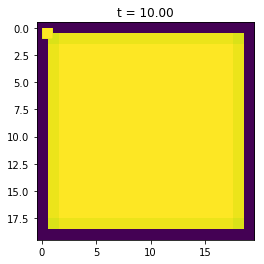

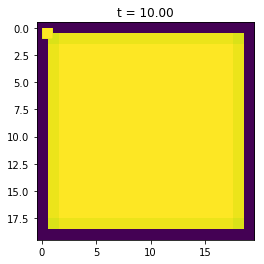

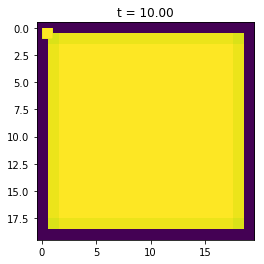

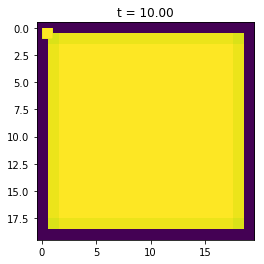

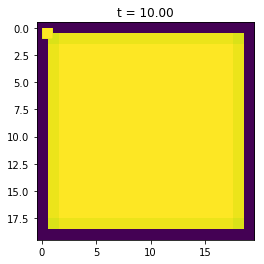

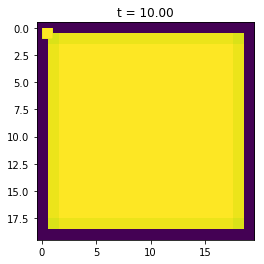

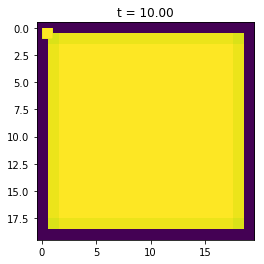

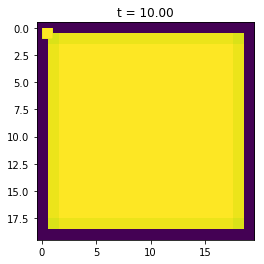

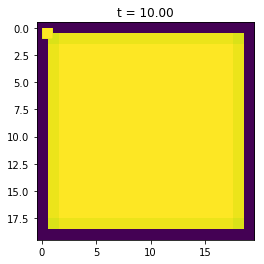

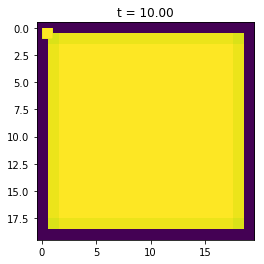

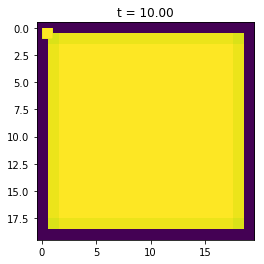

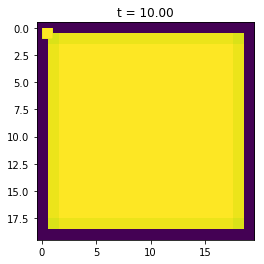

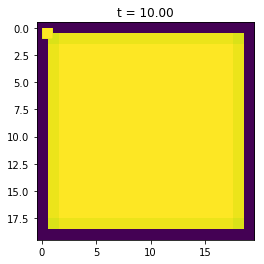

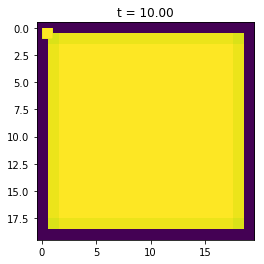

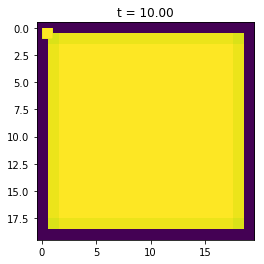

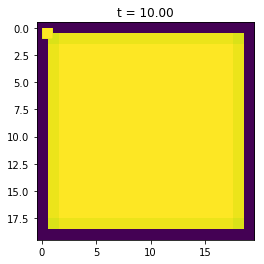

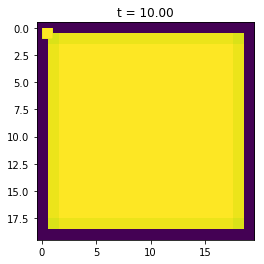

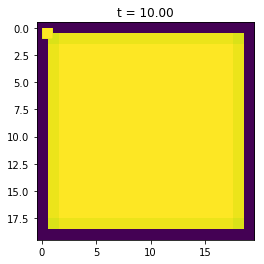

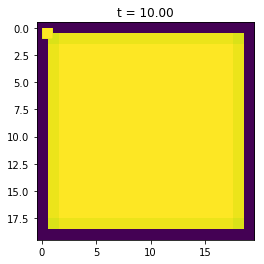

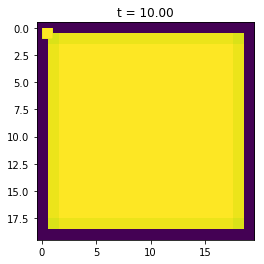

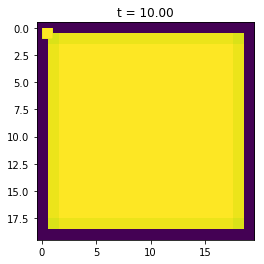

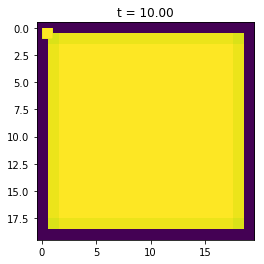

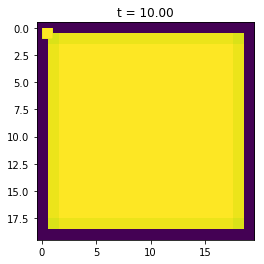

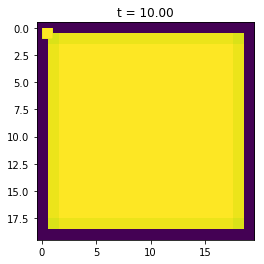

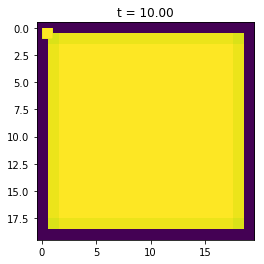

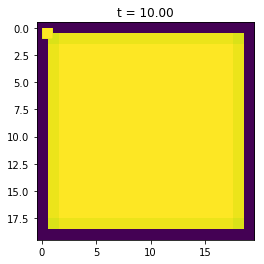

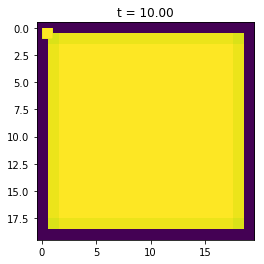

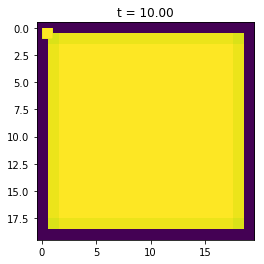

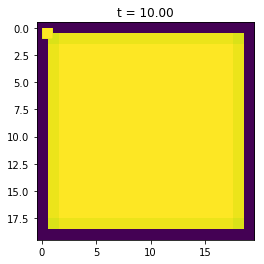

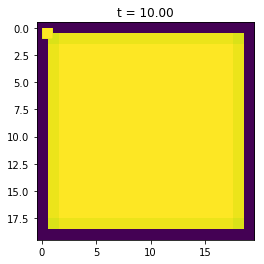

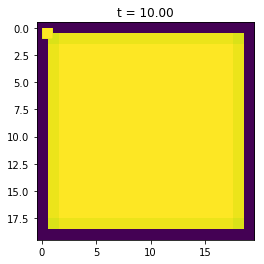

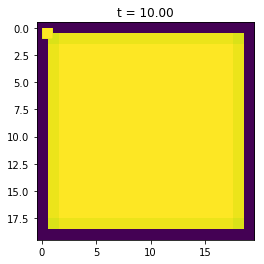

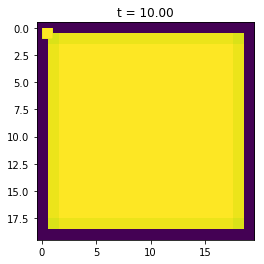

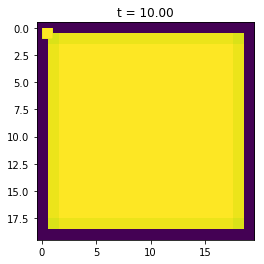

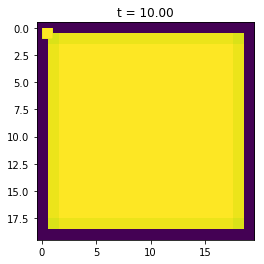

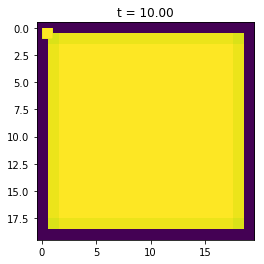

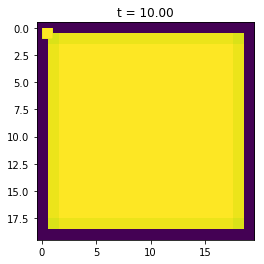

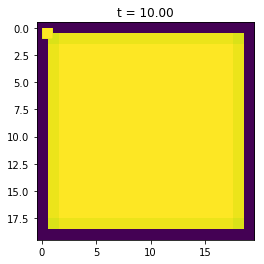

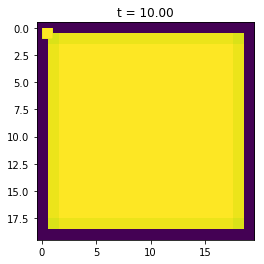

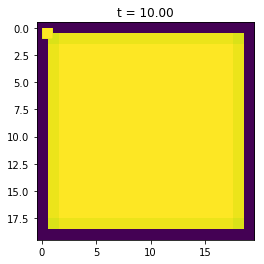

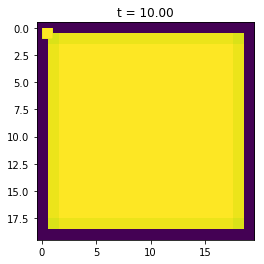

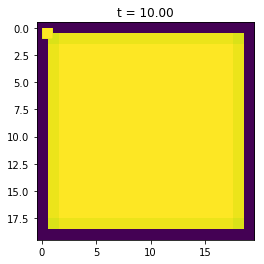

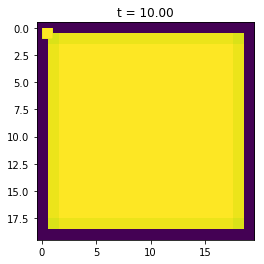

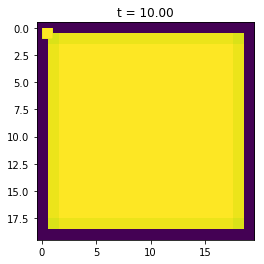

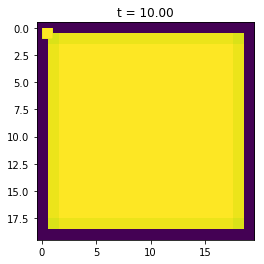

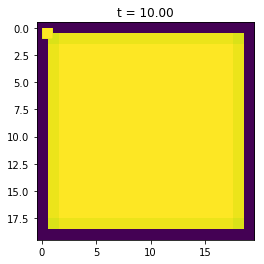

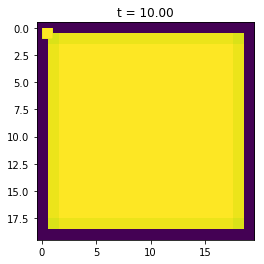

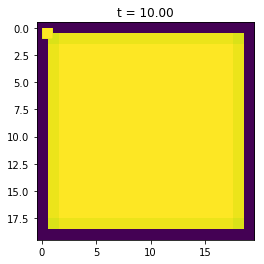

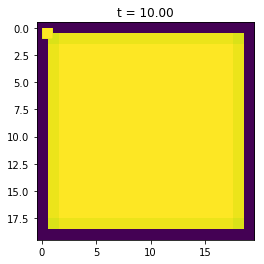

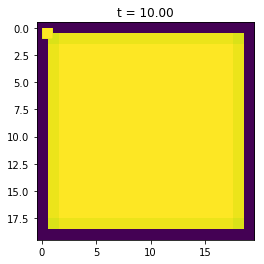

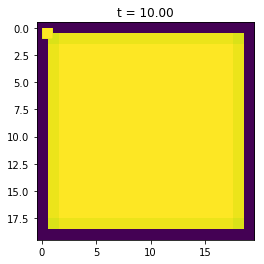

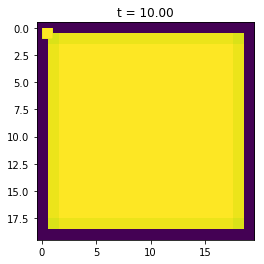

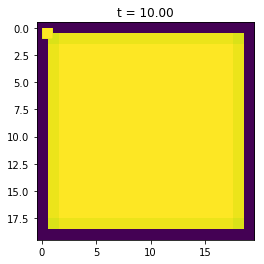

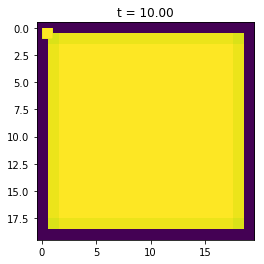

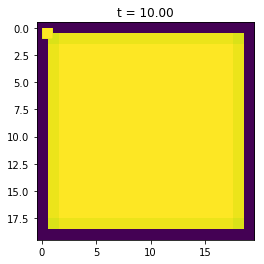

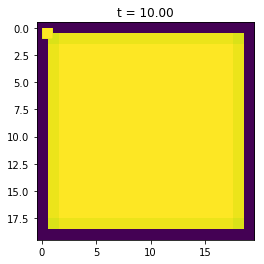

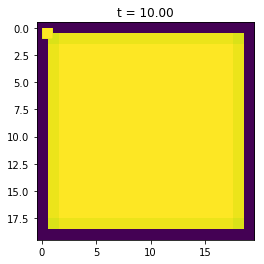

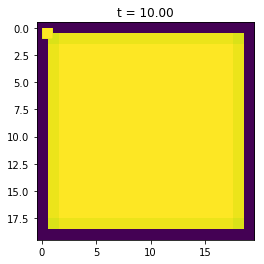

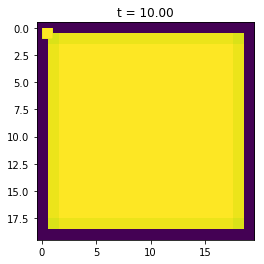

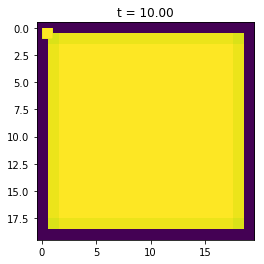

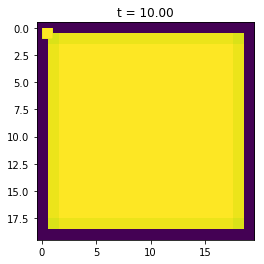

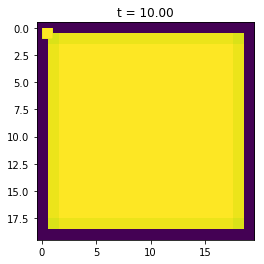

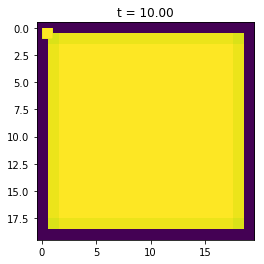

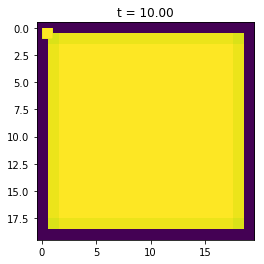

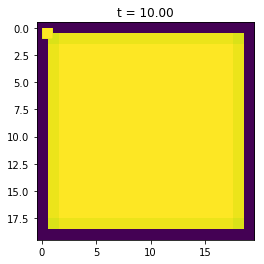

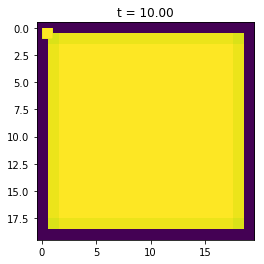

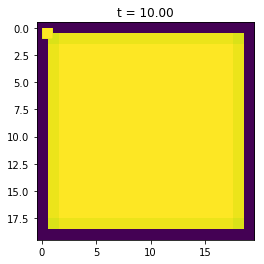

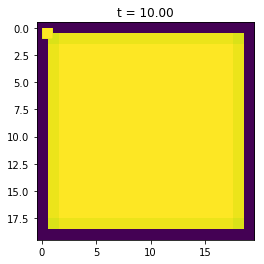

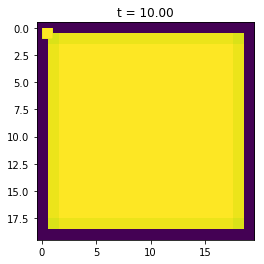

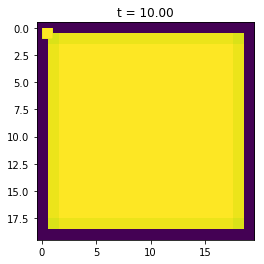

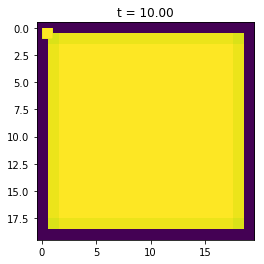

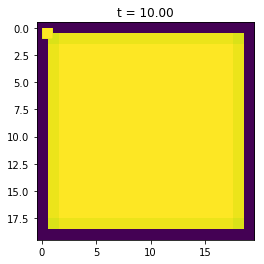

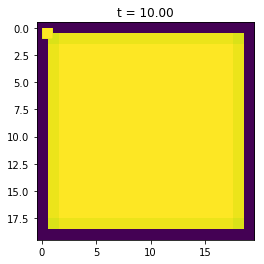

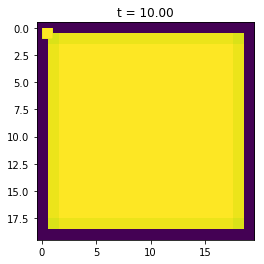

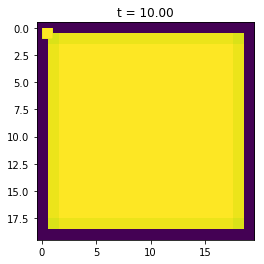

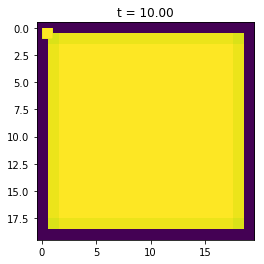

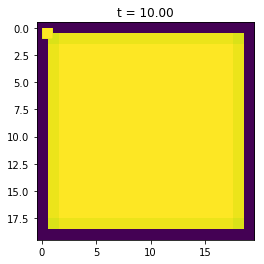

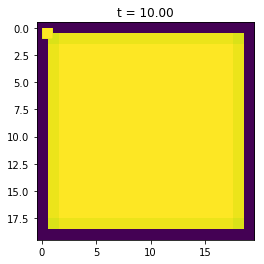

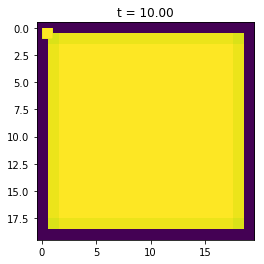

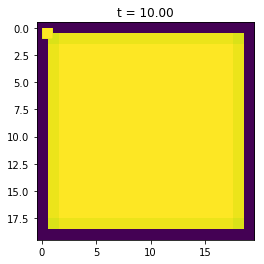

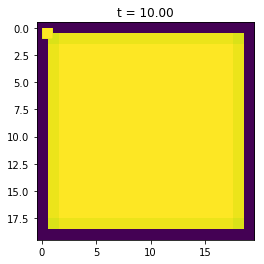

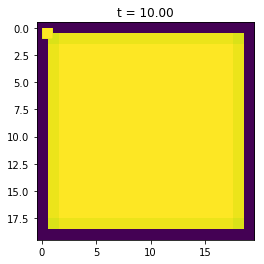

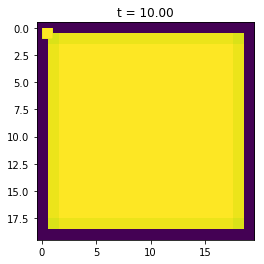

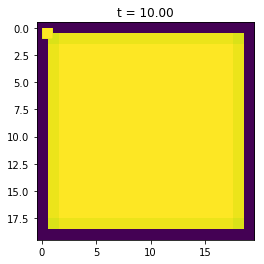

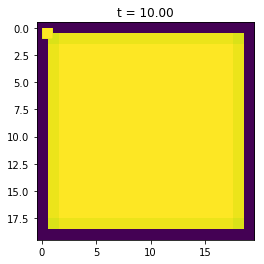

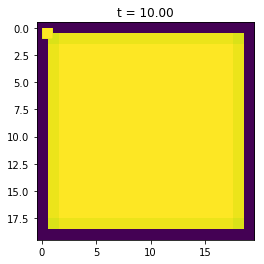

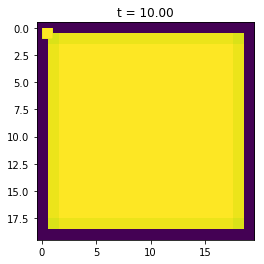

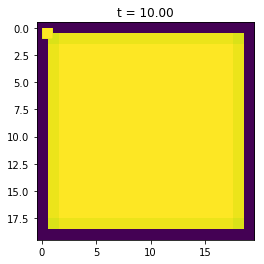

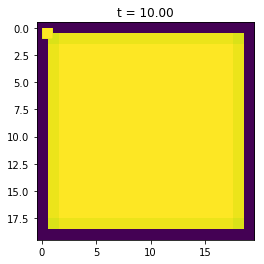

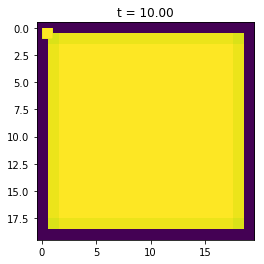

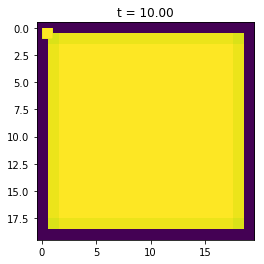

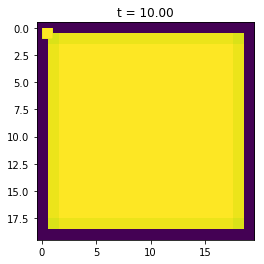

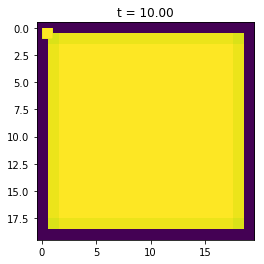

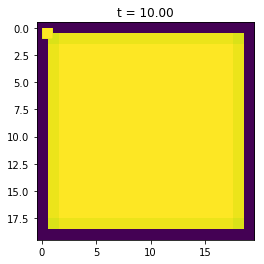

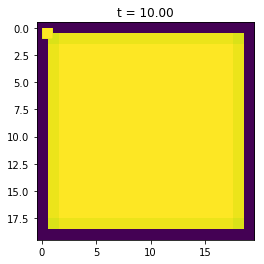

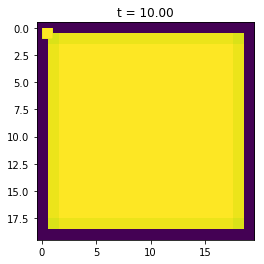

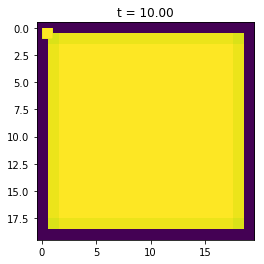

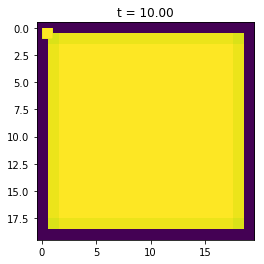

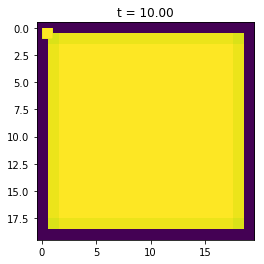

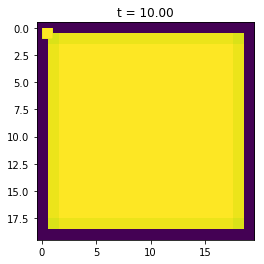

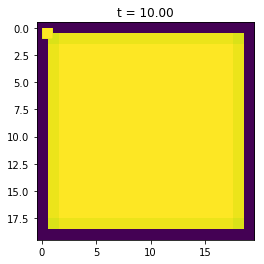

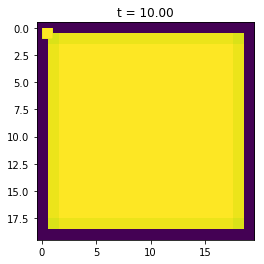

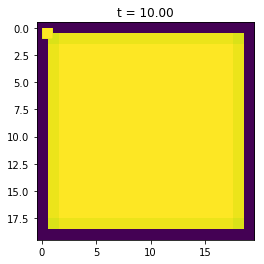

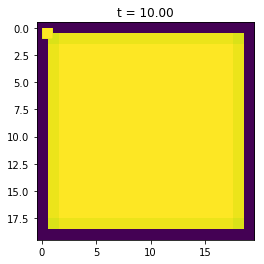

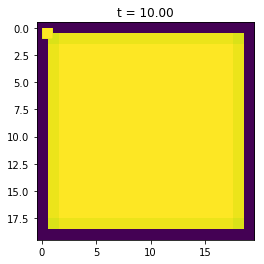

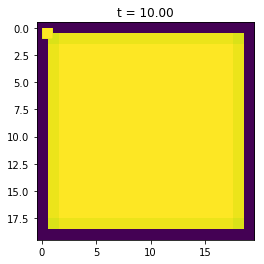

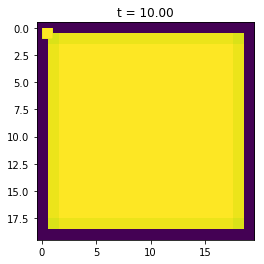

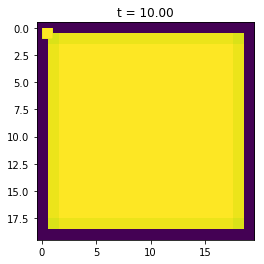

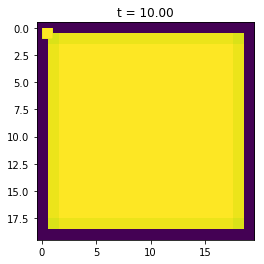

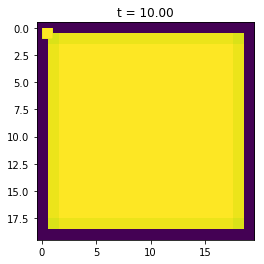

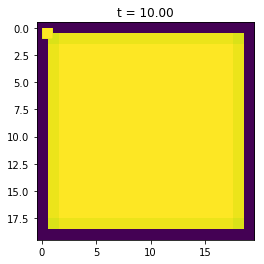

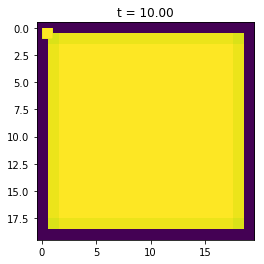

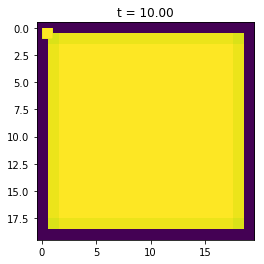

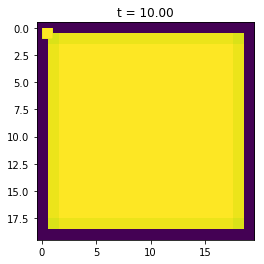

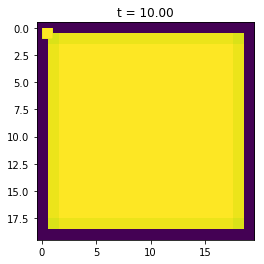

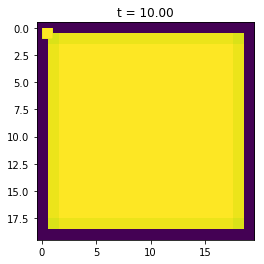

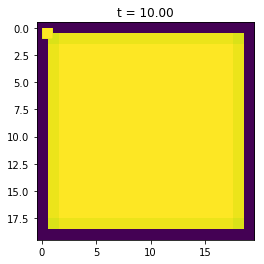

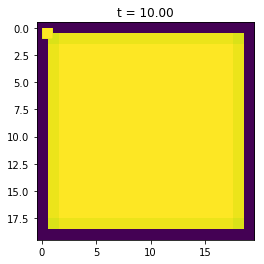

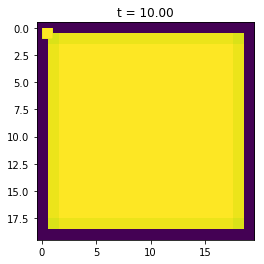

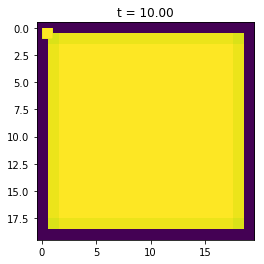

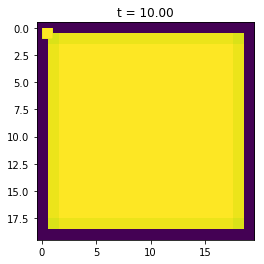

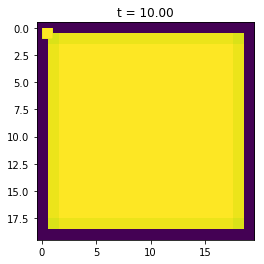

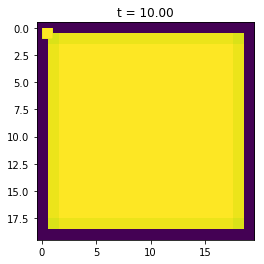

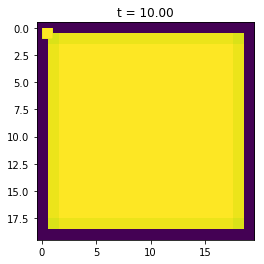

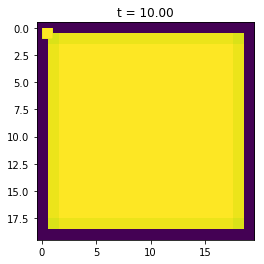

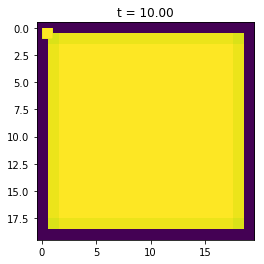

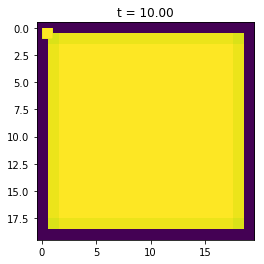

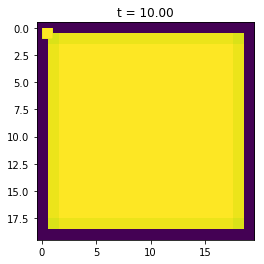

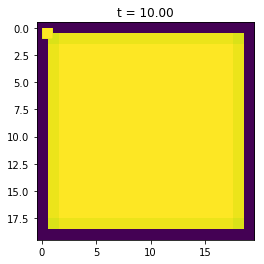

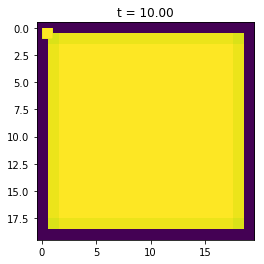

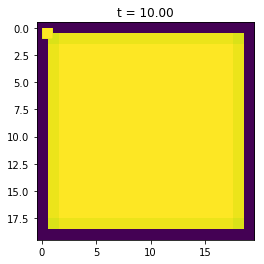

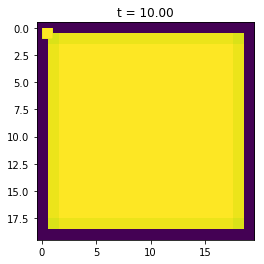

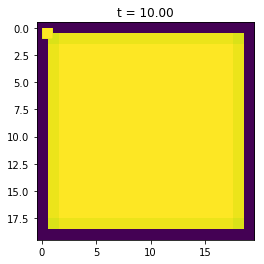

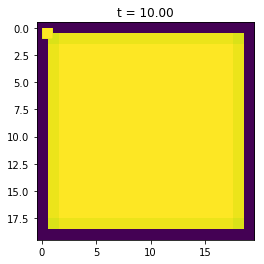

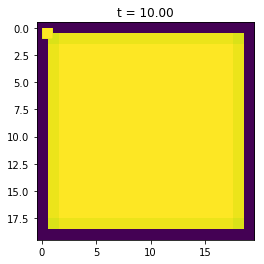

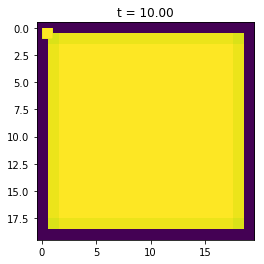

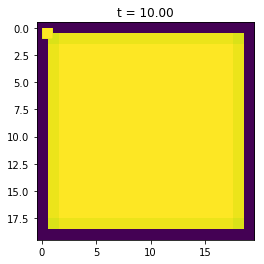

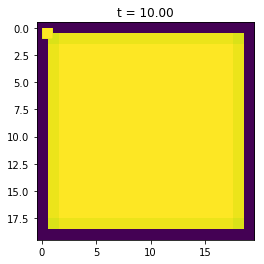

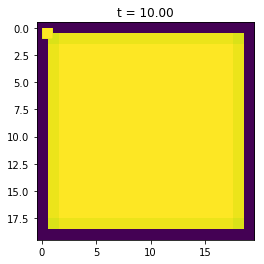

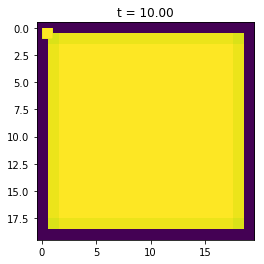

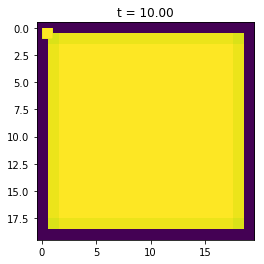

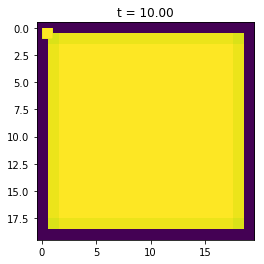

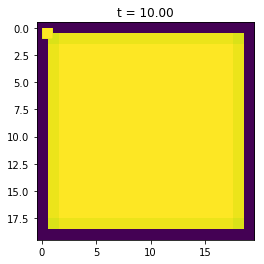

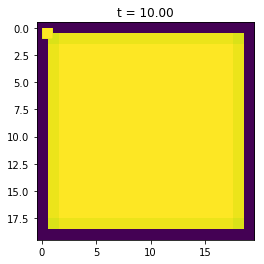

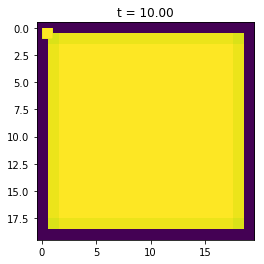

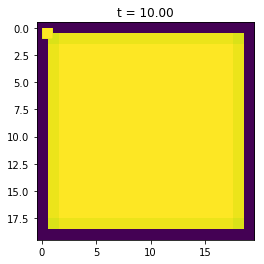

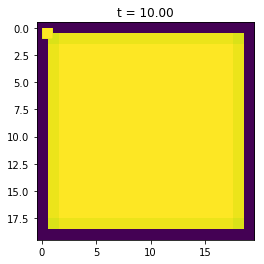

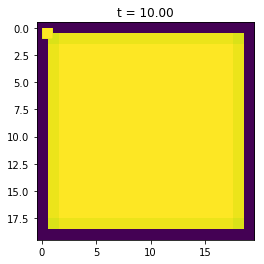

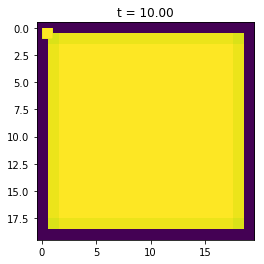

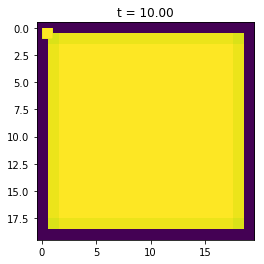

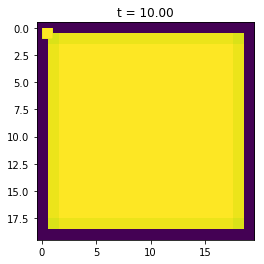

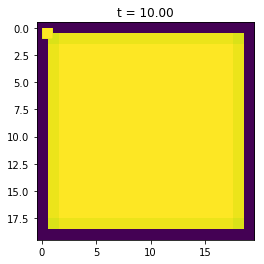

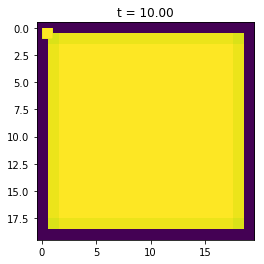

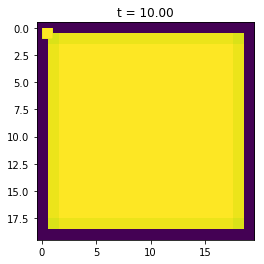

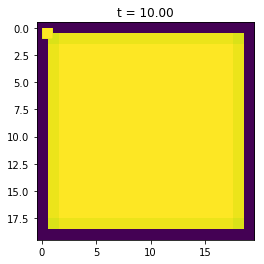

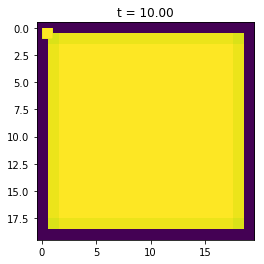

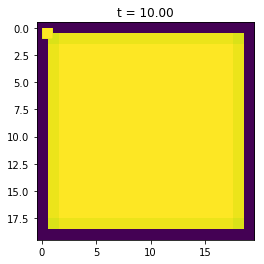

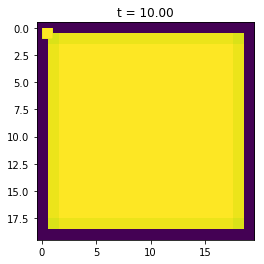

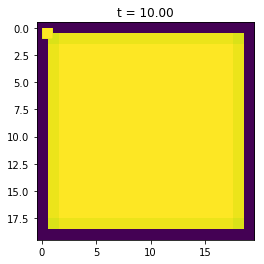

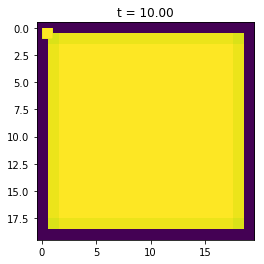

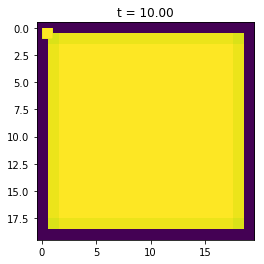

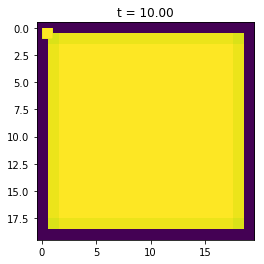

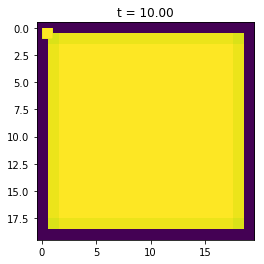

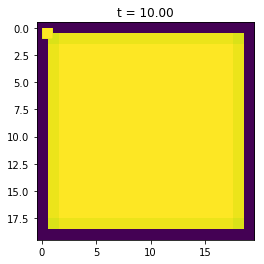

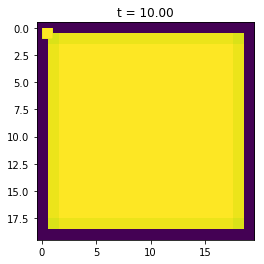

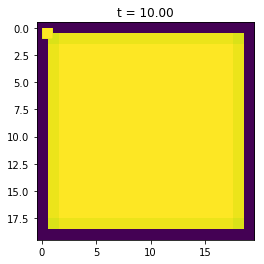

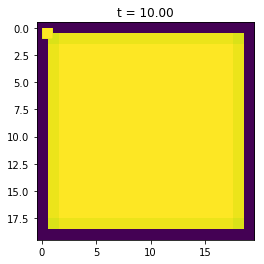

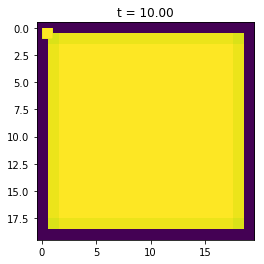

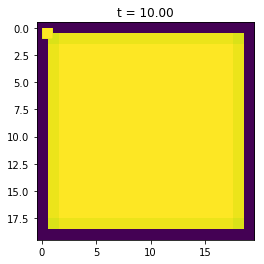

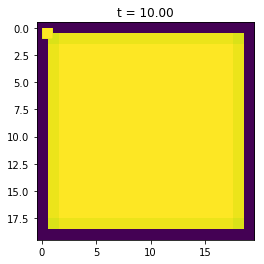

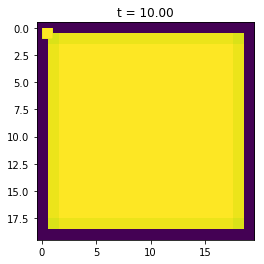

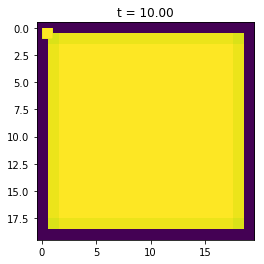

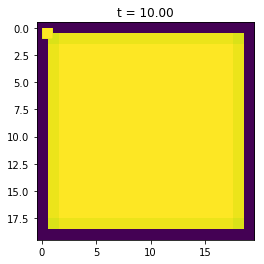

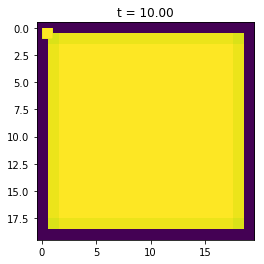

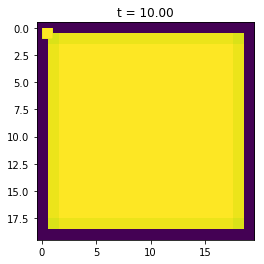

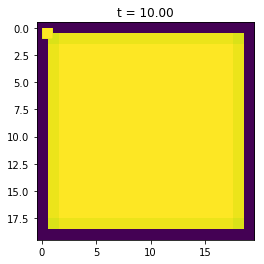

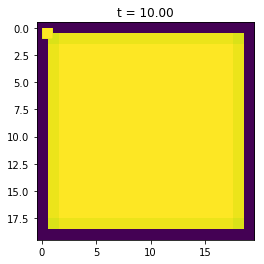

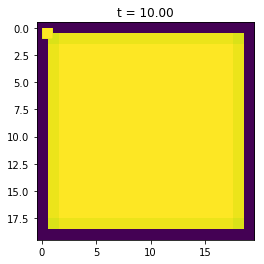

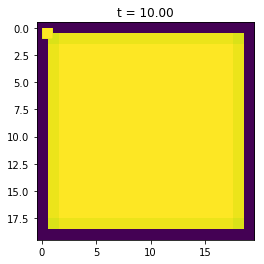

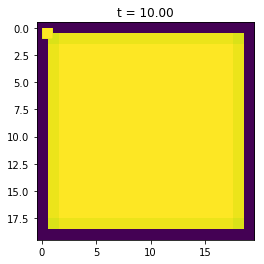

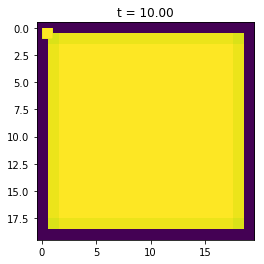

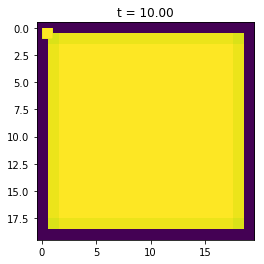

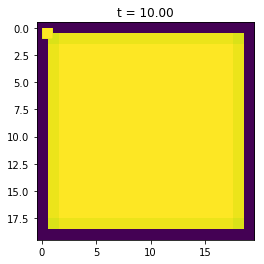

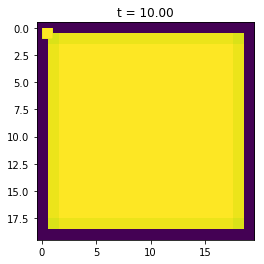

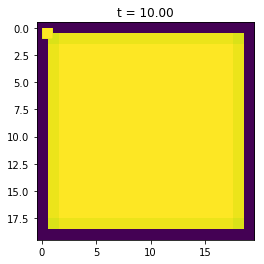

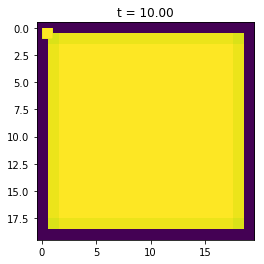

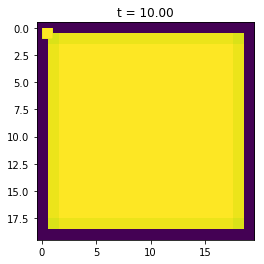

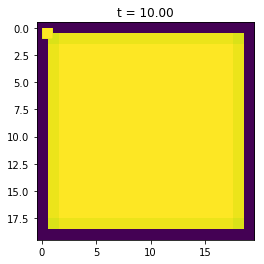

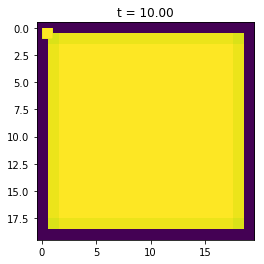

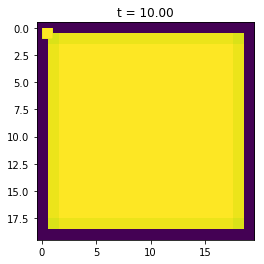

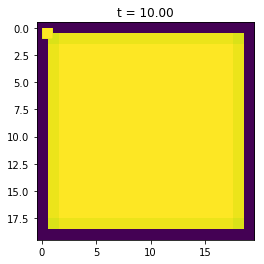

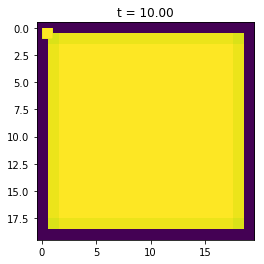

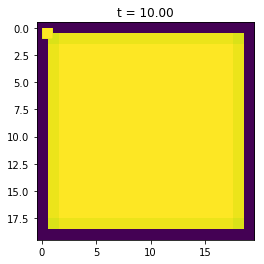

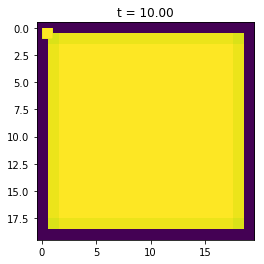

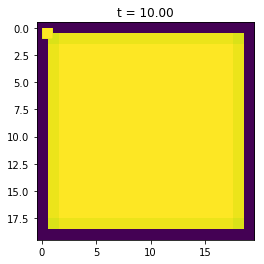

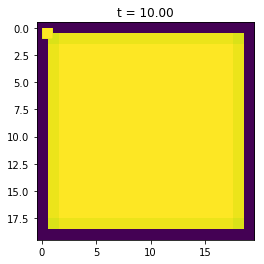

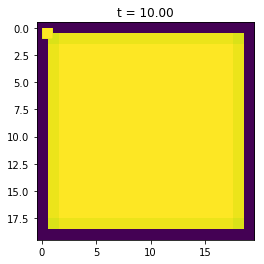

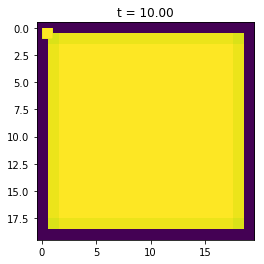

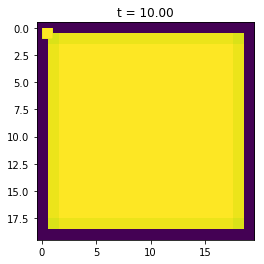

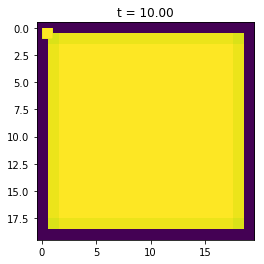

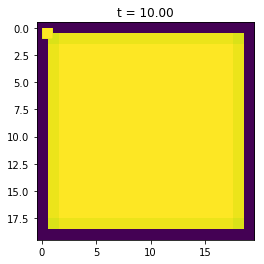

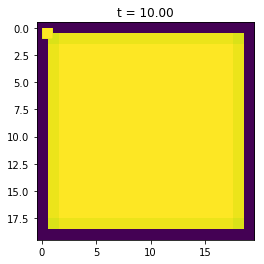

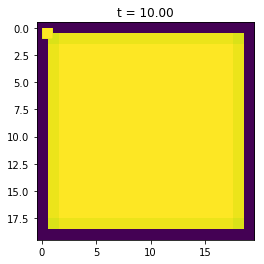

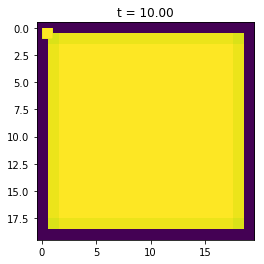

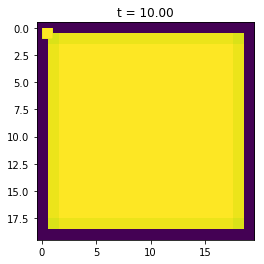

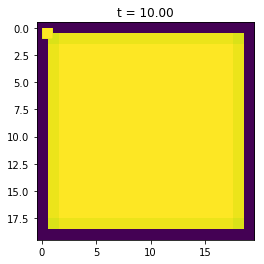

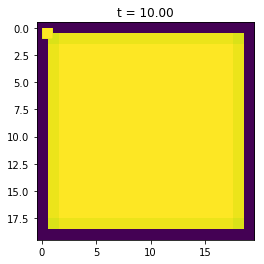

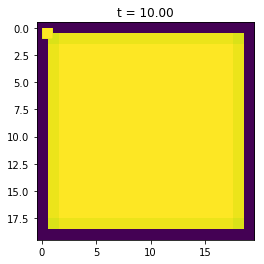

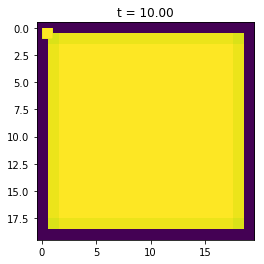

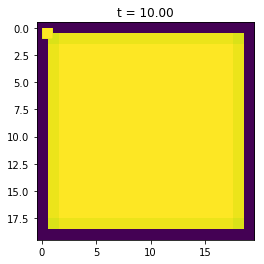

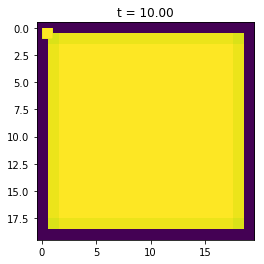

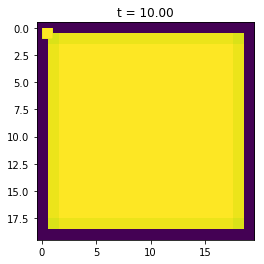

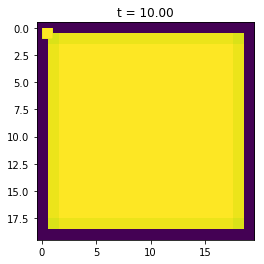

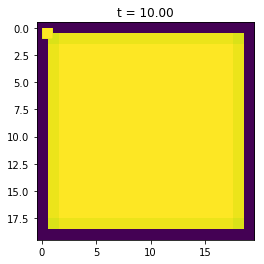

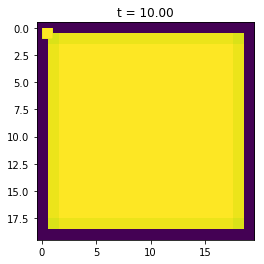

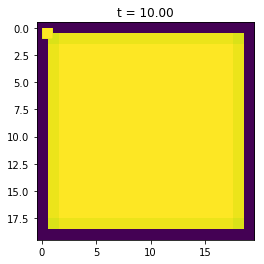

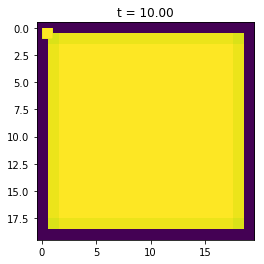

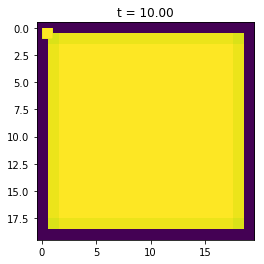

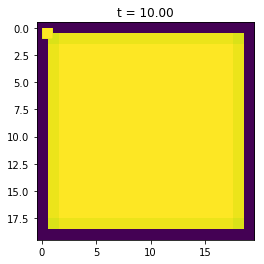

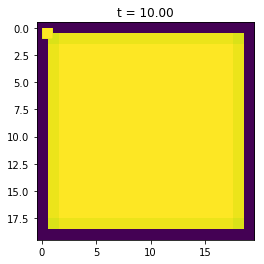

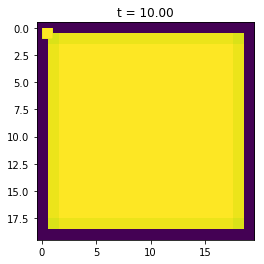

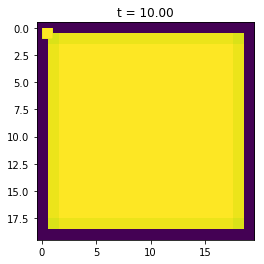

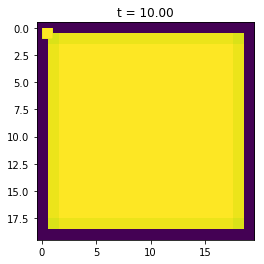

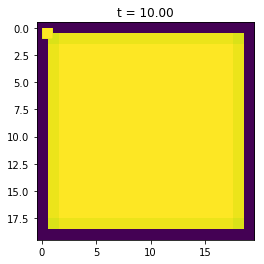

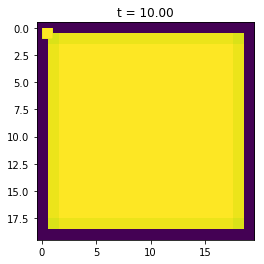

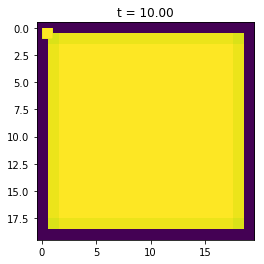

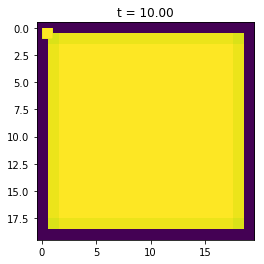

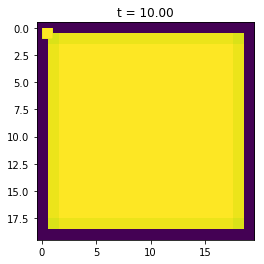

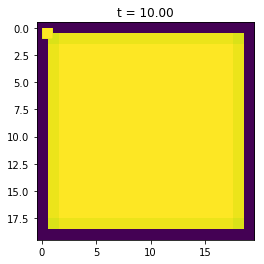

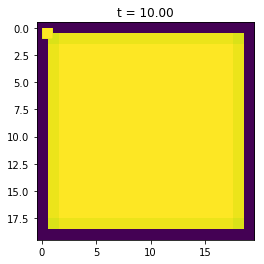

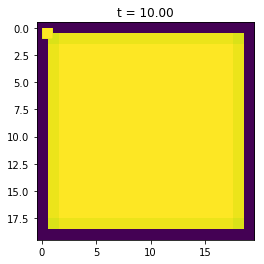

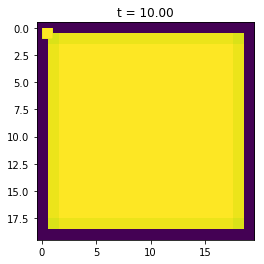

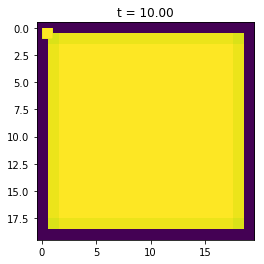

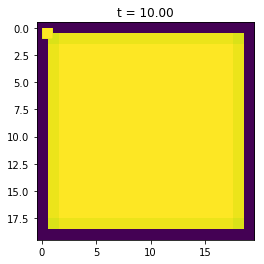

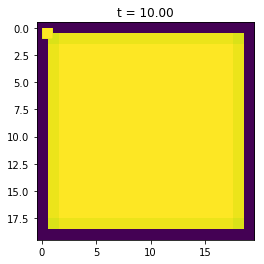

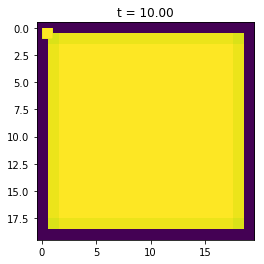

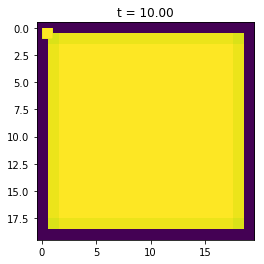

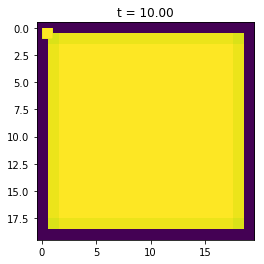

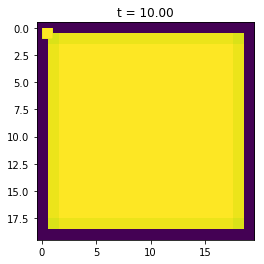

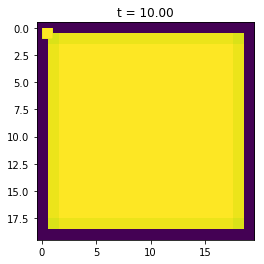

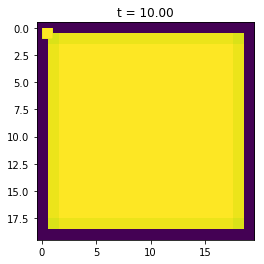

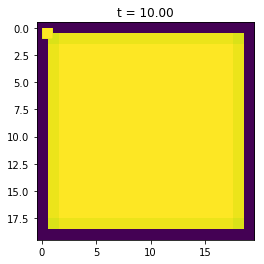

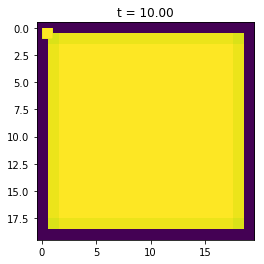

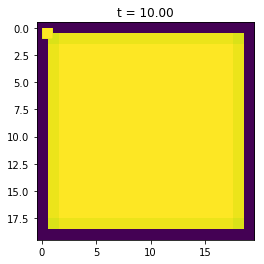

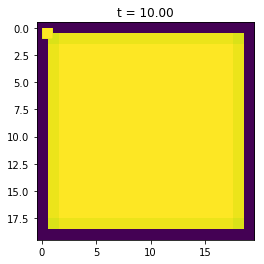

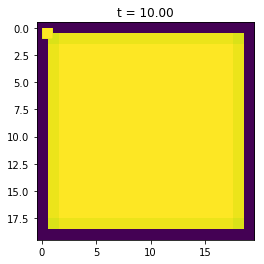

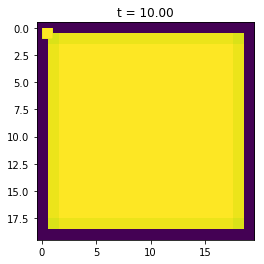

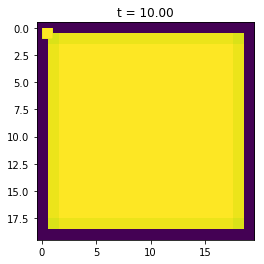

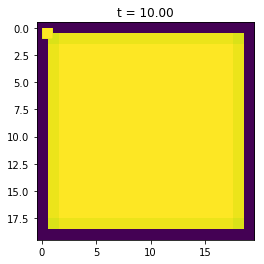

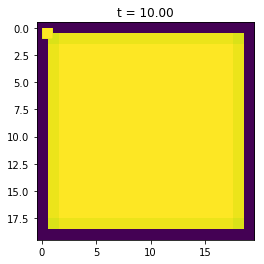

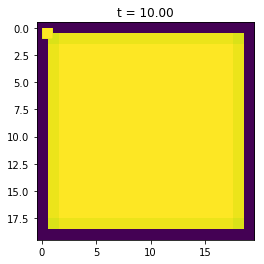

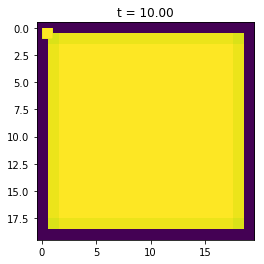

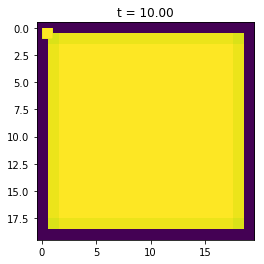

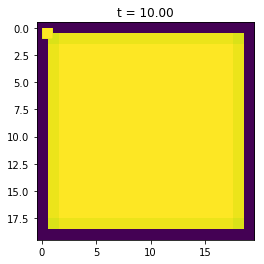

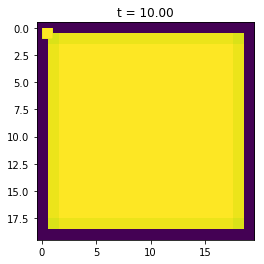

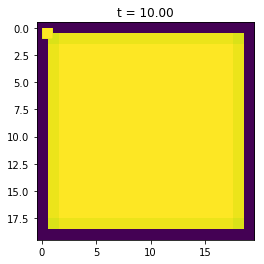

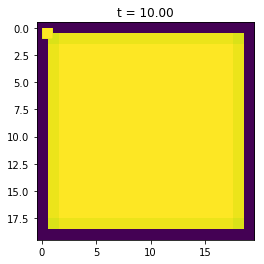

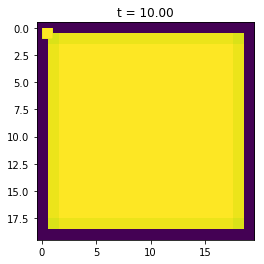

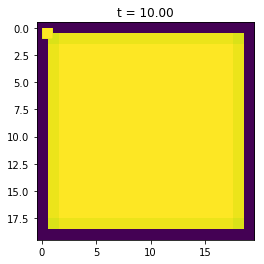

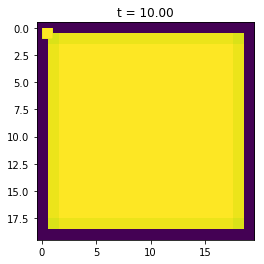

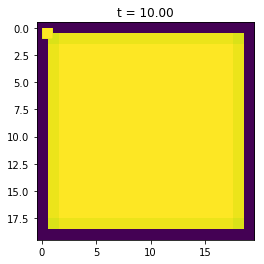

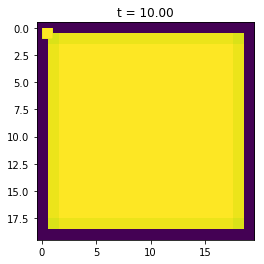

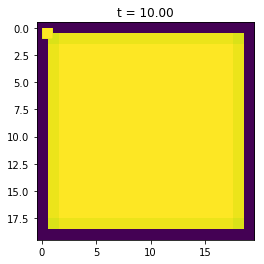

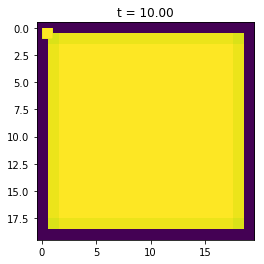

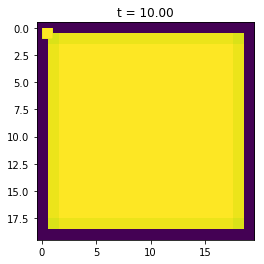

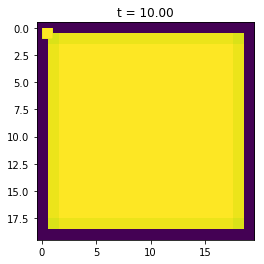

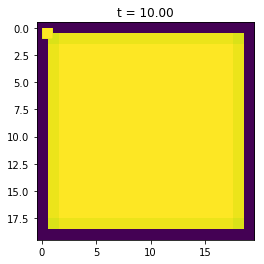

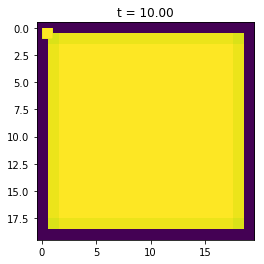

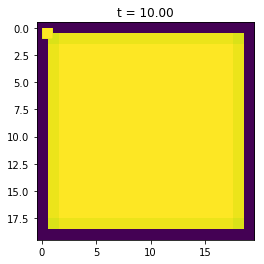

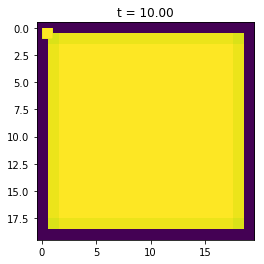

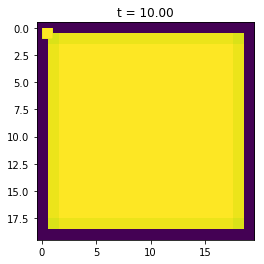

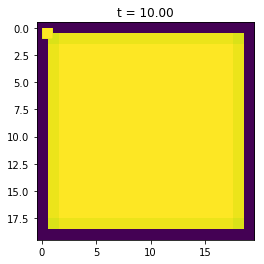

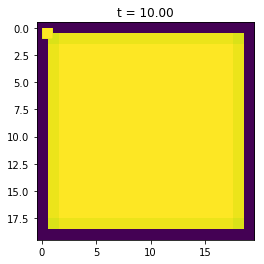

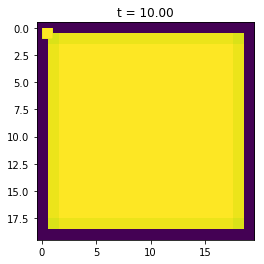

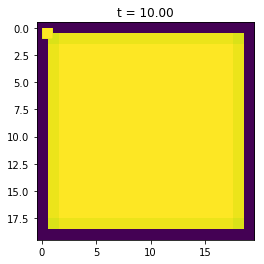

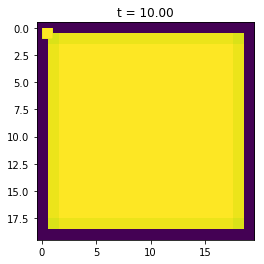

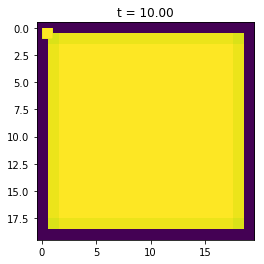

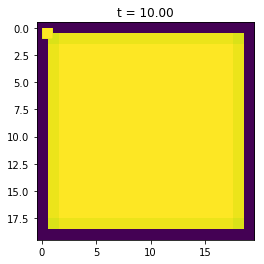

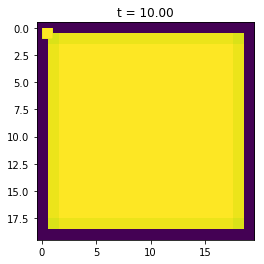

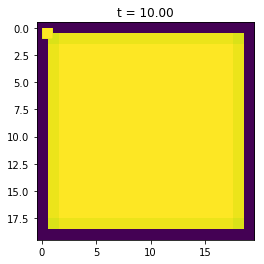

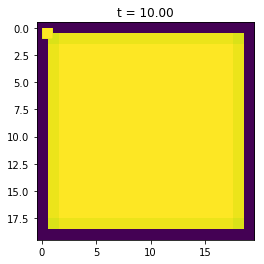

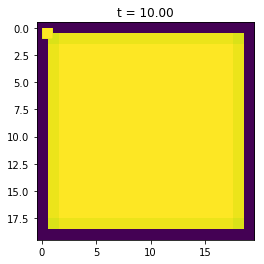

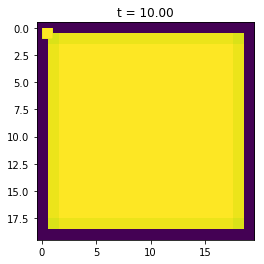

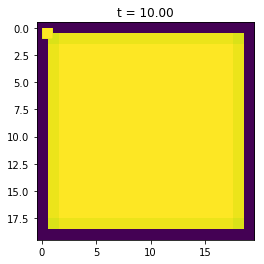

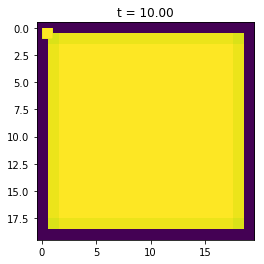

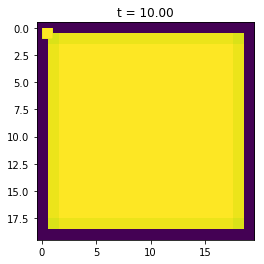

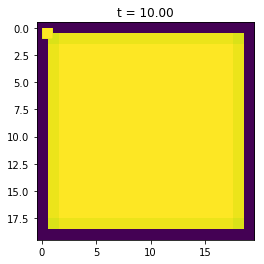

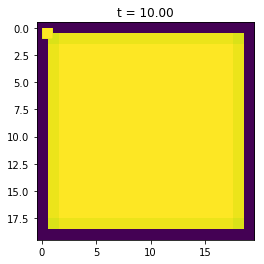

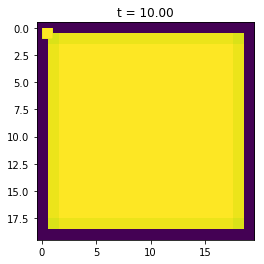

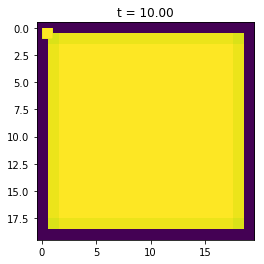

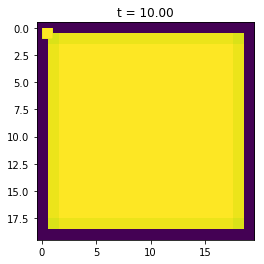

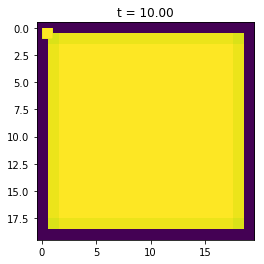

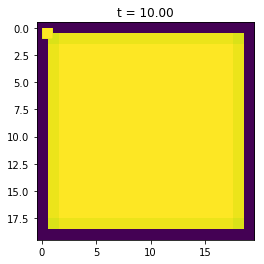

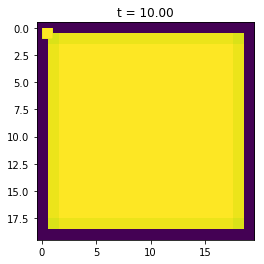

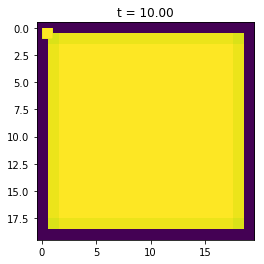

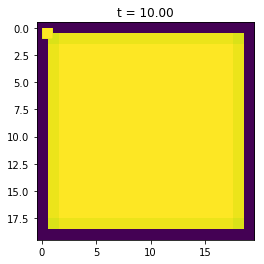

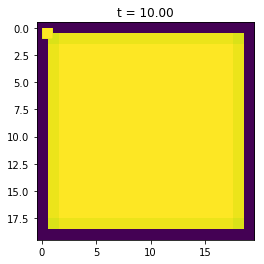

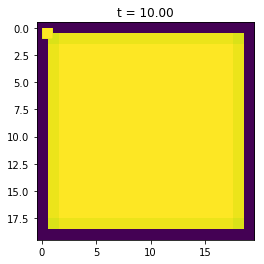

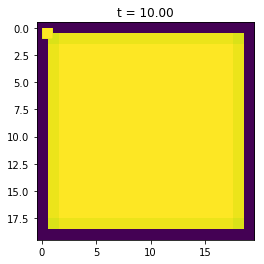

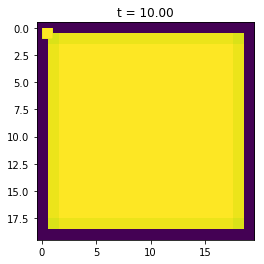

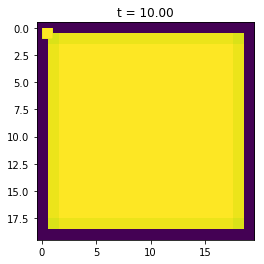

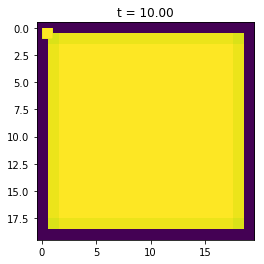

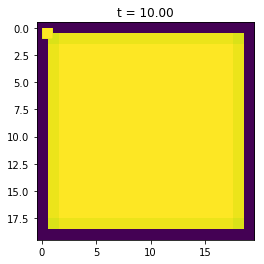

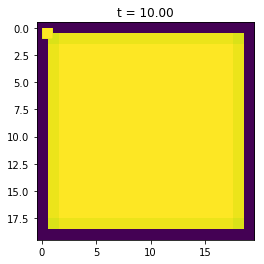

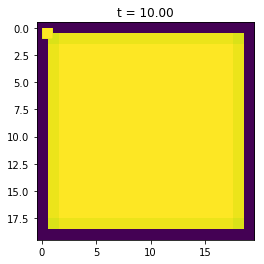

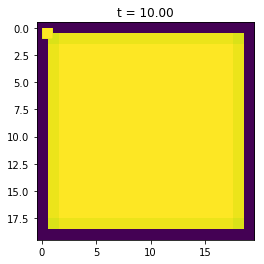

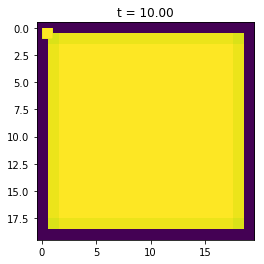

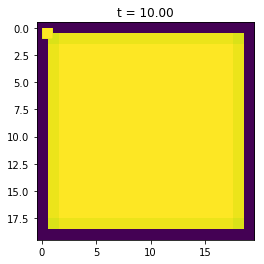

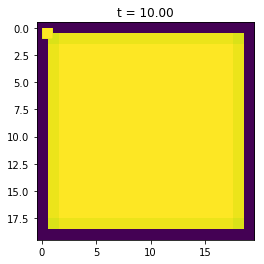

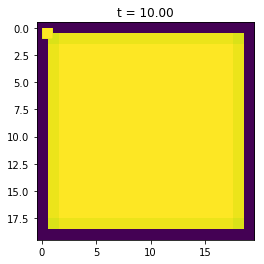

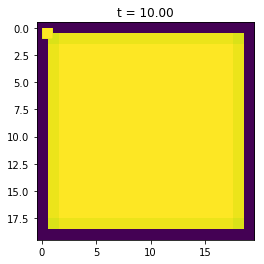

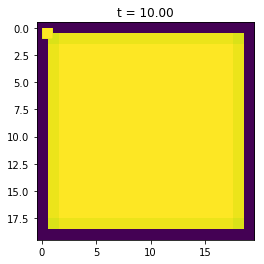

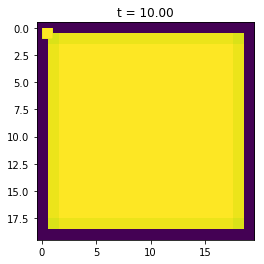

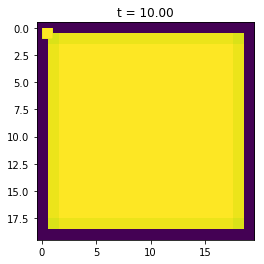

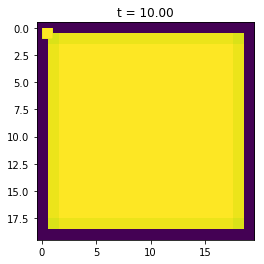

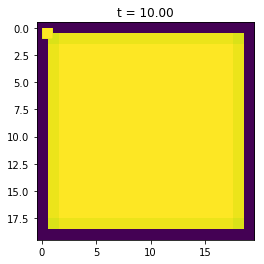

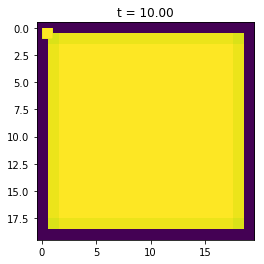

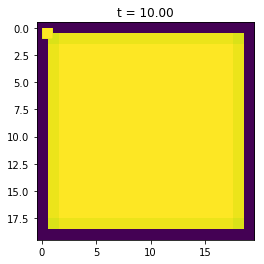

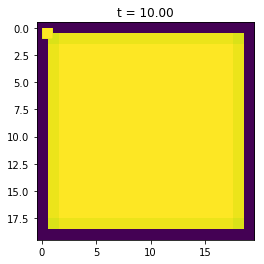

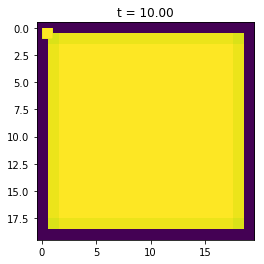

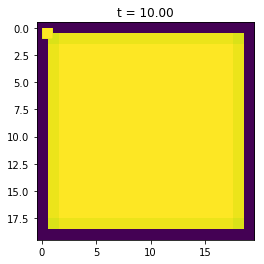

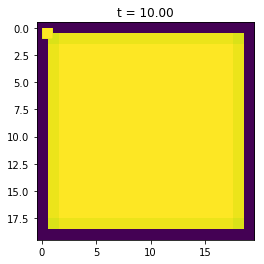

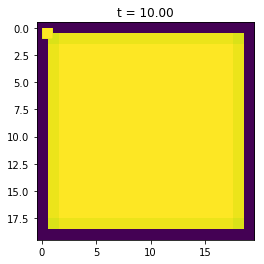

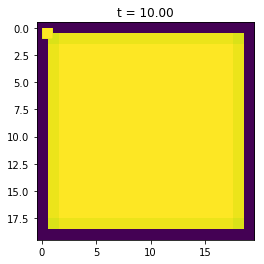

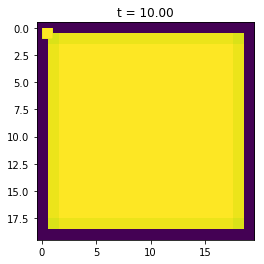

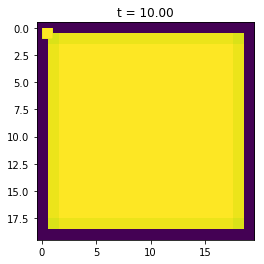

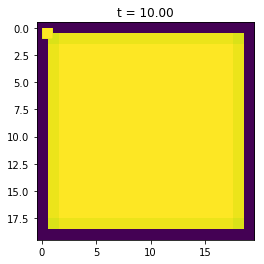

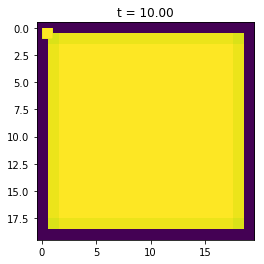

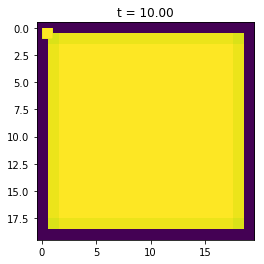

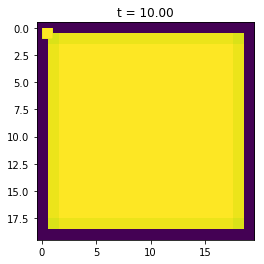

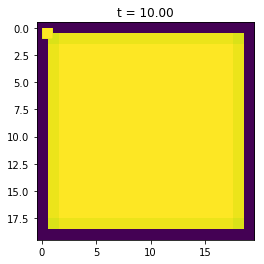

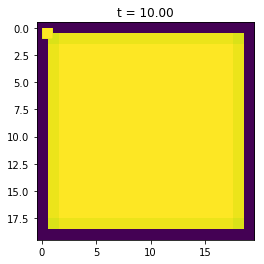

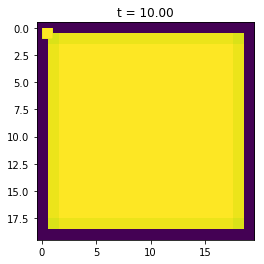

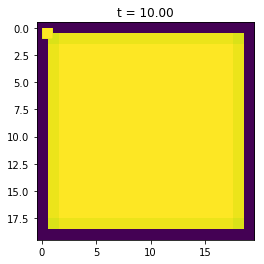

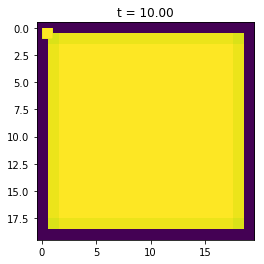

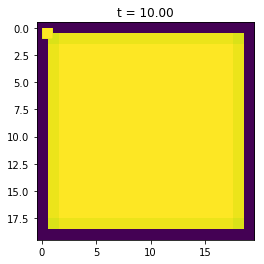

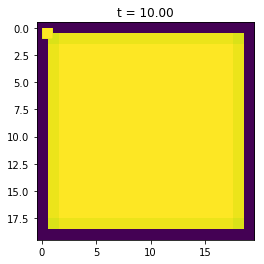

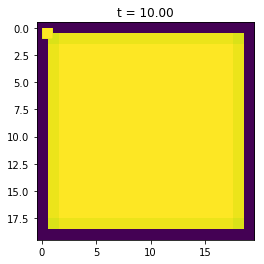

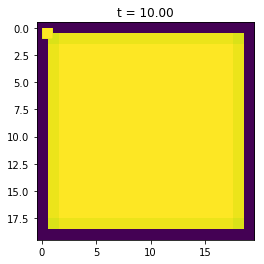

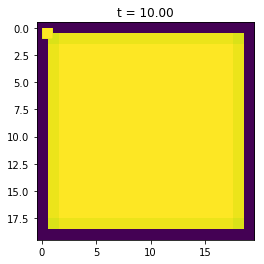

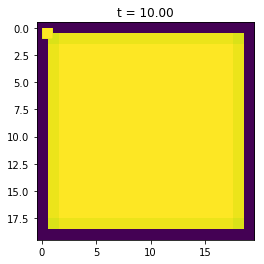

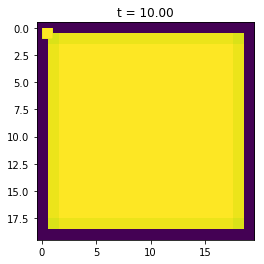

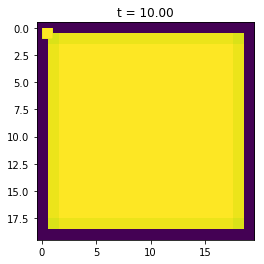

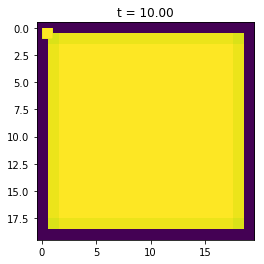

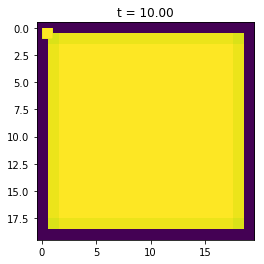

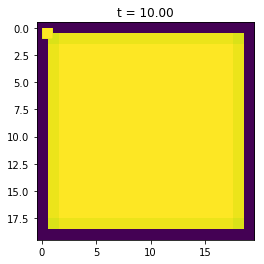

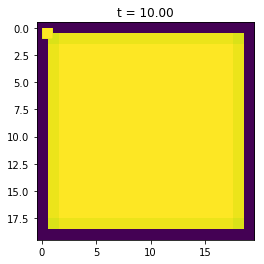

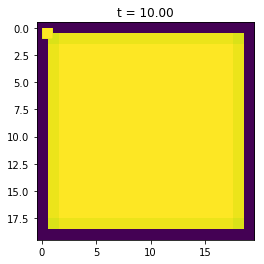

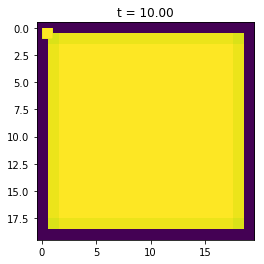

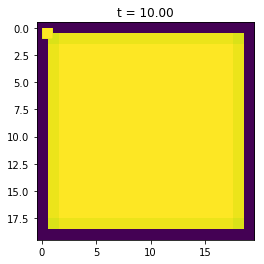

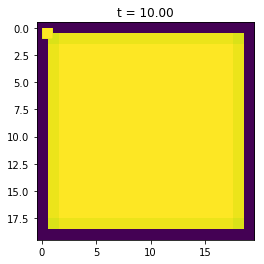

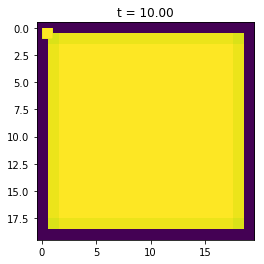

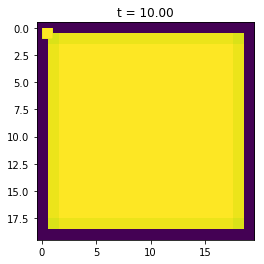

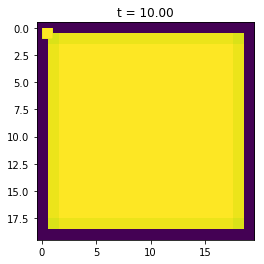

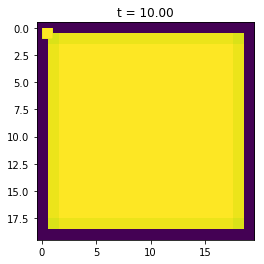

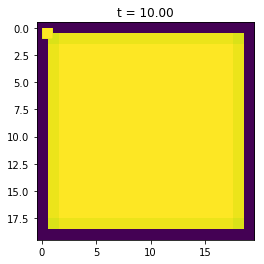

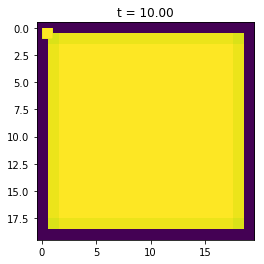

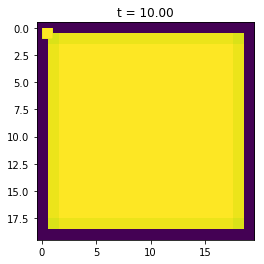

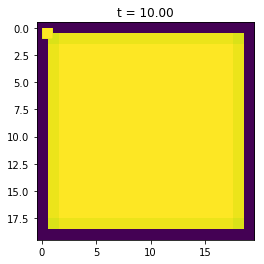

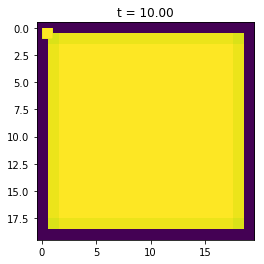

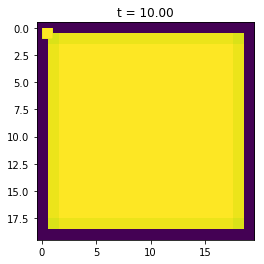

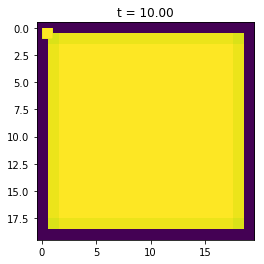

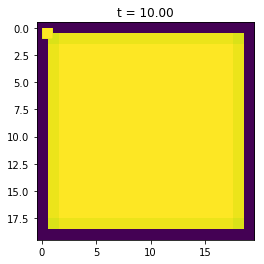

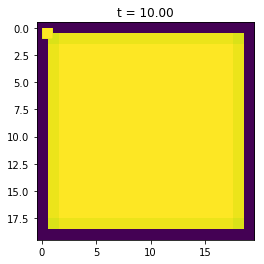

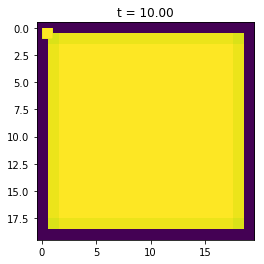

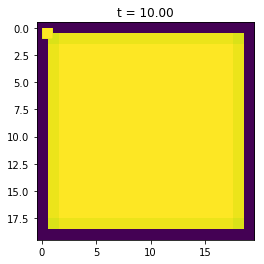

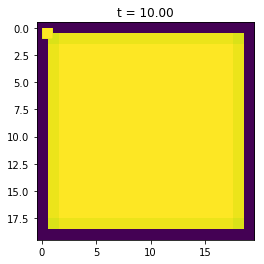

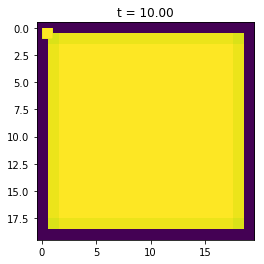

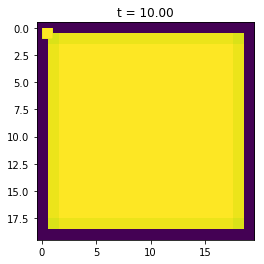

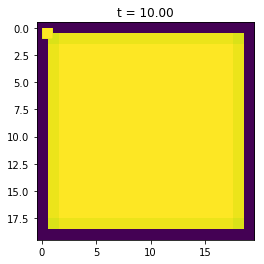

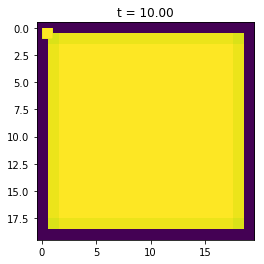

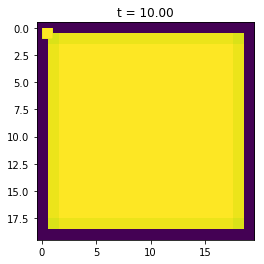

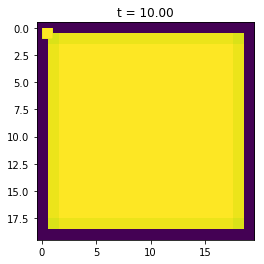

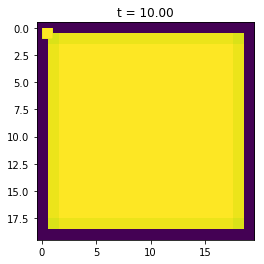

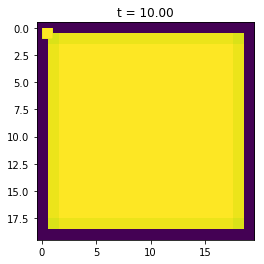

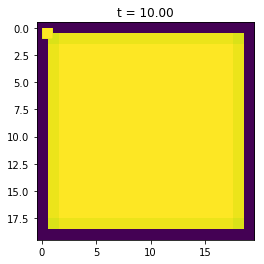

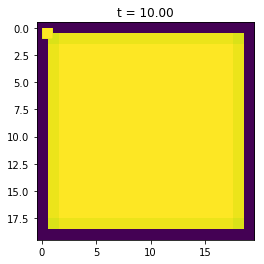

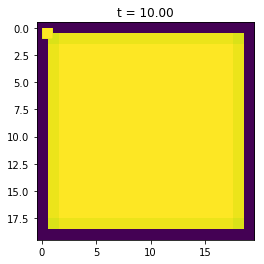

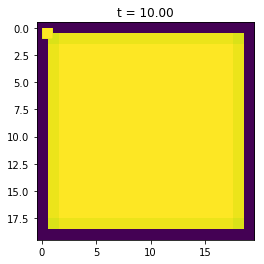

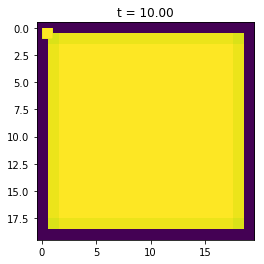

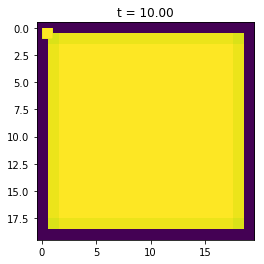

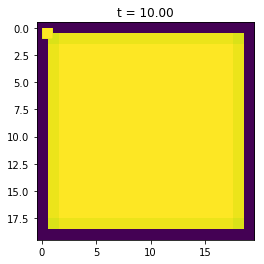

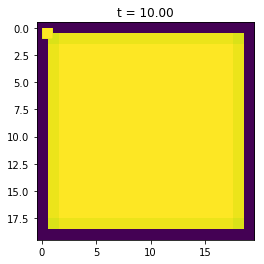

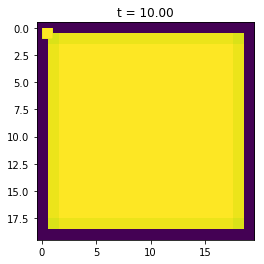

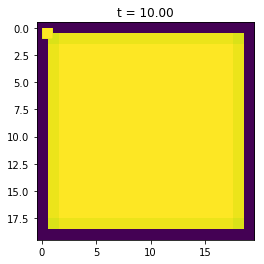

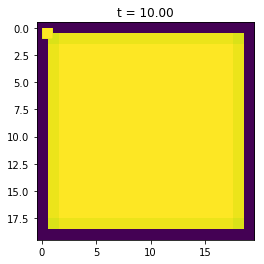

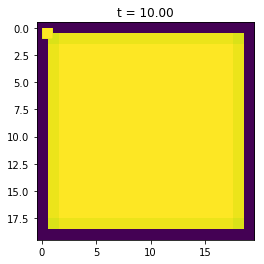

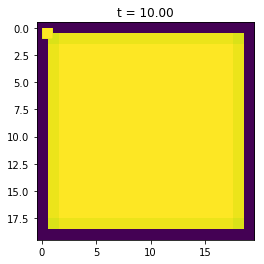

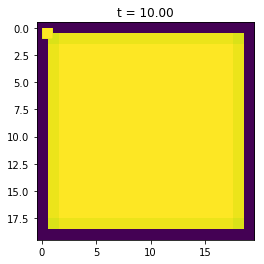

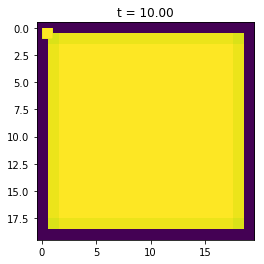

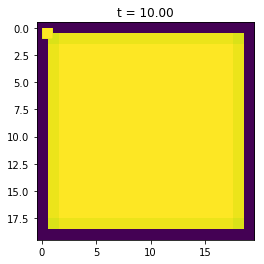

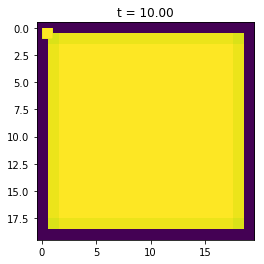

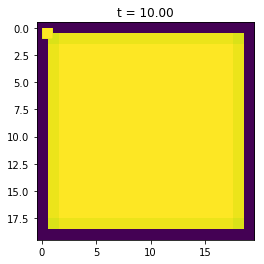

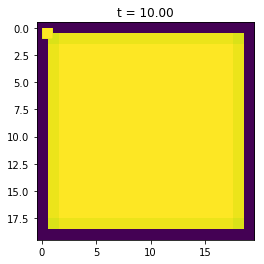

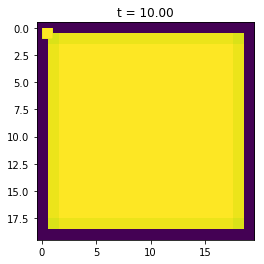

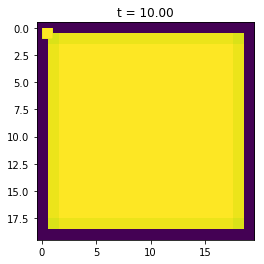

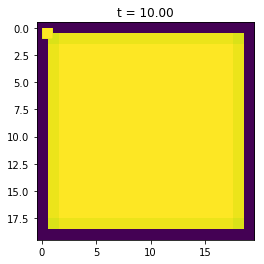

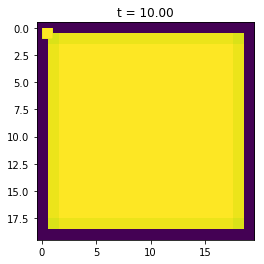

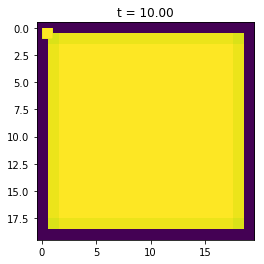

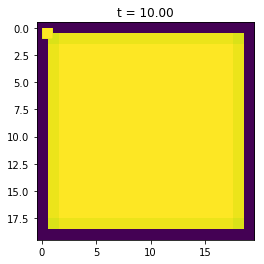

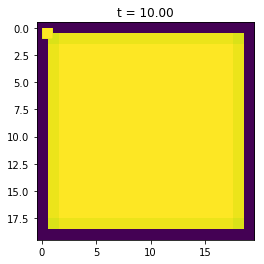

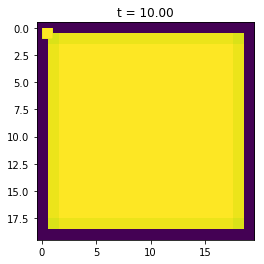

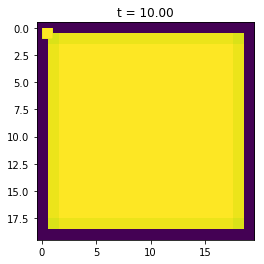

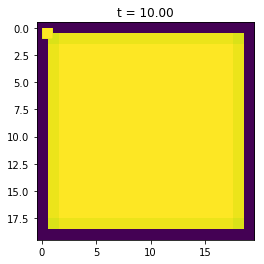

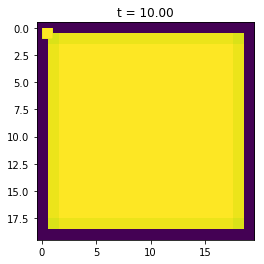

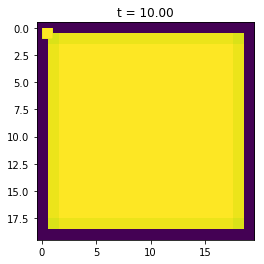

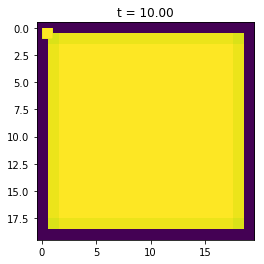

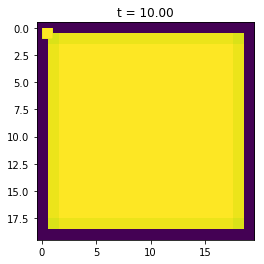

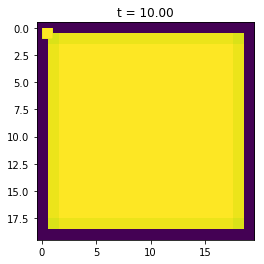

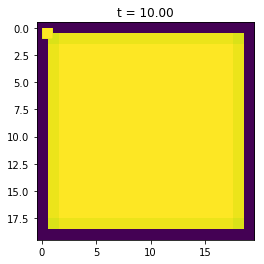

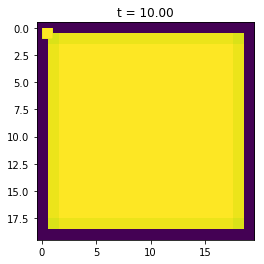

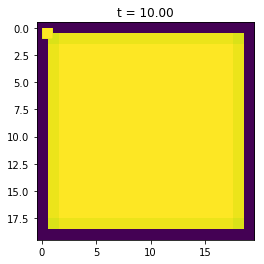

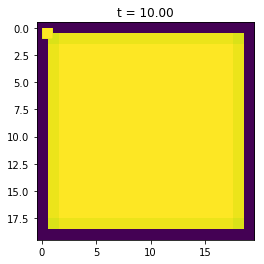

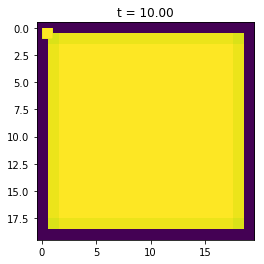

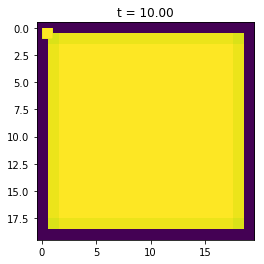

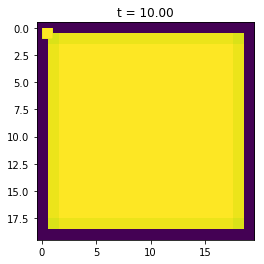

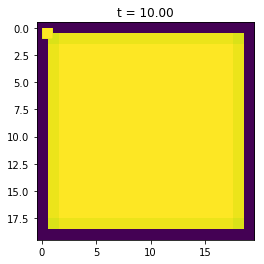

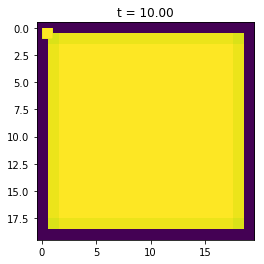

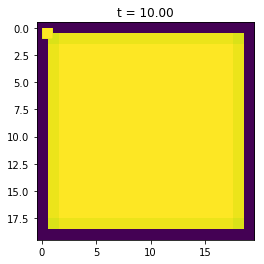

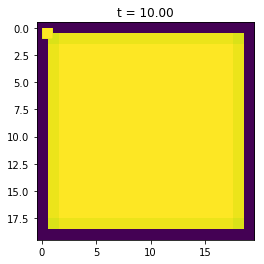

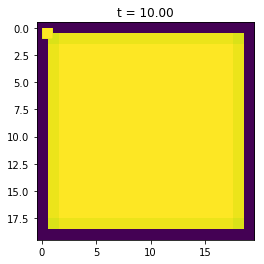

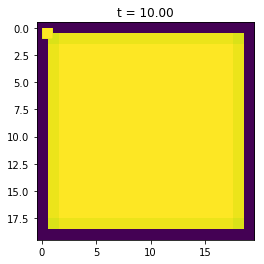

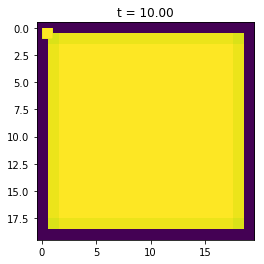

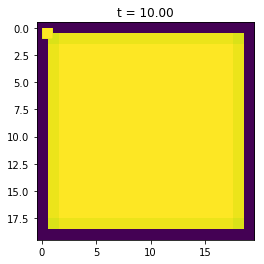

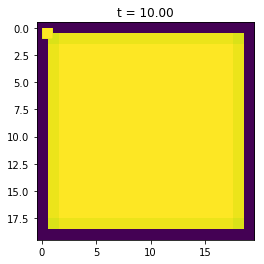

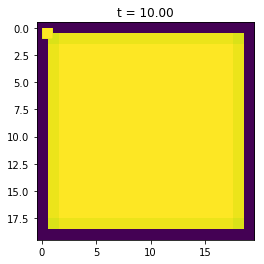

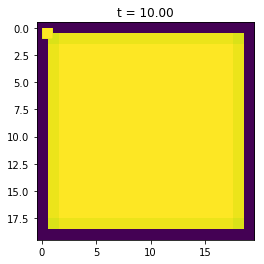

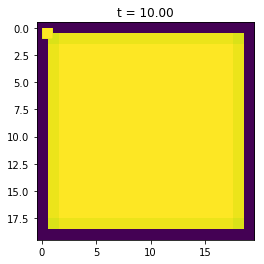

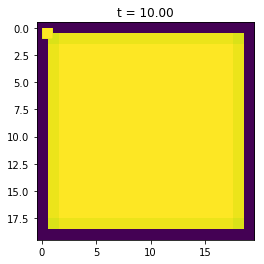

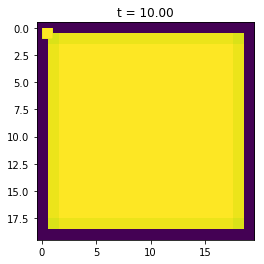

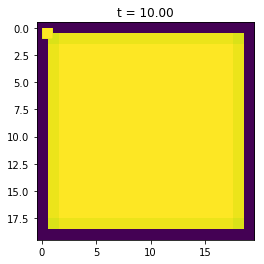

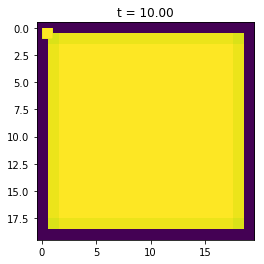

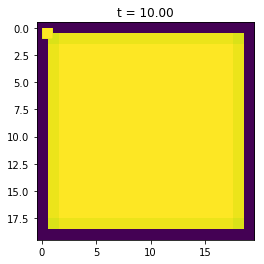

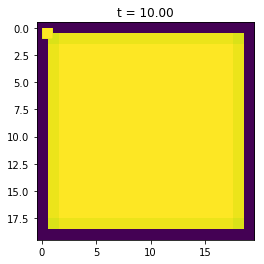

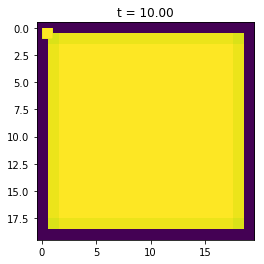

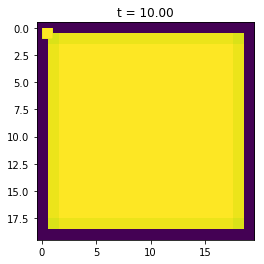

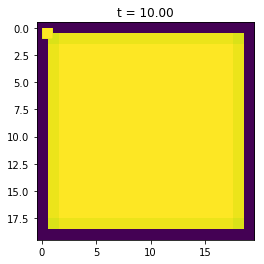

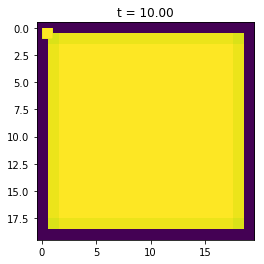

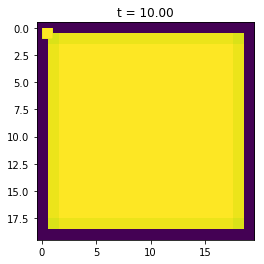

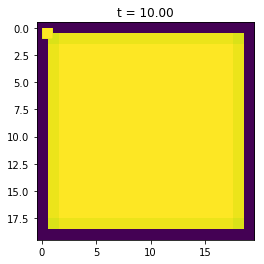

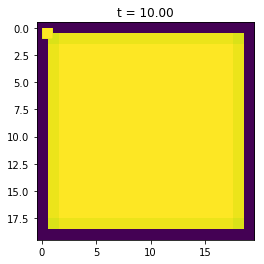

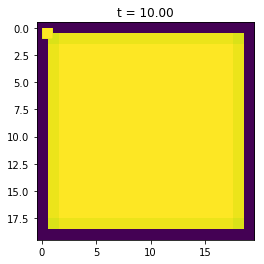

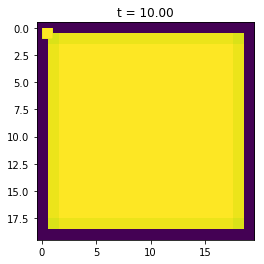

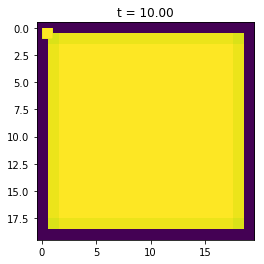

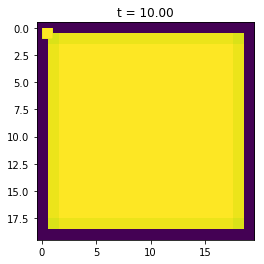

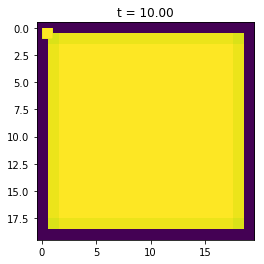

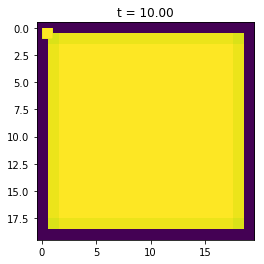

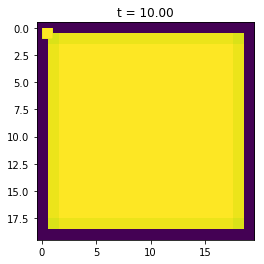

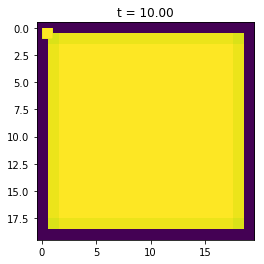

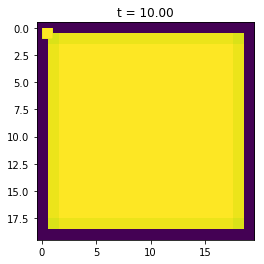

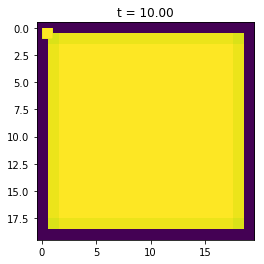

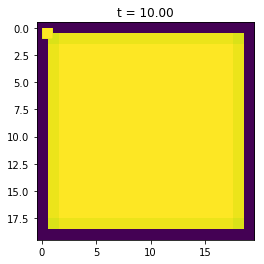

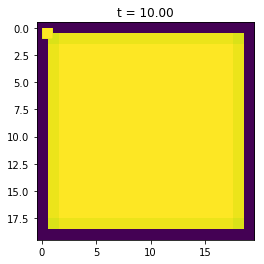

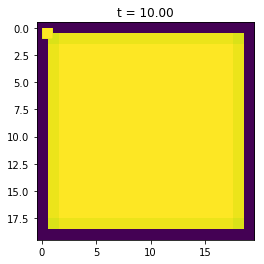

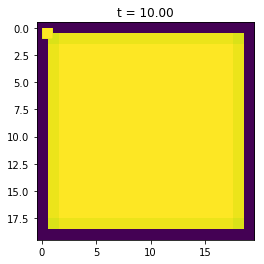

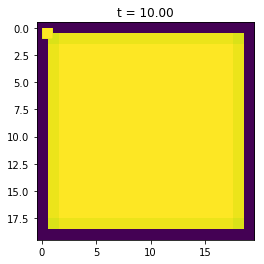

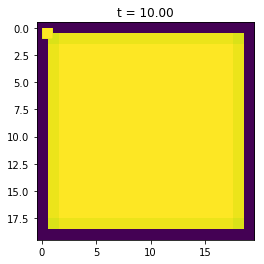

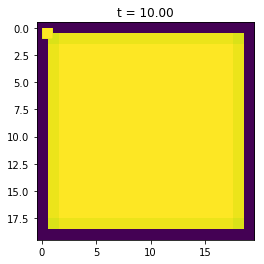

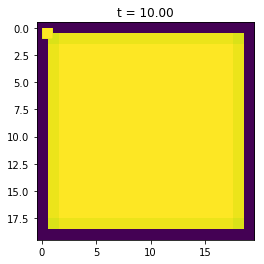

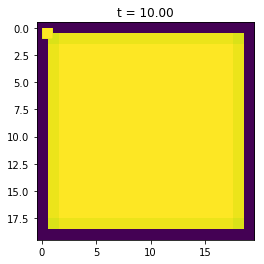

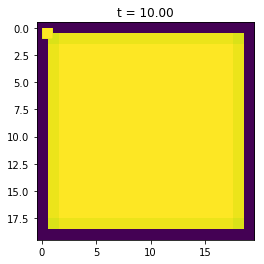

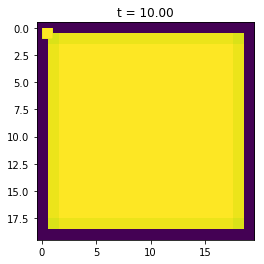

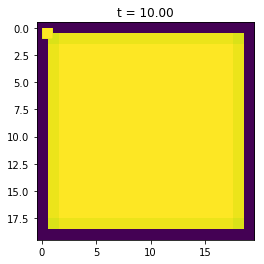

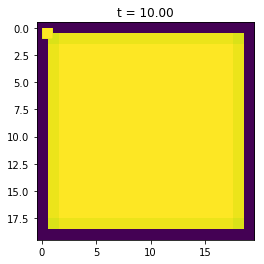

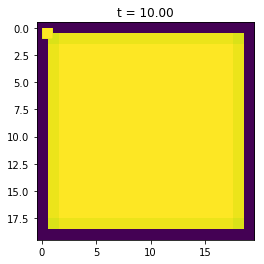

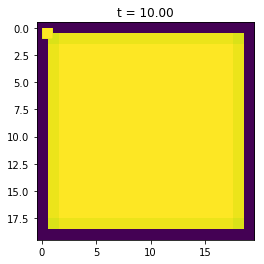

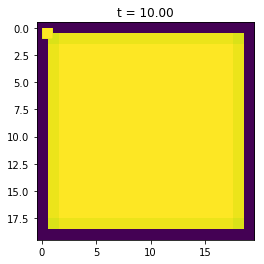

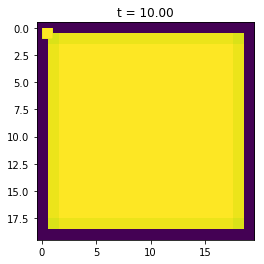

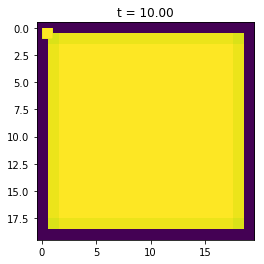

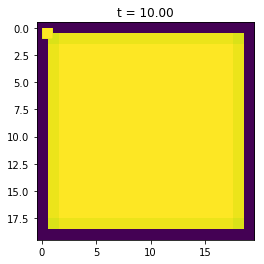

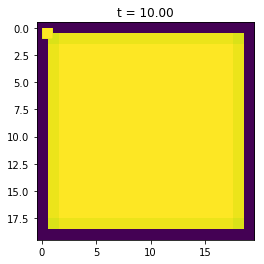

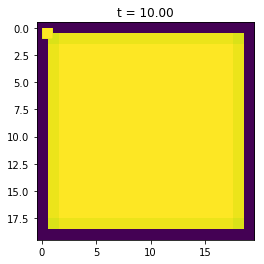

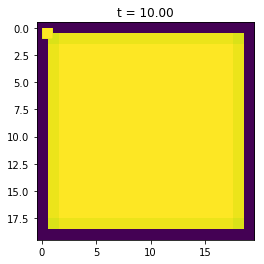

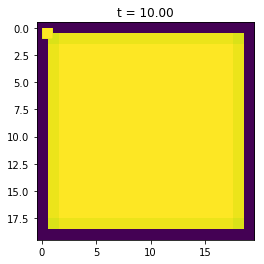

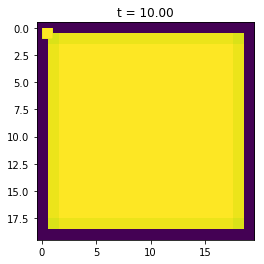

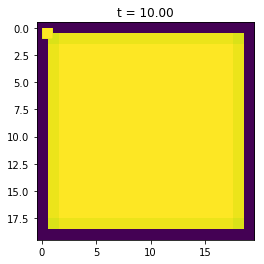

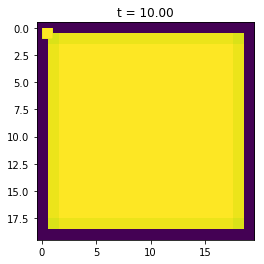

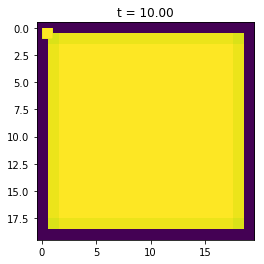

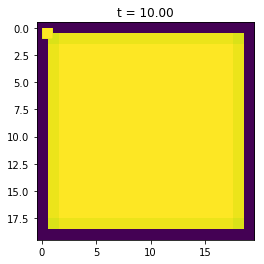

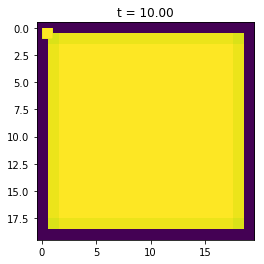

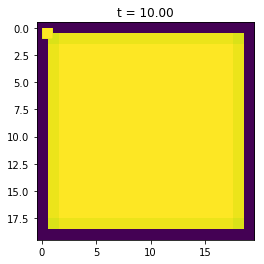

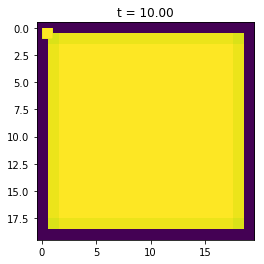

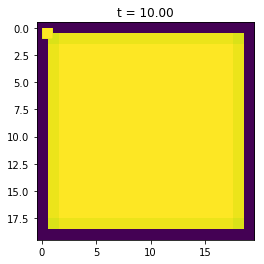

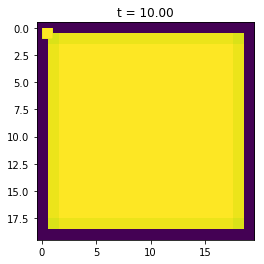

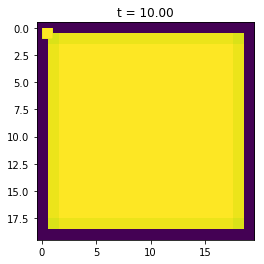

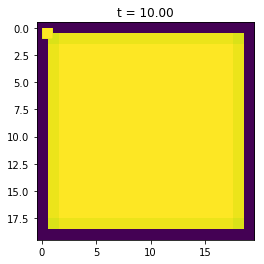

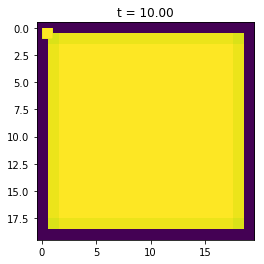

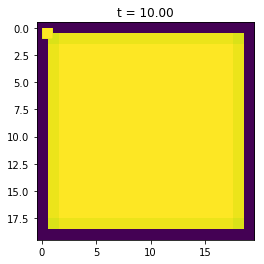

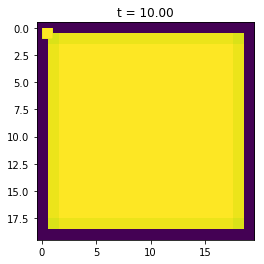

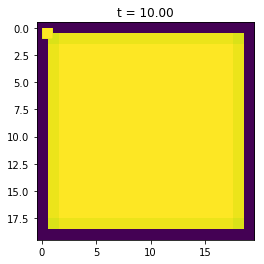

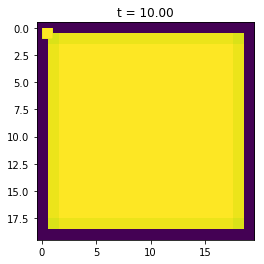

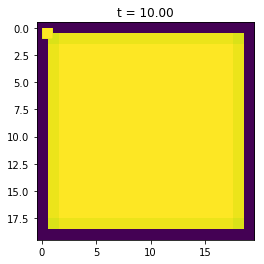

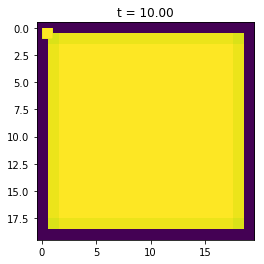

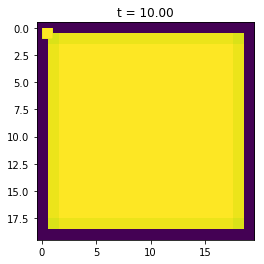

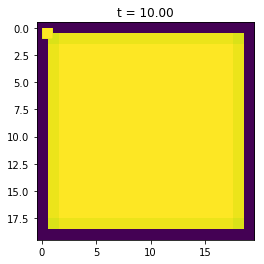

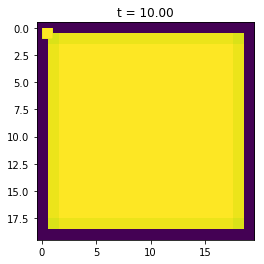

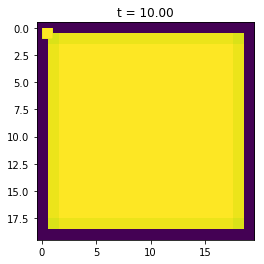

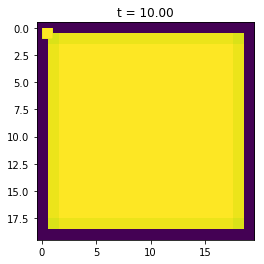

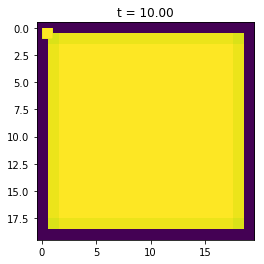

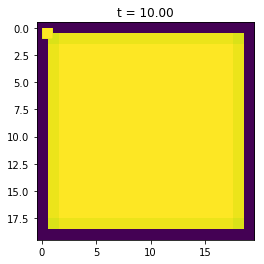

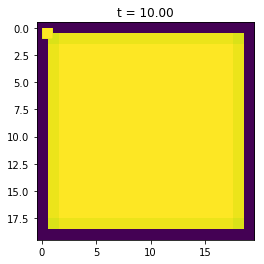

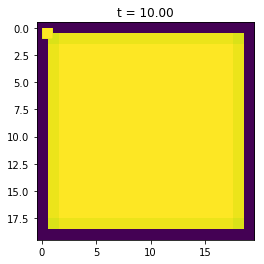

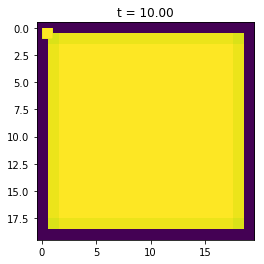

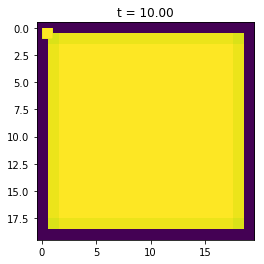

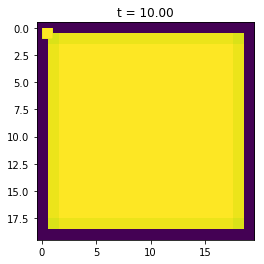

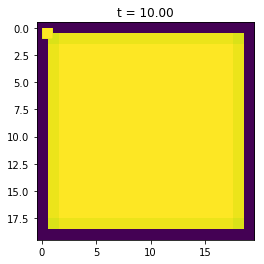

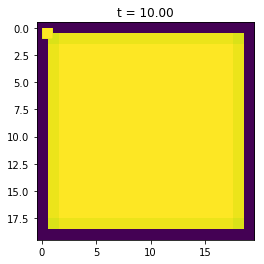

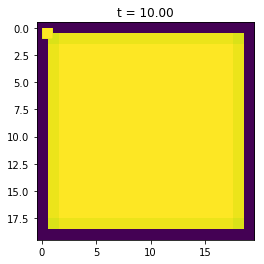

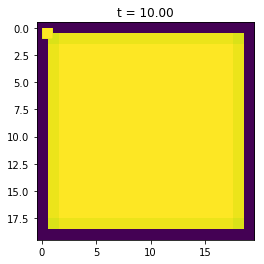

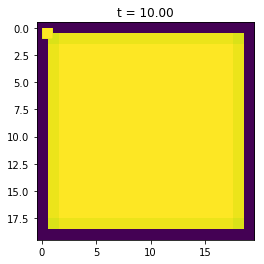

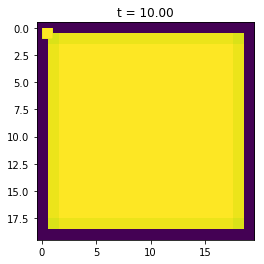

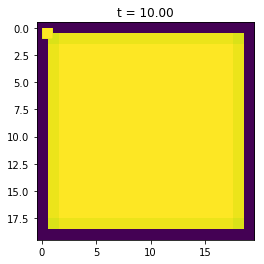

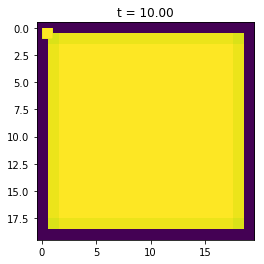

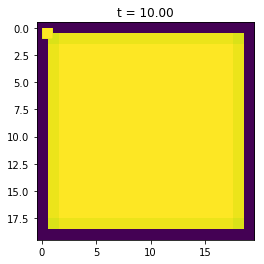

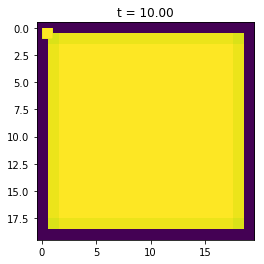

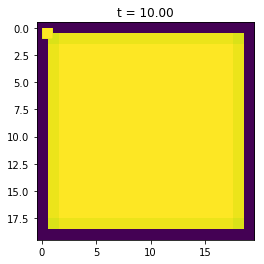

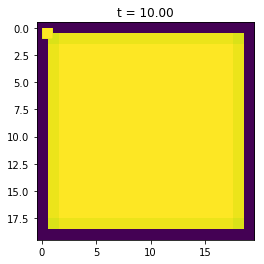

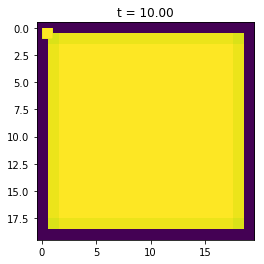

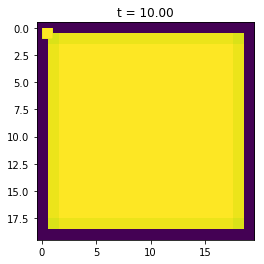

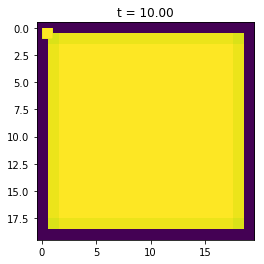

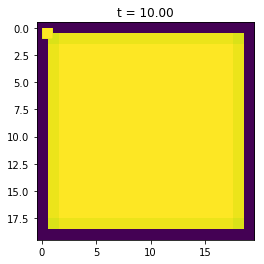

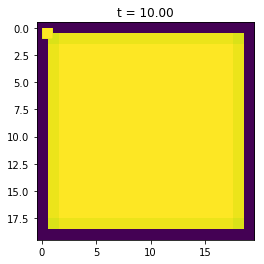

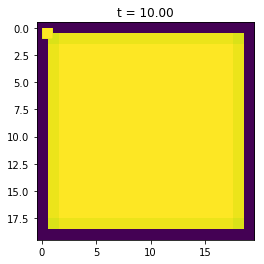

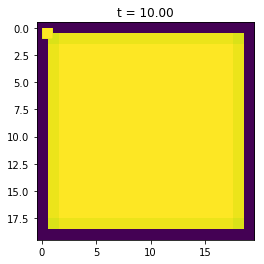

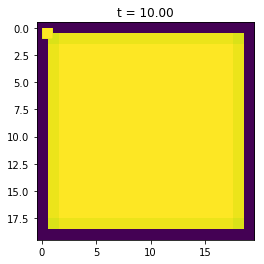

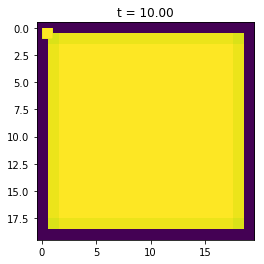

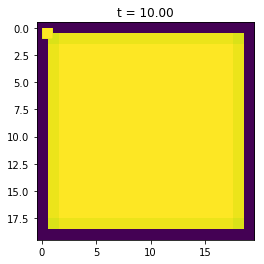

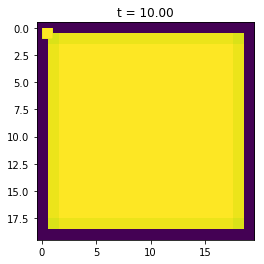

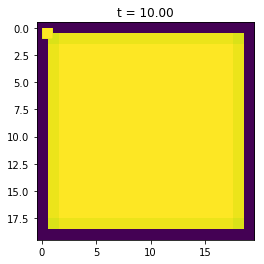

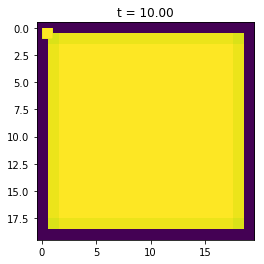

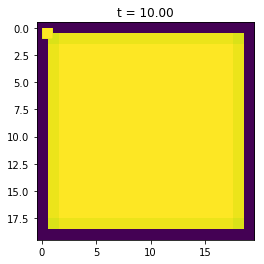

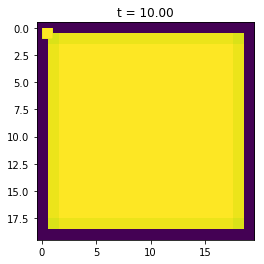

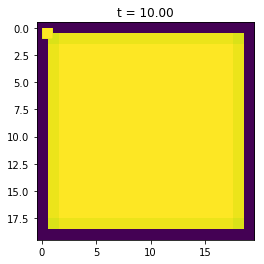

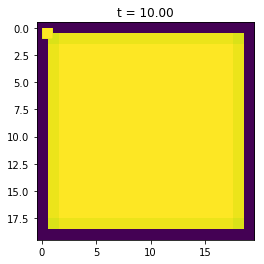

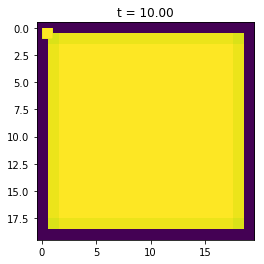

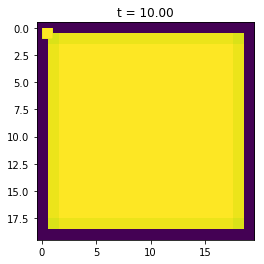

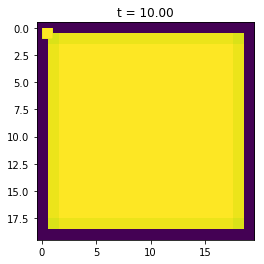

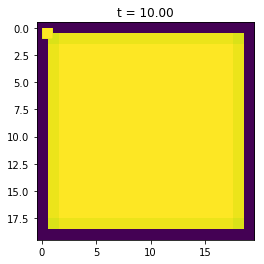

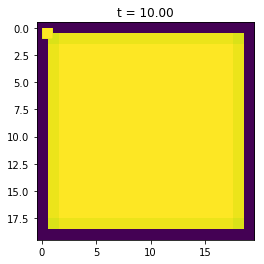

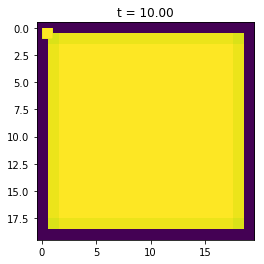

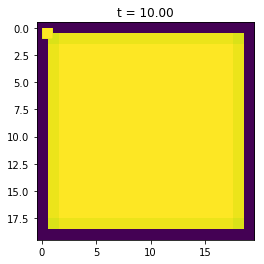

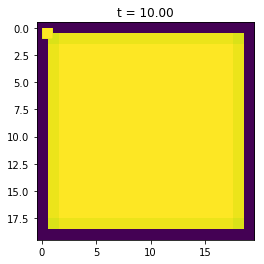

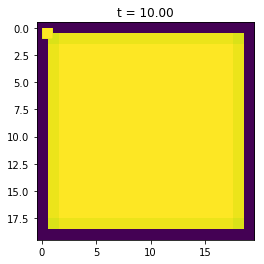

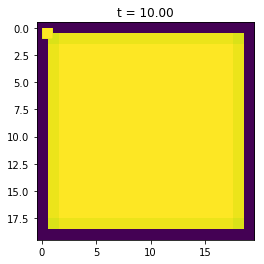

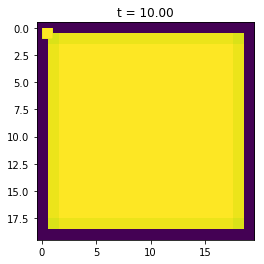

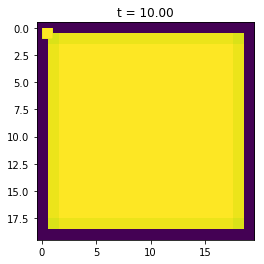

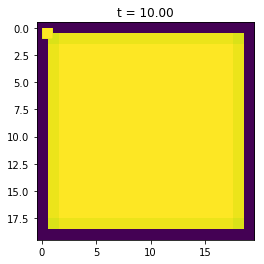

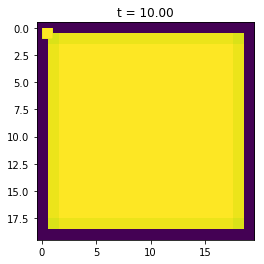

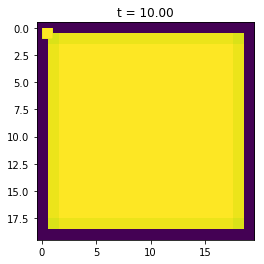

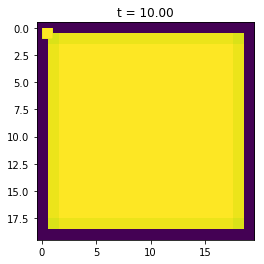

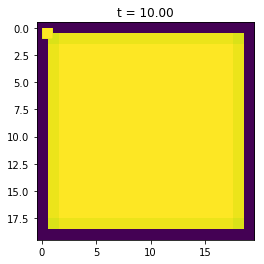

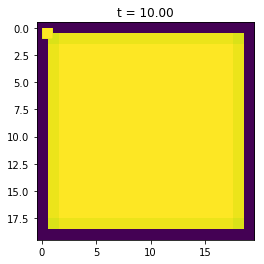

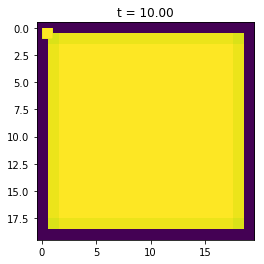

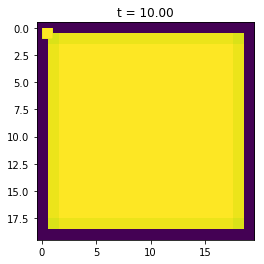

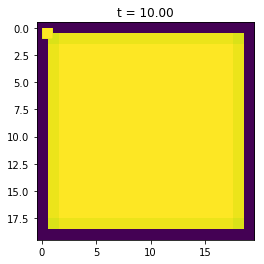

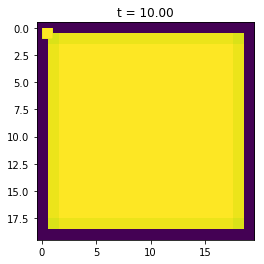

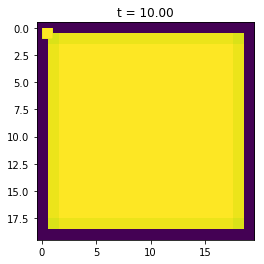

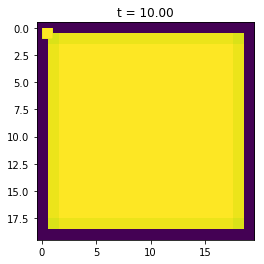

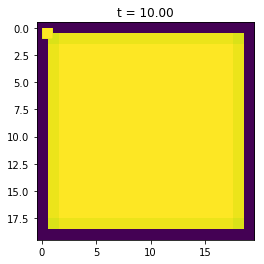

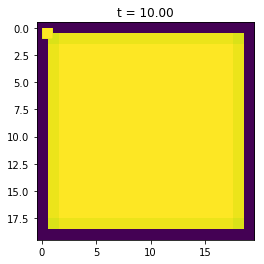

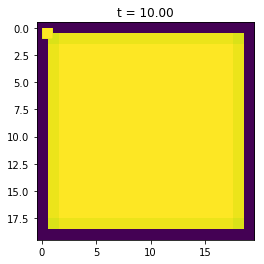

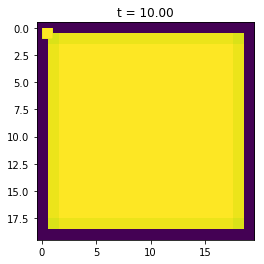

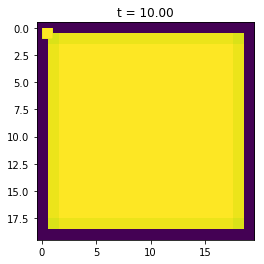

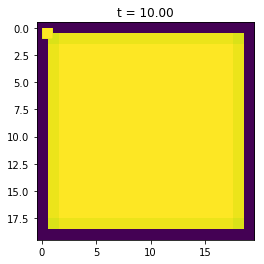

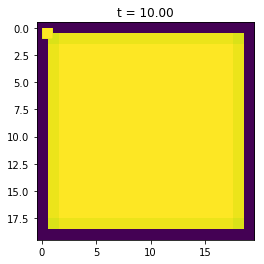

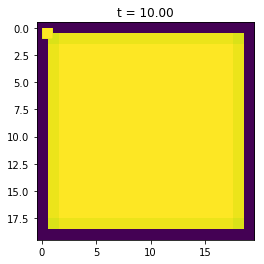

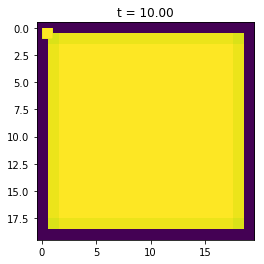

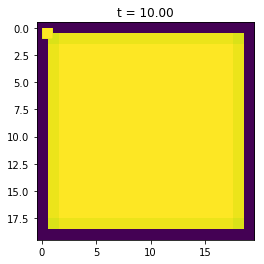

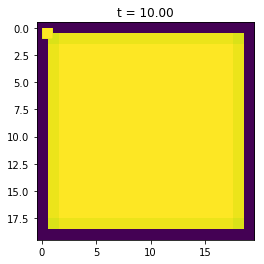

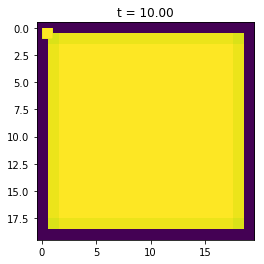

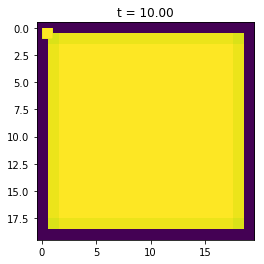

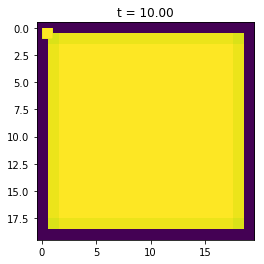

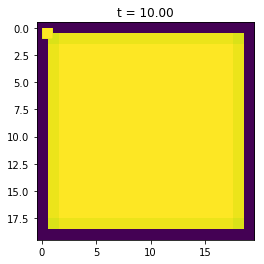

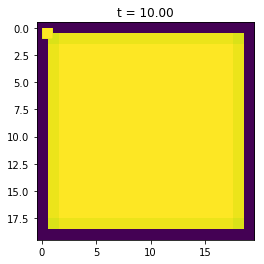

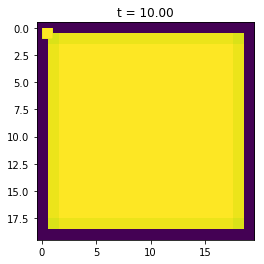

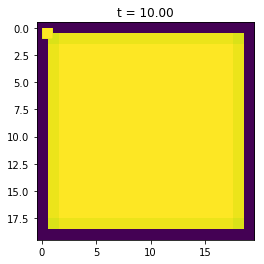

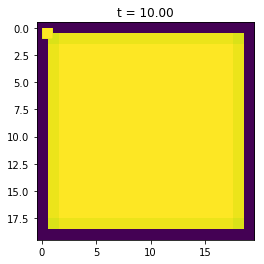

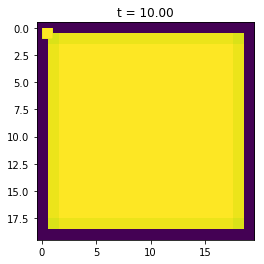

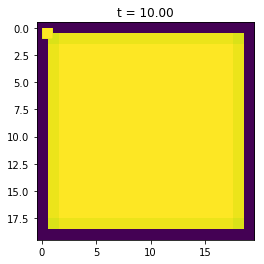

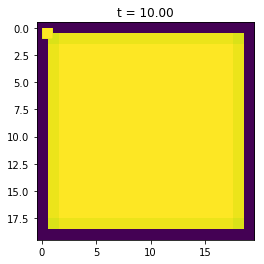

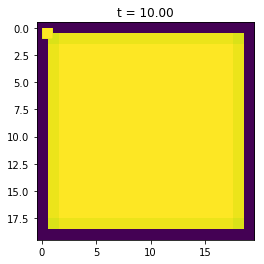

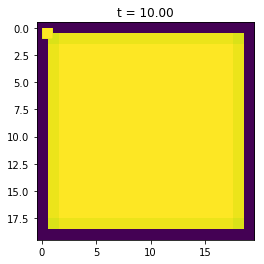

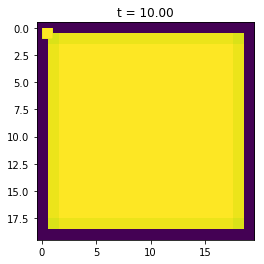

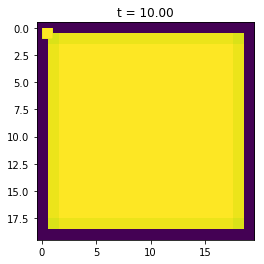

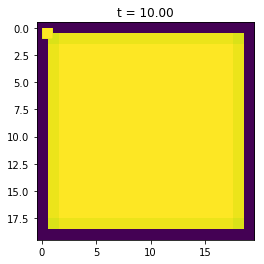

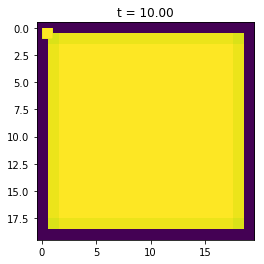

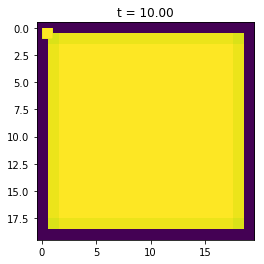

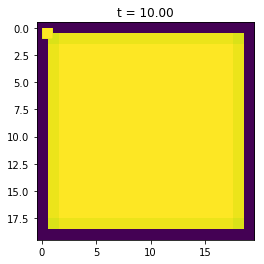

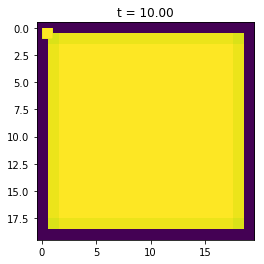

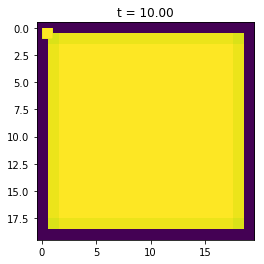

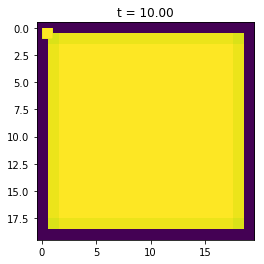

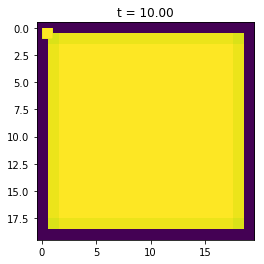

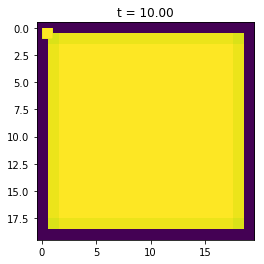

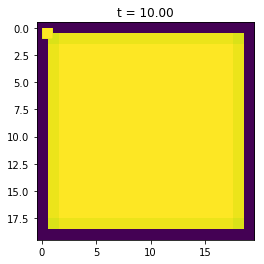

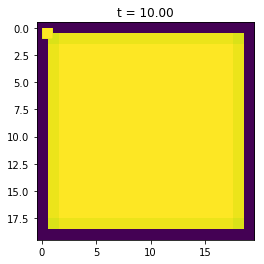

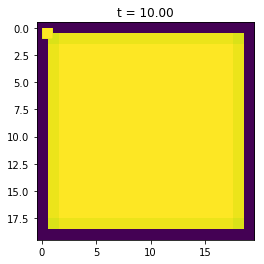

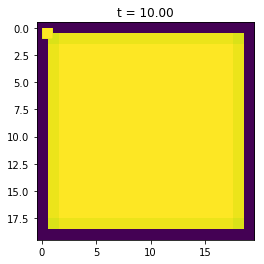

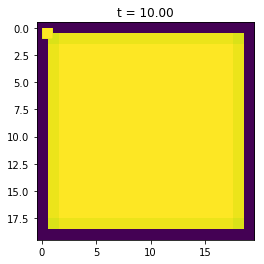

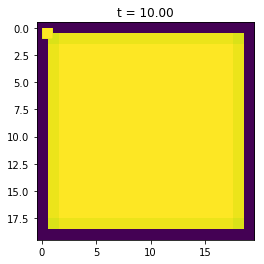

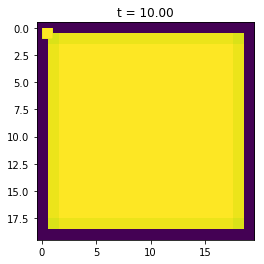

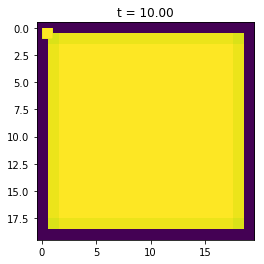

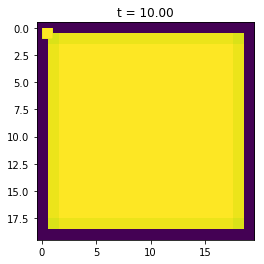

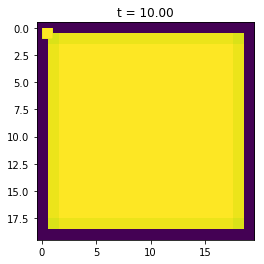

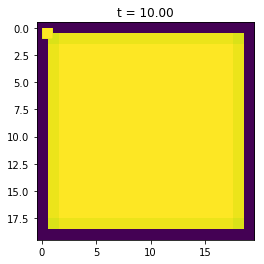

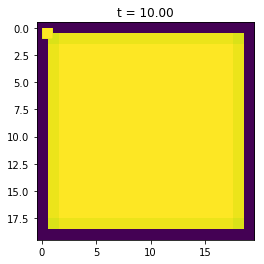

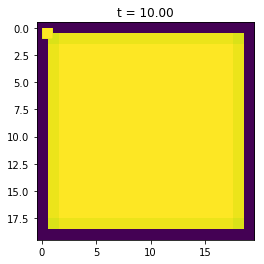

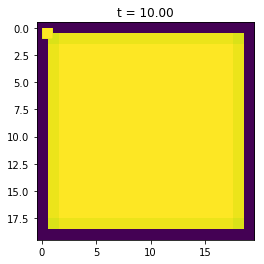

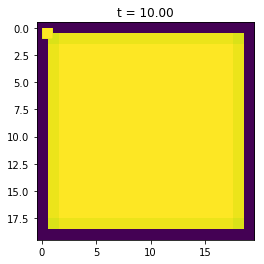

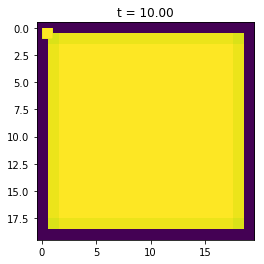

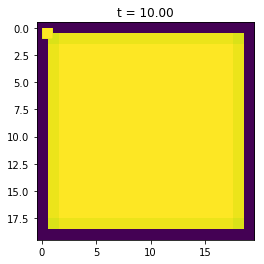

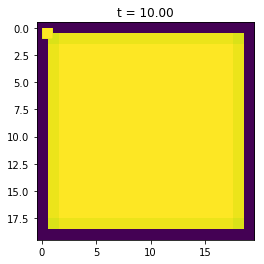

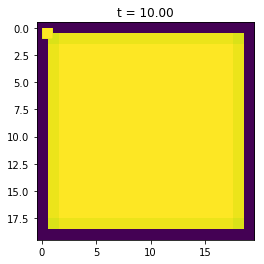

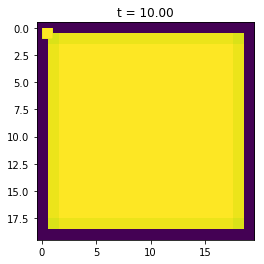

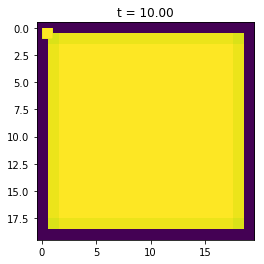

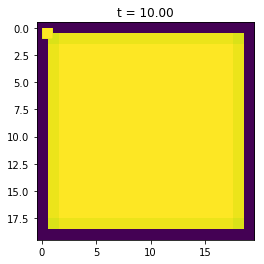

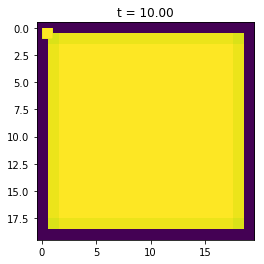

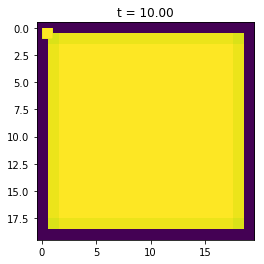

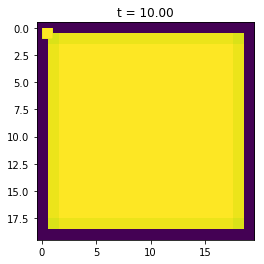

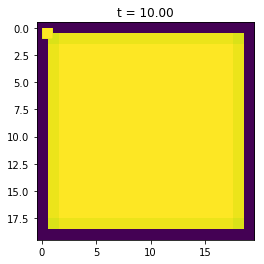

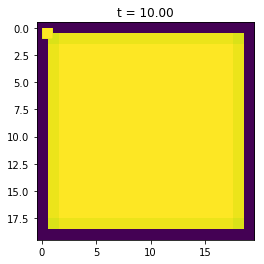

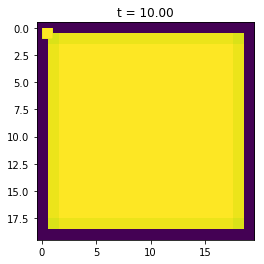

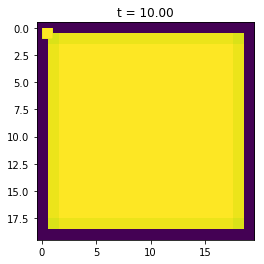

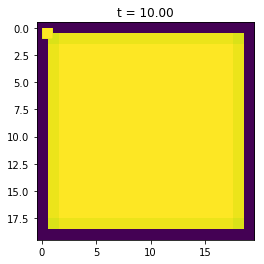

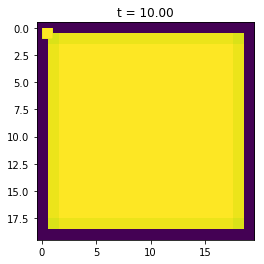

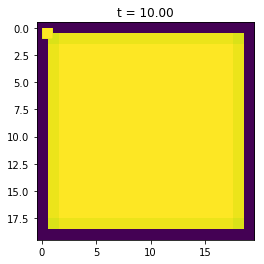

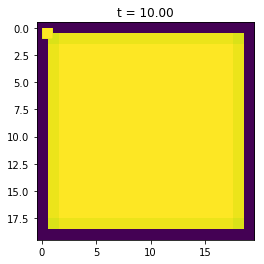

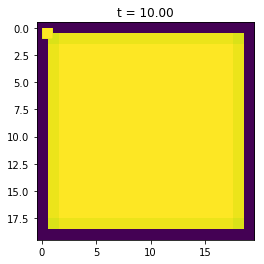

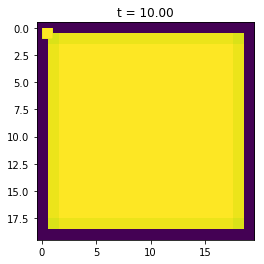

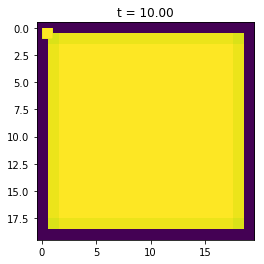

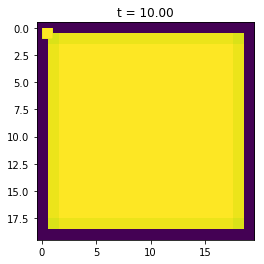

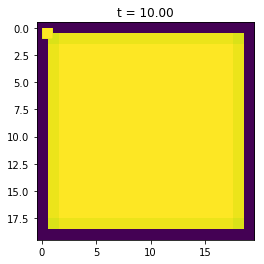

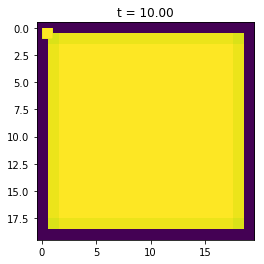

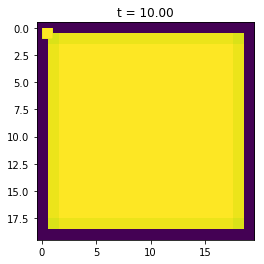

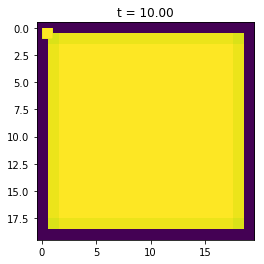

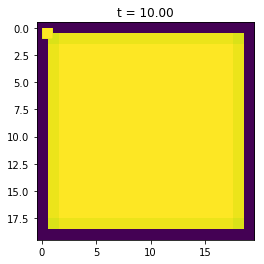

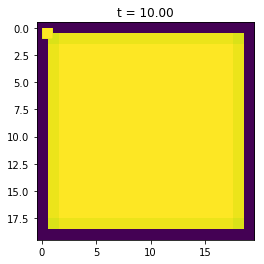

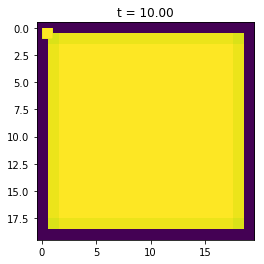

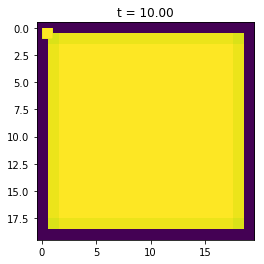

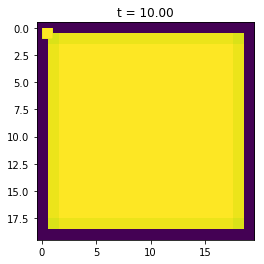

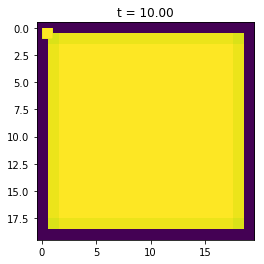

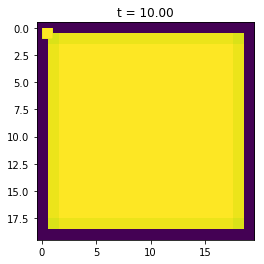

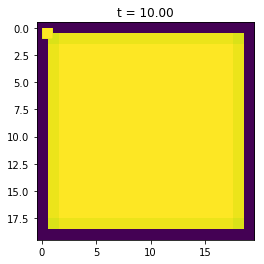

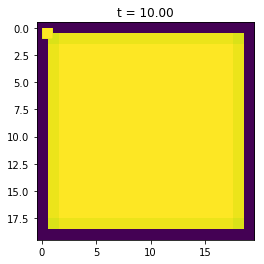

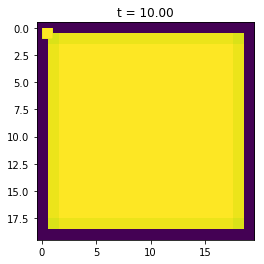

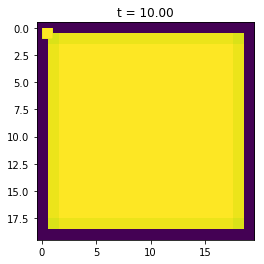

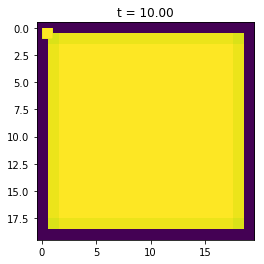

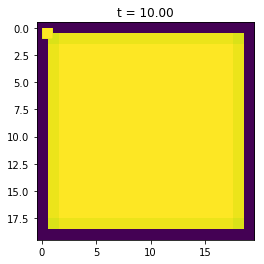

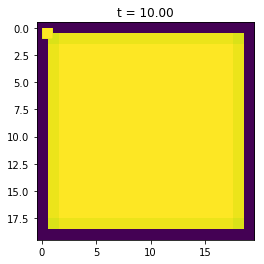

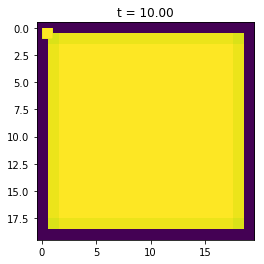

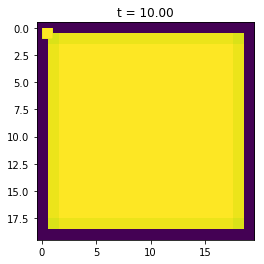

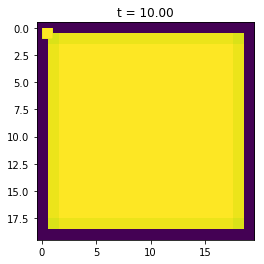

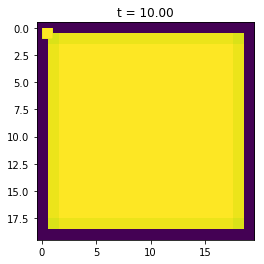

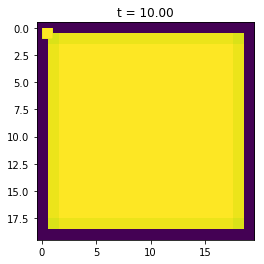

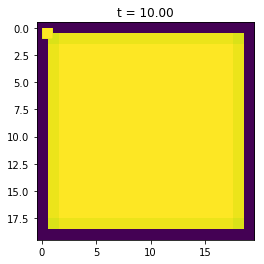

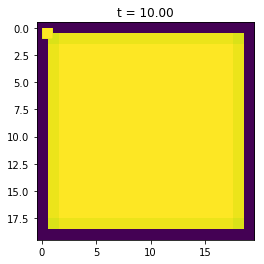

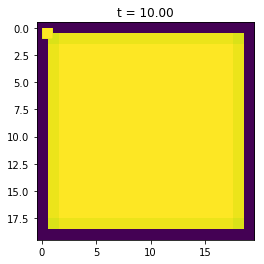

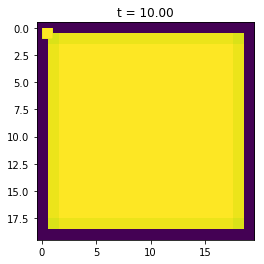

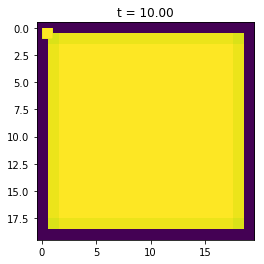

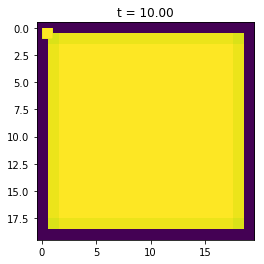

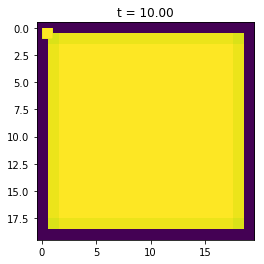

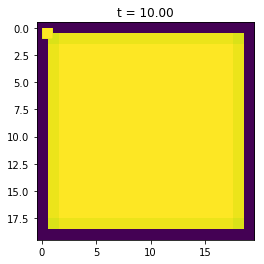

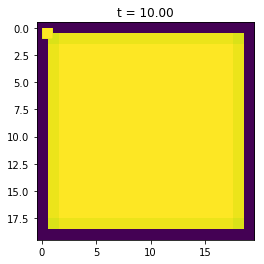

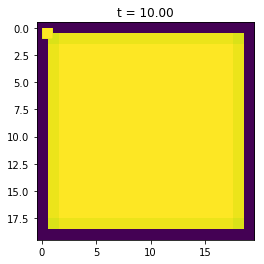

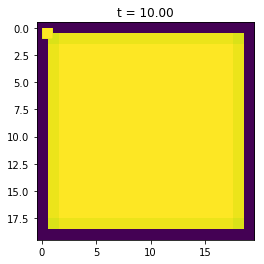

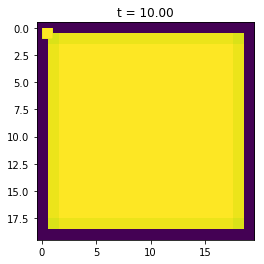

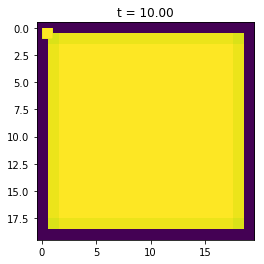

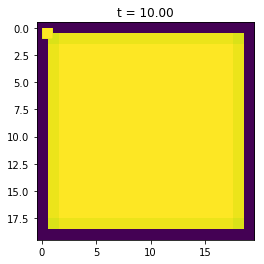

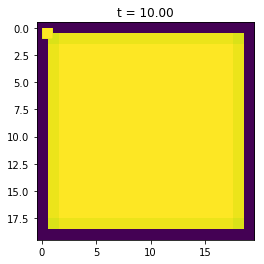

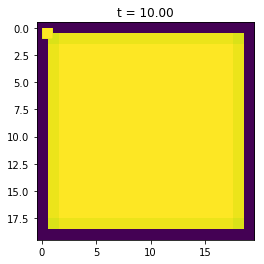

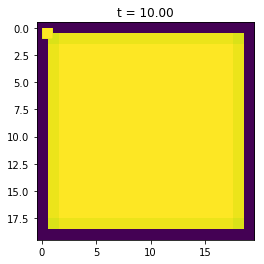

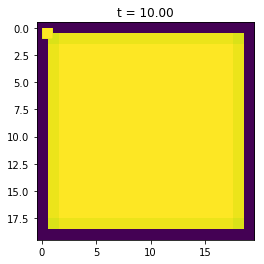

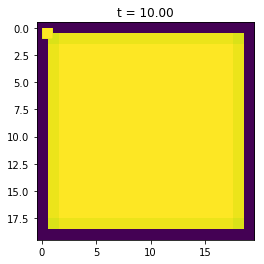

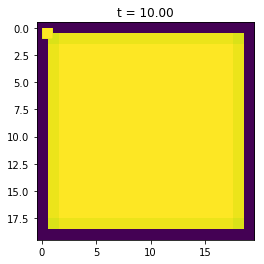

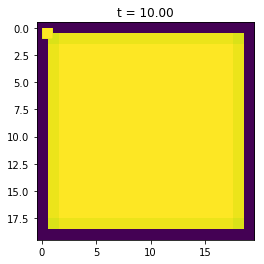

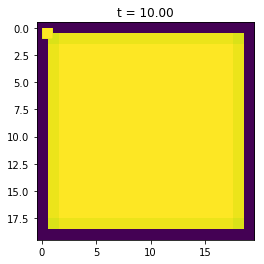

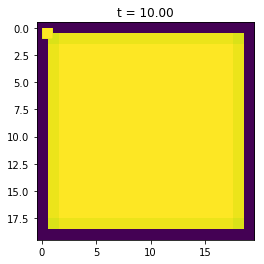

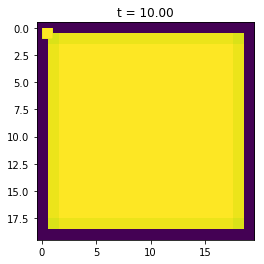

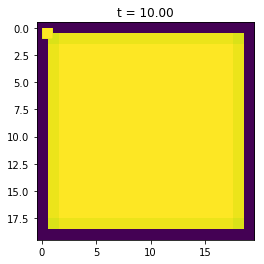

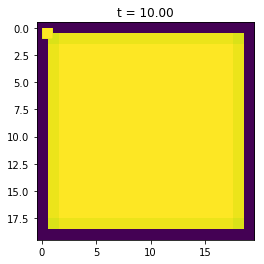

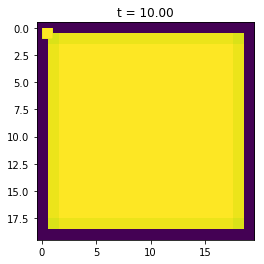

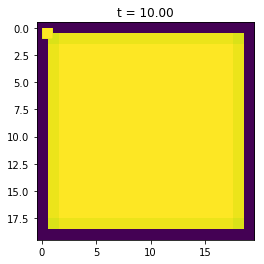

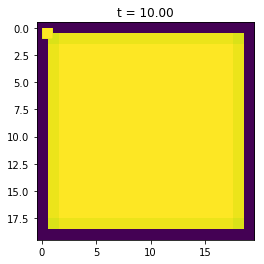

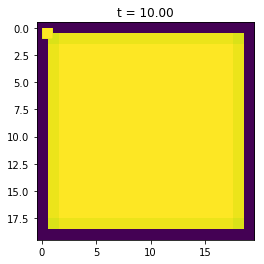

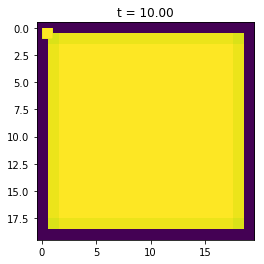

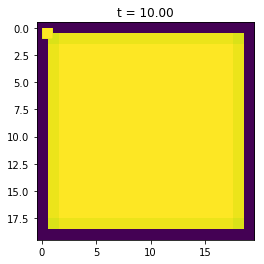

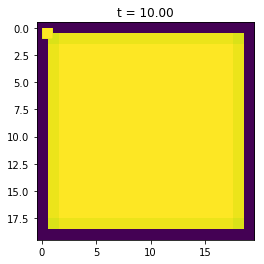

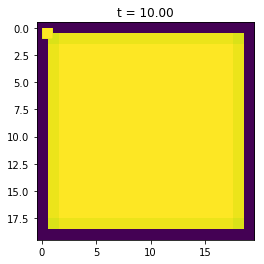

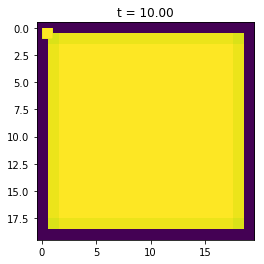

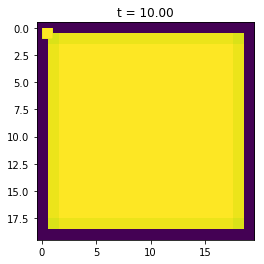

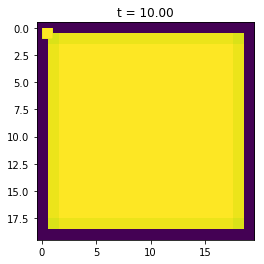

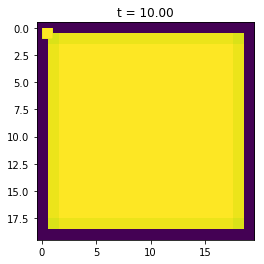

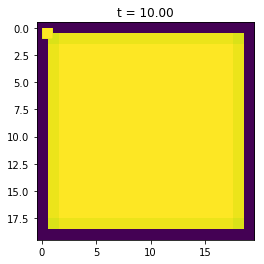

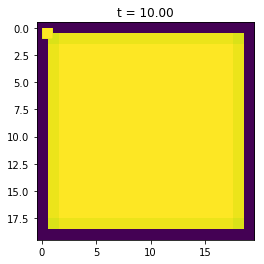

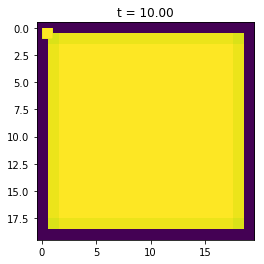

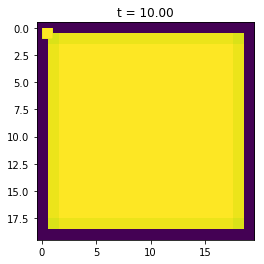

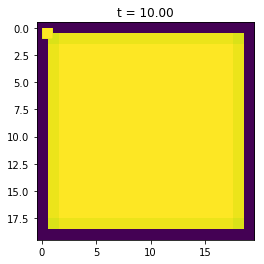

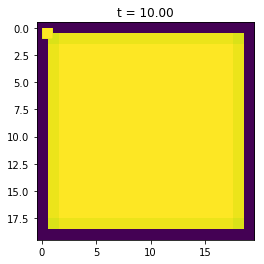

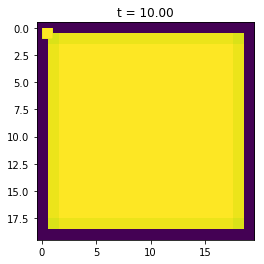

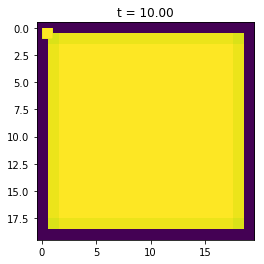

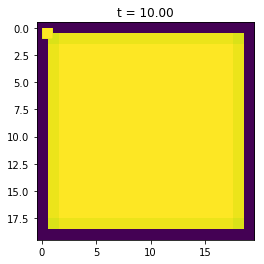

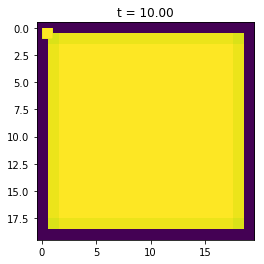

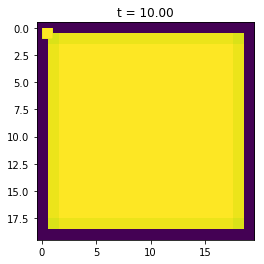

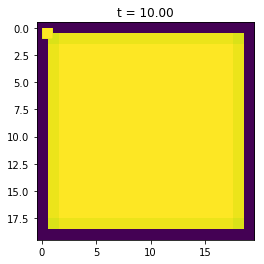

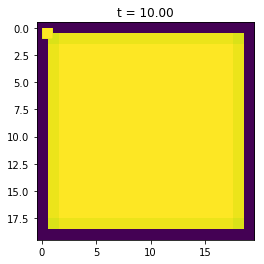

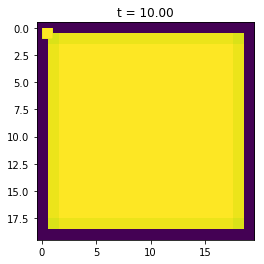

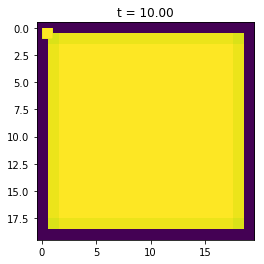

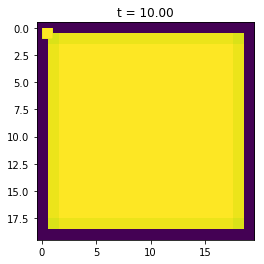

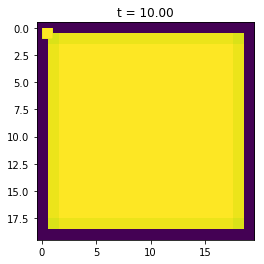

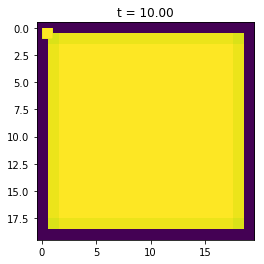

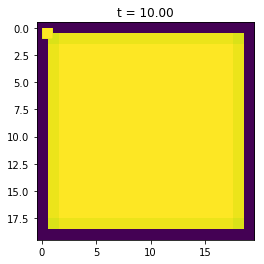

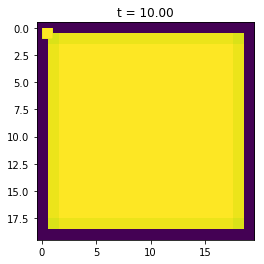

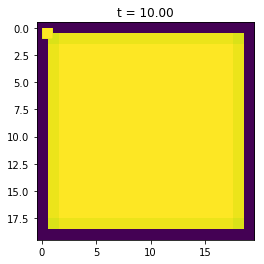

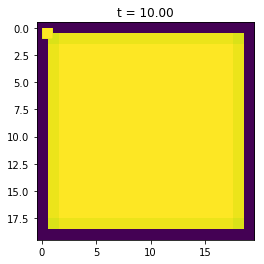

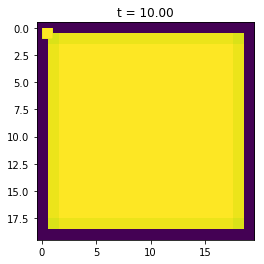

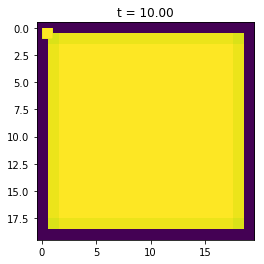

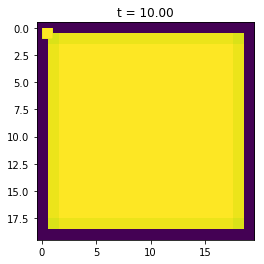

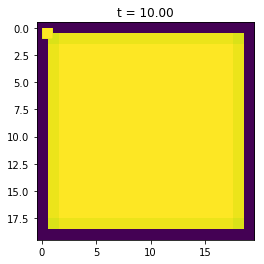

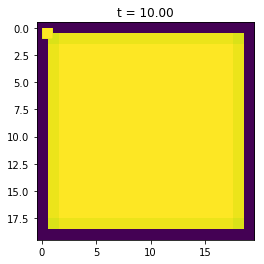

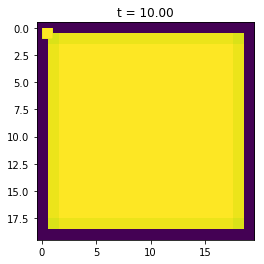

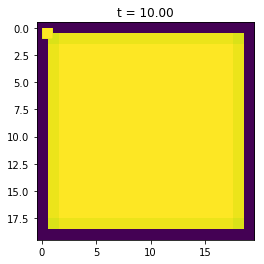

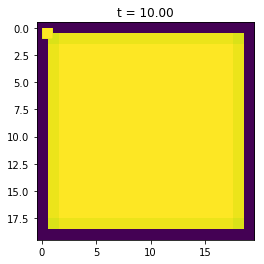

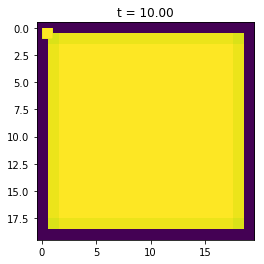

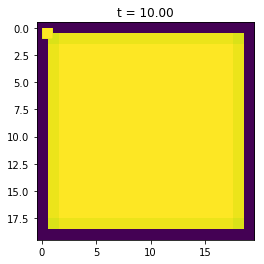

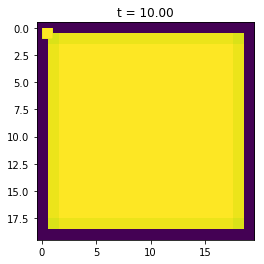

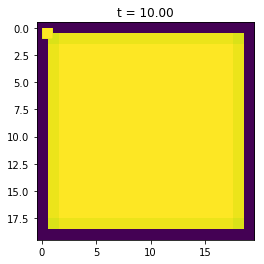

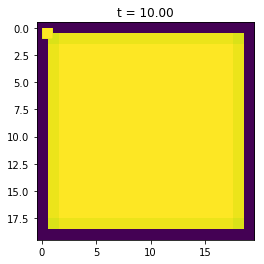

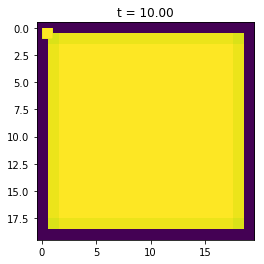

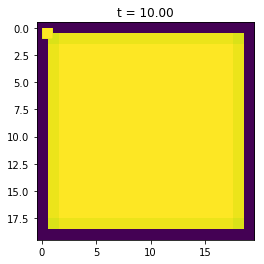

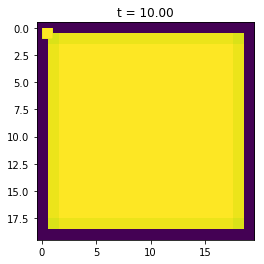

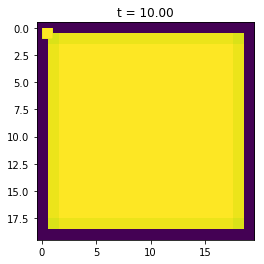

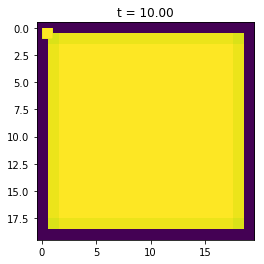

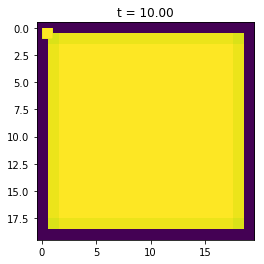

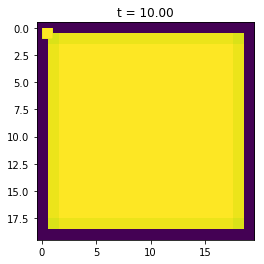

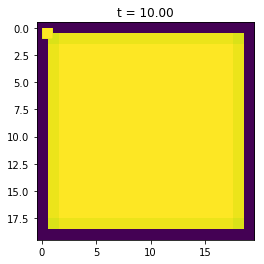

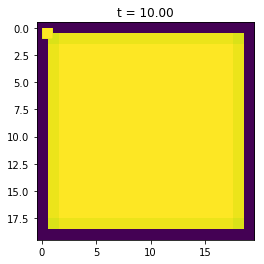

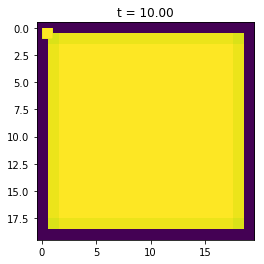

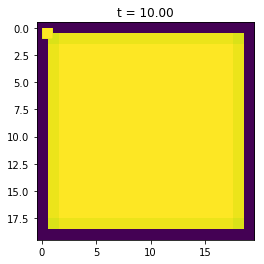

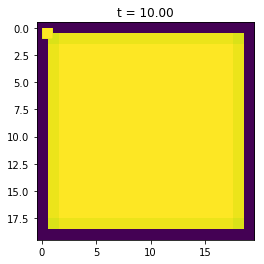

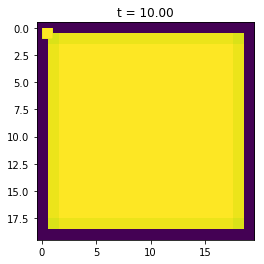

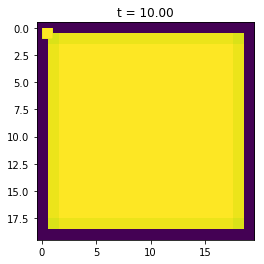

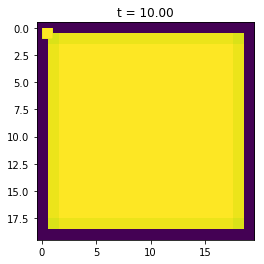

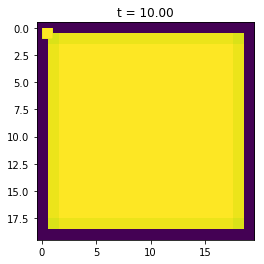

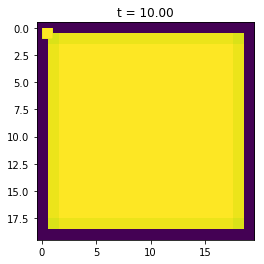

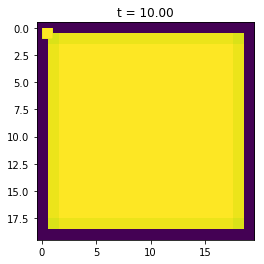

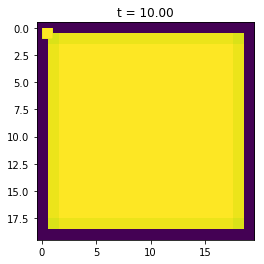

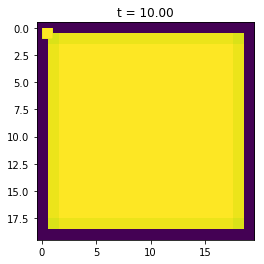

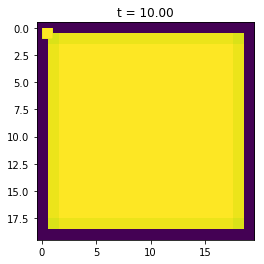

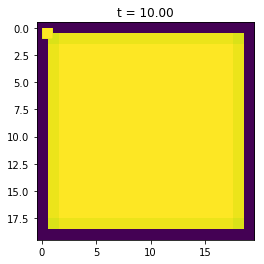

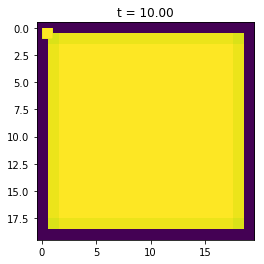

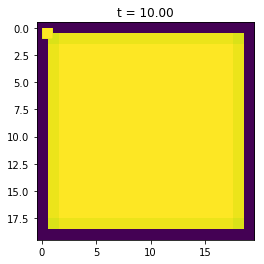

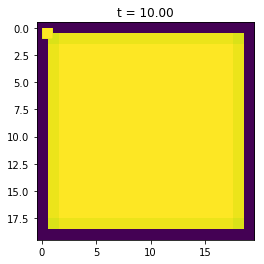

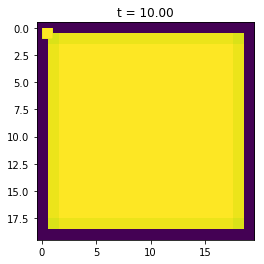

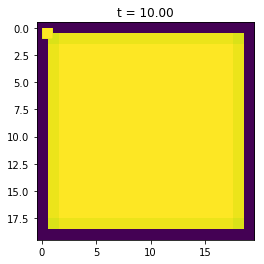

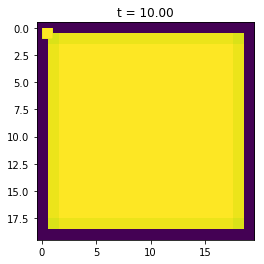

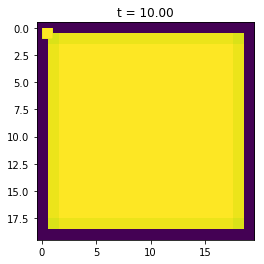

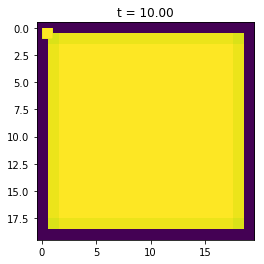

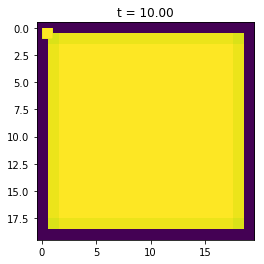

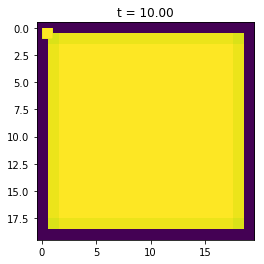

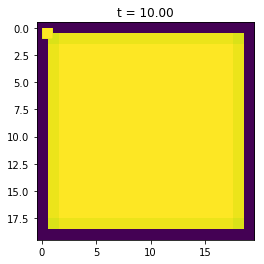

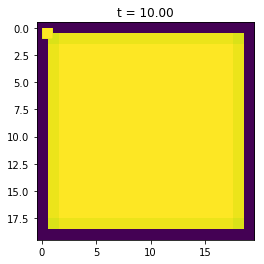

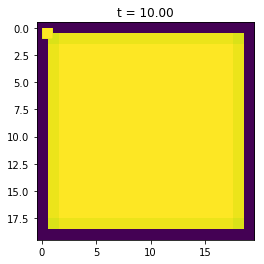

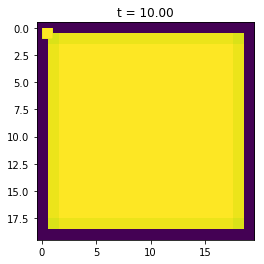

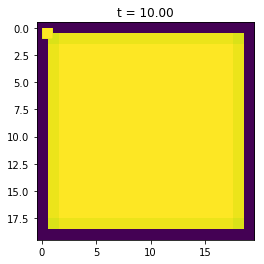

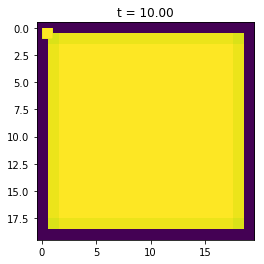

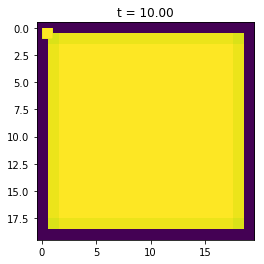

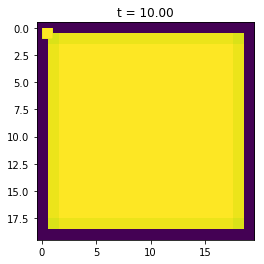

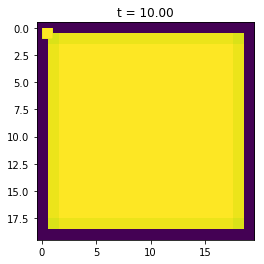

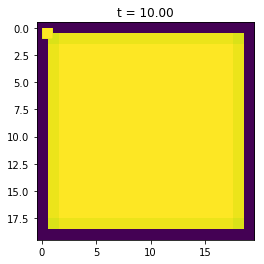

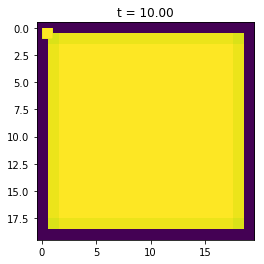

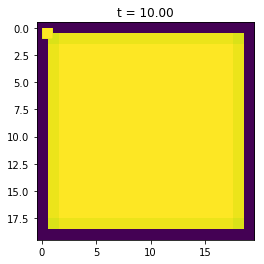

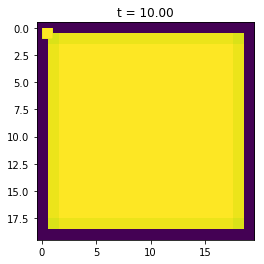

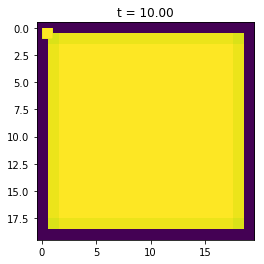

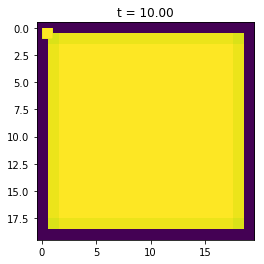

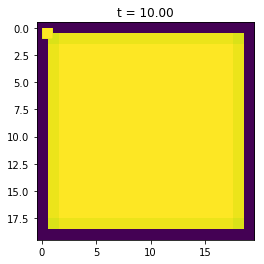

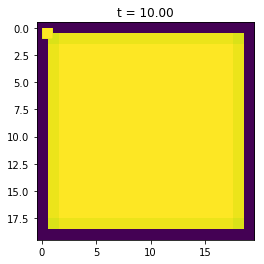

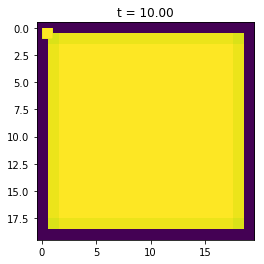

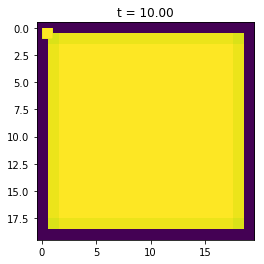

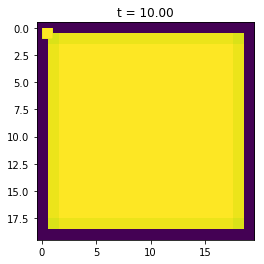

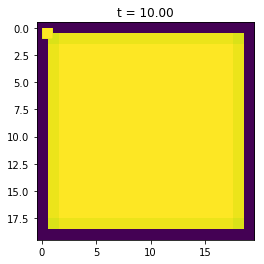

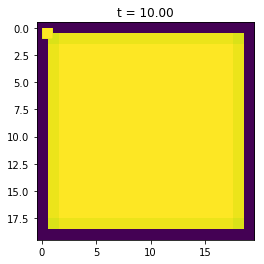

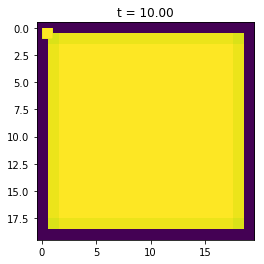

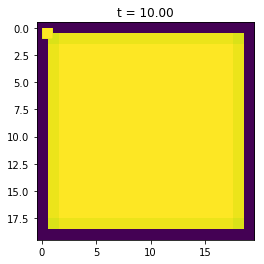

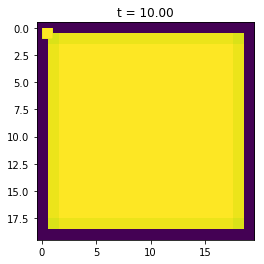

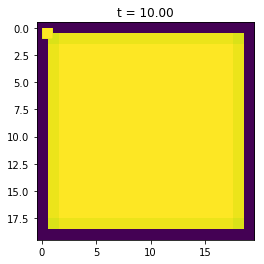

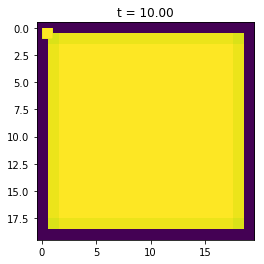

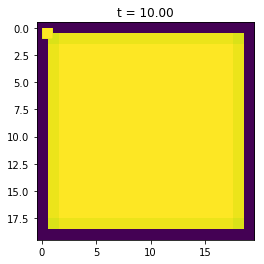

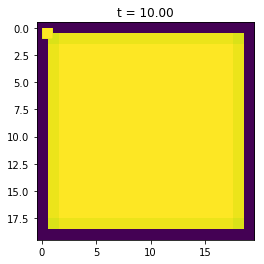

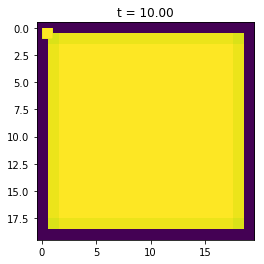

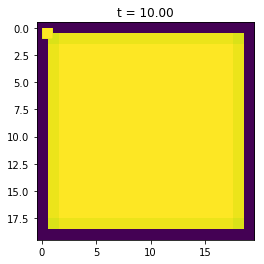

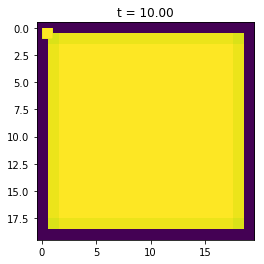

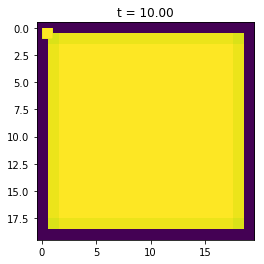

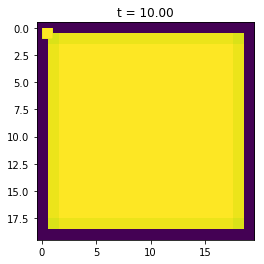

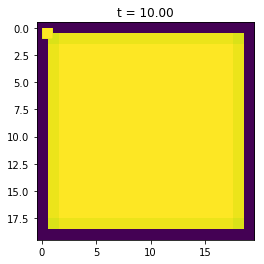

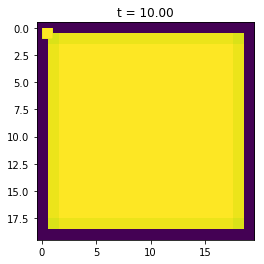

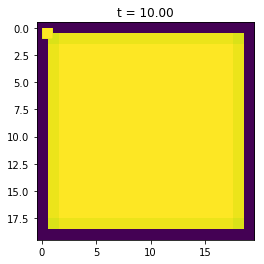

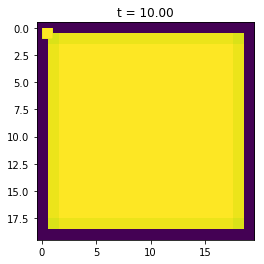

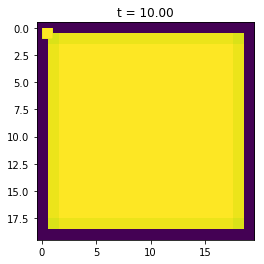

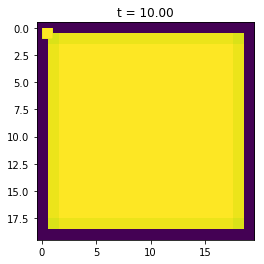

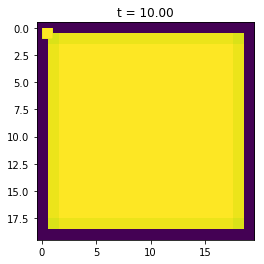

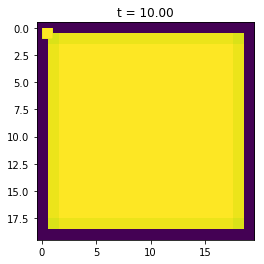

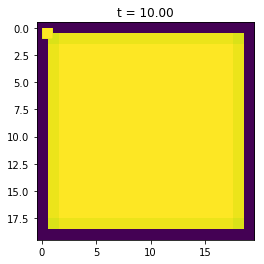

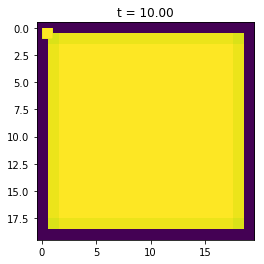

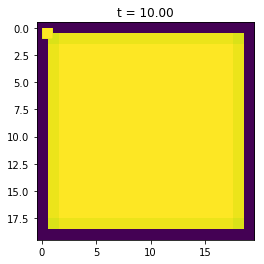

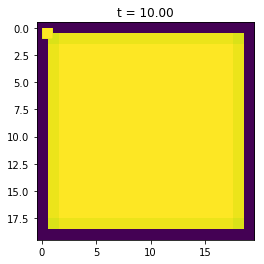

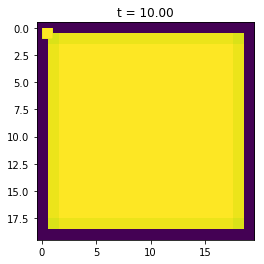

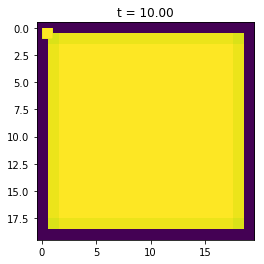

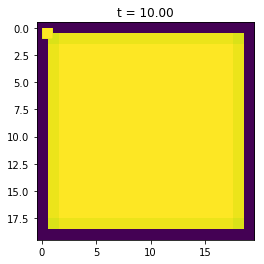

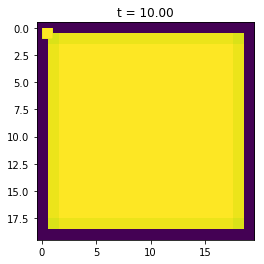

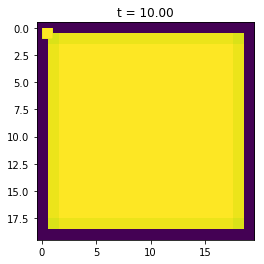

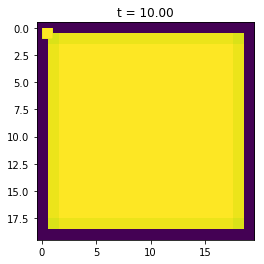

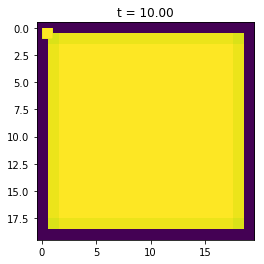

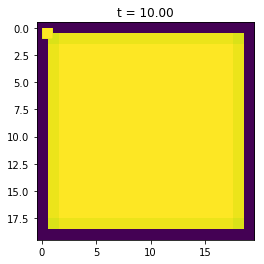

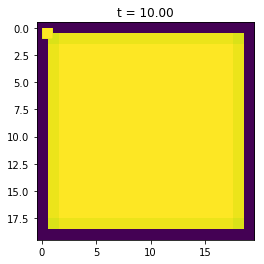

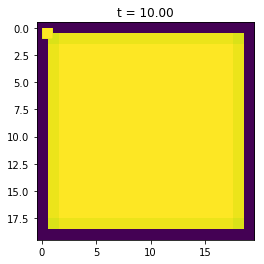

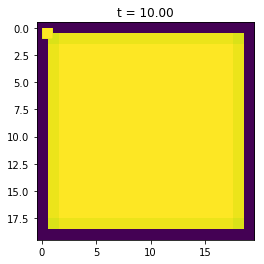

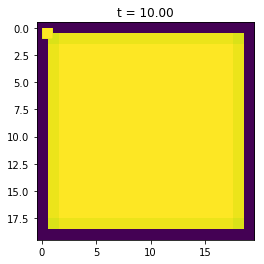

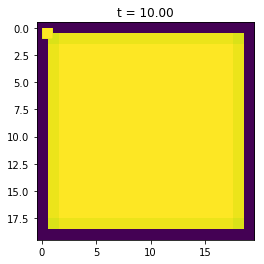

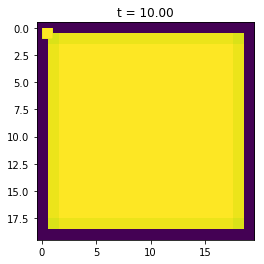

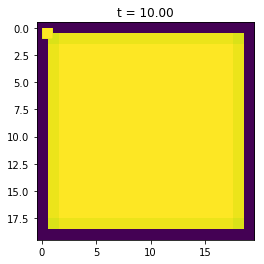

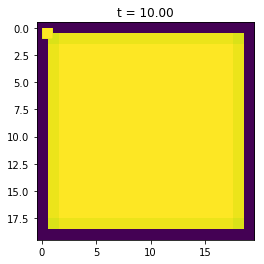

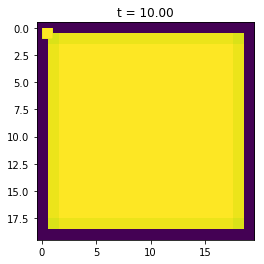

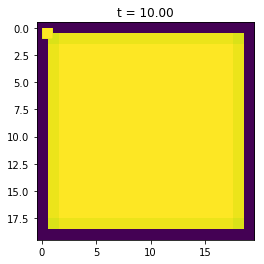

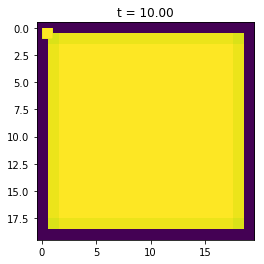

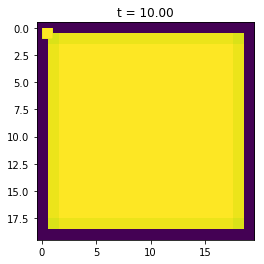

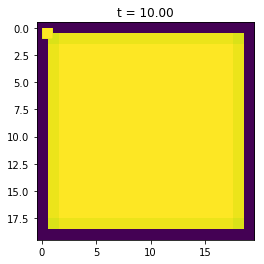

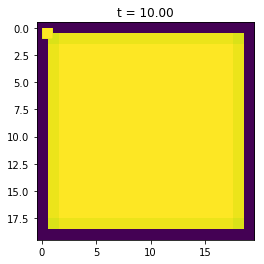

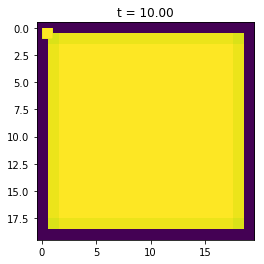

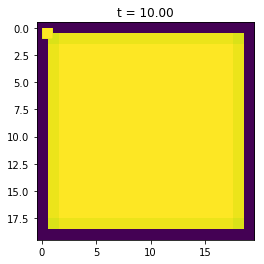

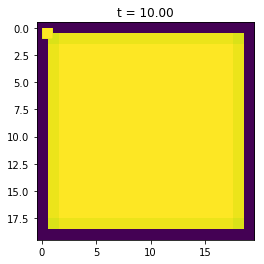

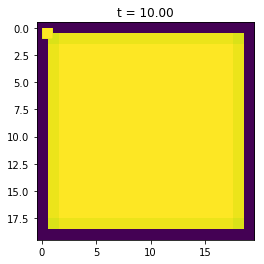

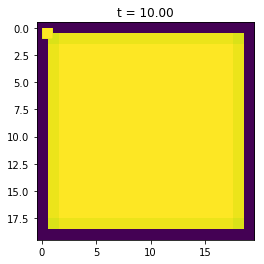

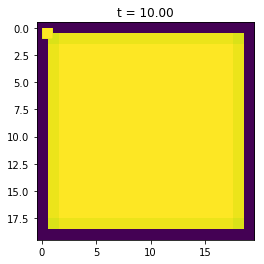

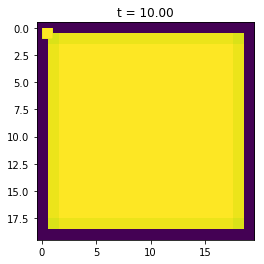

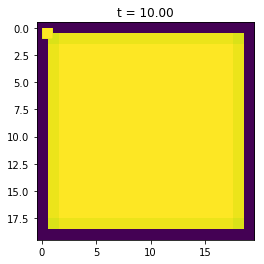

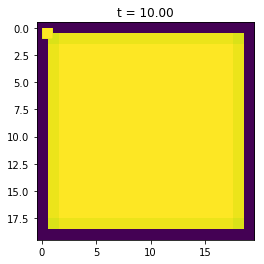

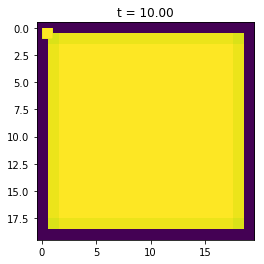

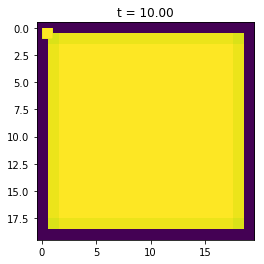

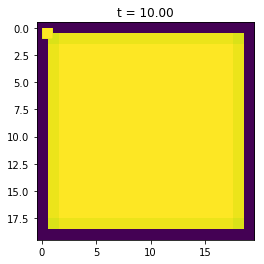

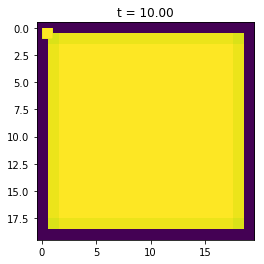

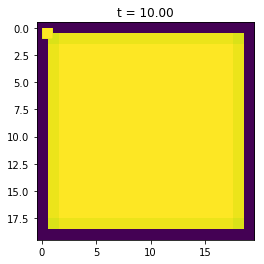

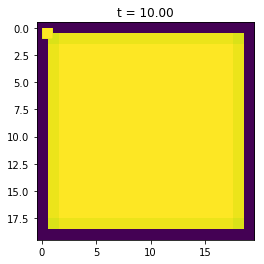

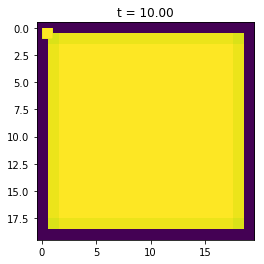

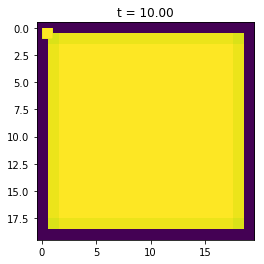

In [13]:
# -*- coding: utf-8 -*-
% matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from pylab import *
from random import randint
import matplotlib.animation as animation
#time and space
Lx=1
Ly=1
Ny=20
Nx=20
dy=Ly/Ny
dx = Lx/Nx  # space step
D=0.01
k=1
NT=1000
T = 10.0  # total time
dt= T/NT 
n = int(T/dt)
xx = np.linspace(0,Lx,Nx)
yy = np.linspace(0,Ly,Ny)

# kinetics factors data from Holly paper 1989
kton=0.12 #µmol-1 l ms-1
ktoff=0.12 #ms-1
kpon=0.25 #µmol-1 l ms-1
kpoff= 0.001 #ms-1


#All spieces matrices
Ca = np.zeros((Nx, Ny))
T= np.zeros((Nx, Ny))
TCa= np.zeros((Nx, Ny))
P= np.zeros((Nx, Ny))
PCa= np.zeros((Nx, Ny))
# All spiecies start with a uniform concentration exept Ca
T[:,:]=TCa[:,:]=70
P[:,:]=PCa[:,:]=470
#Ca[:,:]= 0.006 # concentration at rest in MS µmol l-1 
Ca[10,10]=50
def laplacian(Z):
    Zxless = Z[0:-2,1:-1]
    Zyless = Z[1:-1,0:-2]
    Zxplus = Z[2:,1:-1]
    Zyplus = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return ((Zxless+ Zxplus - 2 * Zcenter)/ dx**2 ) + (Zyless + Zyplus -2* Zcenter) / dy**2
def neuman(N):
    N[0,:] = N[1,:]
    N[-1,:] = N[-2,:]
    N[:,0] = N[:,1]
    N[:,-1] =  N[:,-2]
    # Neumann conditions: derivatives at the edges
    # are null.
    return N
fig = plt.figure()
ims = []  
# We simulate the PDE with the finite difference method.
for i in range(n):
    # We compute the Laplacian of N
    deltaCa = laplacian(Ca)
    # We take the values of N inside the grid.
    Cai = Ca[1:-1,1:-1]
    # We update the variables.
    Ca[1:-1,1:-1] =  Cai + dt * (ktoff*TCa[1:-1,1:-1]-kton*Ca[1:-1,1:-1]*T[1:-1,1:-1]+kpoff*PCa[1:-1,1:-1]-kpon*Ca[1:-1,1:-1]*P[1:-1,1:-1]+ D*deltaCa )
    #neuman(Ca)  
    #neuman(T)
    #neuman(TCa)
    #neuman(P)
    #neuman(PCa)
    # Neumann conditions: derivatives at the edges
    # are null.
    
    im = plt.imshow(Ca, animated=True)
    ims.append([im])
    plotlabel = "t = %1.2f" %(n * dt)
    plt.pcolormesh(xx,yy,Ca, )
    plt.title(plotlabel)
    plt.axis('image')
    
    plt.show()
#plt.imshow(N, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
#plt.xticks([]); plt.yticks([]);
ani=animation.ArtistAnimation(fig, ims, interval=5, blit=True,repeat_delay=10) 
ani.save('diff4.mp4', fps=100, writer="avconv", codec="libx264")

